## Self Organizing Maps

Self-organizing map (SOM) is a form of artificial neural network. It is trained by using
unsupervised learning to generate a two-dimensional presentation of the input metrics.
Therefore, SOM is one algorithm can realize dimensionality reduction. SOM is an appro-
priate tool for visualizing low-dimensional graphs of high-dimensional input data for its
function of preserving the topological properties of the input data space.

## Experiments

Regarding the SOM, we intended to explore the influence of changing inherent variables
of the algorithm. In the first experiment, the number of iterations were set as 500,
1000, and 2000 and the other parameters were fixed as following: OP learning rate =
1.0; Tuning phase (TP) learning rate = 1; TP Neighborhood distance = 1; and Map size
= 20x20. In the second experiment, the number of iterations was fixed as 500, and the
Neighbourhood distance was fixed at 1. While the Map size were set as 10×10, 20×20,
30×30. In the third experiment, the OP steps were fixed in 500 iterations and the TP
Neighborhood distances were set as 1, 10 and 20, while the other variables were not mod-
ified.

## Results

SOM neighborhood weight distance graph, which indicates the distances between neighboring neurons.

## All Combinations for 4

- ACT[s] Cadence Rs RssL   -     OK
- ACT[s] Cadence Rs RssR
- ACT[s] Cadence Rs Rst     - OK
- ACT[s] Cadence Rs Rsw
- ACT[s] Cadence RssL RssR    - OK
- ACT[s] Cadence RssL Rst
- ACT[s] Cadence RssL Rsw    -  OK
- ACT[s] Cadence RssR Rst
- ACT[s] Cadence RssR Rsw
- ACT[s] Cadence Rst Rsw   -  OK
- ACT[s] Rs RssL RssR
- ACT[s] Rs RssL Rst
- ACT[s] Rs RssL Rsw
- ACT[s] Rs RssR Rst     - OK
- ACT[s] Rs RssR Rsw    - OK
- ACT[s] Rs Rst Rsw
- ACT[s] RssL RssR Rst      -   OK
- ACT[s] RssL RssR Rsw
- ACT[s] RssL Rst Rsw         - OK
- ACT[s] RssR Rst Rsw
- Cadence Rs RssL RssR
- Cadence Rs RssL Rst      - OK
- Cadence Rs RssL Rsw
- Cadence Rs RssR Rst     - OK
- Cadence Rs RssR Rsw
- Cadence Rs Rst Rsw    -    OK
- Cadence RssL RssR Rst
- Cadence RssL RssR Rsw
- Cadence RssL Rst Rsw    -  OK
- Cadence RssR Rst Rsw
- Rs RssL RssR Rst       - OK
- Rs RssL RssR Rsw
- Rs RssL Rst Rsw       - OK
- Rs RssR Rst Rsw
- RssL RssR Rst Rsw    -     OK

## All Combinations for 5


ACT[s] Cadence Rs RssL RssR
ACT[s] Cadence Rs RssL Rst
ACT[s] Cadence Rs RssL Rsw
ACT[s] Cadence Rs RssR Rst
ACT[s] Cadence Rs RssR Rsw
ACT[s] Cadence Rs Rst Rsw
ACT[s] Cadence RssL RssR Rst
ACT[s] Cadence RssL RssR Rsw
ACT[s] Cadence RssL Rst Rsw
ACT[s] Cadence RssR Rst Rsw
ACT[s] Rs RssL RssR Rst
ACT[s] Rs RssL RssR Rsw
ACT[s] Rs RssL Rst Rsw
ACT[s] Rs RssR Rst Rsw
ACT[s] RssL RssR Rst Rsw
Cadence Rs RssL RssR Rst
Cadence Rs RssL RssR Rsw
Cadence Rs RssL Rst Rsw
Cadence Rs RssR Rst Rsw
Cadence RssL RssR Rst Rsw
Rs RssL RssR Rst Rsw

## All combinations for 6

ACT[s] Cadence Rs RssL RssR Rst
ACT[s] Cadence Rs RssL RssR Rsw
ACT[s] Cadence Rs RssL Rst Rsw
ACT[s] Cadence Rs RssR Rst Rsw
ACT[s] Cadence RssL RssR Rst Rsw
ACT[s] Rs RssL RssR Rst Rsw
Cadence Rs RssL RssR Rst Rsw

## Running a hybrid approach with SOM and FKMEANS

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from time import time
import sompy
import time

backend module://ipykernel.pylab.backend_inline version unknown


## Dealing with Actual Data

In [2]:
data_location = '/home/sarai/Documents/UPE/tcc/hybrid-approach/5_gait_symmetry_ratios_and_2_kinematic_features_from_180_samples2.csv'
complet_data = pd.read_csv(data_location)

data = complet_data.drop(['Age'], axis=1)
print(data.head())

data = data.values

      Rst     Rsw    RssR    RssL      Rs  ACT[s]  Cadence
0  1.0547  1.0581  1.4835  1.4884  0.9967  0.7080   2.8249
1  1.3552  0.9913  1.7594  1.2870  1.3671  0.7633   2.6201
2  1.0082  1.0353  1.3977  1.4353  0.9738  0.6920   2.8902
3  0.9524  0.9363  1.5200  1.4944  1.0171  0.6893   2.9014
4  0.8895  1.1240  1.3190  1.6667  0.7914  0.7307   2.7372


In [3]:
complet_data.head()

Rst     Rsw    RssR    RssL      Rs  ACT[s]  Cadence  Age
0  1.0547  1.0581  1.4835  1.4884  0.9967  0.7080   2.8249    0
1  1.3552  0.9913  1.7594  1.2870  1.3671  0.7633   2.6201    0
2  1.0082  1.0353  1.3977  1.4353  0.9738  0.6920   2.8902    0
3  0.9524  0.9363  1.5200  1.4944  1.0171  0.6893   2.9014    0
4  0.8895  1.1240  1.3190  1.6667  0.7914  0.7307   2.7372    0

In [4]:
group_0_10 = data[:30]
group_10_19 = data[30:60]
group_20_29 = data[60:90]
group_30_39 = data[90:120]
group_40_49 = data[120:150]
group_over_50 = data[150:]

In [5]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [6]:
def get_group(complet_data, i):
    val = complet_data.iloc[[i]]['Age']
    return val.item()

In [7]:
def cluster(som, n_clusters=6):
    from sklearn.cluster import KMeans
    cl_labels = KMeans(n_clusters=n_clusters).fit(
        som._normalizer.denormalize_by(som.data_raw, som.codebook.matrix)
    )
    return cl_labels

In [8]:
def plot_data(som, plot1=True, plot2=True, plot3=True, plot4=True, plot5=True, plot6=True):
    plt.figure(figsize=(20,20))
    if plot1:
        proj = som.project_data(group_0_10)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(321)
        plt.plot(coord[:, 1], coord[:, 0], marker='.', linestyle='--', color='r')

    if plot2:
        proj = som.project_data(group_10_19)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(322)
        plt.plot(coord[:, 1], coord[:, 0], c='black', linestyle='--',
                                marker='.')
    if plot3:
        proj = som.project_data(group_20_29)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(323)
        plt.plot(coord[:, 1], coord[:, 0], c='brown',
                                marker='.', linestyle='--',)
    if plot4:
        proj = som.project_data(group_30_39)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(324)
        plt.plot(coord[:, 1], coord[:, 0], c='blue',
                                marker='.', linestyle='--',)
    if plot5:
        proj = som.project_data(group_40_49)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(325)
        plt.plot(coord[:, 1], coord[:, 0], c='green',
                                marker='.', linestyle='--',)
    if plot6:
        proj = som.project_data(group_over_50)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(326)
        plt.plot(coord[:, 1], coord[:, 0], c='orange', marker='.', linestyle='--',)

In [9]:
def plot_dots(som, plot1=True, plot2=True, plot3=True, plot4=True, plot5=True, plot6=True):
    plt.figure(figsize=(20,20))
    if plot1:
        proj = som.project_data(group_0_10)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(321)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='Gray',
                                marker='o', cmap='jet', linewidths=3, edgecolor='Gray')

    if plot2:
        proj = som.project_data(group_10_19)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(322)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='black',
                                marker='o', cmap='jet', linewidths=3, edgecolor='black')
    if plot3:
        proj = som.project_data(group_20_29)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(323)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='brown',
                                marker='o', cmap='jet', linewidths=3, edgecolor='brown')
    if plot4:
        proj = som.project_data(group_30_39)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(324)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='blue',
                                marker='o', cmap='jet', linewidths=3, edgecolor='blue')
    if plot5:
        proj = som.project_data(group_40_49)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(325)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='green',
                                marker='o', cmap='jet', linewidths=3, edgecolor='green')
    if plot6:
        proj = som.project_data(group_over_50)
        coord = som.bmu_ind_to_xy(proj)
        plt.subplot(326)
        plt.scatter(coord[:, 1], coord[:, 0], s=2, alpha=1., c='red',
                                marker='o', cmap='jet', linewidths=3, edgecolor='red')

In [10]:
def plot_one_type(som, data, color):
    proj = som.project_data(data)
    coord = som.bmu_ind_to_xy(proj)
    plt.subplot(321)
    plt.plot(coord[:, 1], coord[:, 0], c=color,
                            marker='.', linestyle='--')

In [11]:
def get_prediction_vs_real(data, complet_data):
    # normalized_data = som._normalizer.normalize_by(som.data_raw, data)
    results = kmeans_labels.predict(data)
    complet_data['Cluster'] = results
    return complet_data

def get_false_positives(conf_matrix, num_classes=6):
    false_positive = []
    for i in range(num_classes):
        false_positive.append(sum(conf_matrix[:,i]) - conf_matrix[i,i])
    return false_positive

def get_false_negatives(conf_matrix, num_classes=6):
    false_negative = []
    for i in range(num_classes):
        false_negative.append(sum(conf_matrix[i,:]) - conf_matrix[i,i])
    return false_negative

def generate_confusion_matrix(complet_data, classes_name=['0~10', '10~19', '20~29', '30~39', '40~49', '>50']):
    from sklearn import metrics

    conf_matrix = metrics.confusion_matrix(complet_data['Age'], complet_data['Cluster'])
    plt.figure()
    plot_confusion_matrix(conf_matrix, classes=classes_name,
                          title='Confusion matrix, without normalization')
    print()
    return conf_matrix

def get_metrics(conf_matrix, num_classes=6):
    true_positives = np.diag(conf_matrix)
    false_positives = get_false_positives(conf_matrix, num_classes)
    false_negatives = get_false_negatives(conf_matrix, num_classes)

    true_positives = sum(true_positives)
    false_positives = sum(false_positives)
    false_negatives = sum(false_negatives)

    print()
    print('true_positives total:', true_positives)
    print('false_positives total:', false_positives)
    print('false_negatives total:', false_negatives)
    
def get_precision_recal_f1_score_and_accuracy(complet_data):
    precision = metrics.precision_score(complet_data['Age'], complet_data['Cluster'], average='macro')
    recal = metrics.recall_score(complet_data['Age'], complet_data['Cluster'], average='micro')
    f1_score = metrics.f1_score(complet_data['Age'], complet_data['Cluster'], average='weighted')
    accuracy = metrics.accuracy_score(complet_data['Age'], complet_data['Cluster'])
    
    print()
    print('Precision: ', precision)
    print('Recal: ', recal)
    print('F1-Score: ', f1_score)
    print('Accuracy: ', accuracy)

In [12]:
from sklearn import metrics

def evaluate_som(data, complet_data, n_clusters=6, classes_name=['0~10', '10~19', '20~29', '30~39', '40~49', '>50']):
    # define which cluster number represents each Age group.
    complet_data = get_prediction_vs_real(data, complet_data)

    # Plot confusion matrix
    conf_matrix = generate_confusion_matrix(complet_data, classes_name)
    
    # Show true positives, false negatives, false positives
    get_metrics(conf_matrix, num_classes=len(classes_name))
    
    # Show metrics
    get_precision_recal_f1_score_and_accuracy(complet_data)

In [13]:
def analyse_cluster_per_group(complet_data):
    complet_data[complet_data.Age.values == complet_data.Cluster.values]
    complet_data['Cluster'].value_counts()
    return complet_data.groupby('Age')['Cluster'].value_counts()

In [14]:
all_features = ['Rst', 'Rsw', 'RssR', 'RssL', 'Rs', 'ACT[s]', 'Cadence']

In [15]:
def evaluate_group_1_and_3(som, complet_data, test_dataframe):
    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)


    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 4].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 5].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 1
    new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 0

    new_test_dataframe.loc[new_test_dataframe['Age'] == 0, 'Age'] = 1
    new_test_dataframe.loc[new_test_dataframe['Age'] == 2, 'Age'] = 0

    evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])
    
    print('-------------------TEST DATASET EVALUATION----------------------')
    evaluate_som(group_1_and_3_test, new_test_dataframe, classes_name=['0~10', '20~29'])
    
    print('-------------------------------------------------------------------------------------------------')
    
    analyse_cluster_per_group(new_complet_data)

    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 4].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 5].index)


    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 4].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 5].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 0, 'Age'] = 0
    new_complet_data.loc[new_complet_data['Age'] == 2, 'Age'] = 1

    new_test_dataframe.loc[new_test_dataframe['Age'] == 0, 'Age'] = 0
    new_test_dataframe.loc[new_test_dataframe['Age'] == 2, 'Age'] = 1

    evaluate_som(group_1_and_3, new_complet_data, classes_name=['0~10', '20~29'])

    print('-------------------TEST DATASET EVALUATION----------------------')
    evaluate_som(group_1_and_3_test, new_test_dataframe, classes_name=['0~10', '20~29'])

In [16]:
def evaluate_group_5_and_6(som, complet_data, test_dataframe):
    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 2].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 0].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 1
    new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 0

    new_test_dataframe.loc[new_test_dataframe['Age'] == 5, 'Age'] = 1
    new_test_dataframe.loc[new_test_dataframe['Age'] == 4, 'Age'] = 0

    evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])
    print('-------------------TEST DATASET EVALUATION----------------------')
    evaluate_som(group_5_and_6_test, new_test_dataframe, classes_name=['40~49', '>50'])
    
    print('-------------------------------------------------------------------------------------------------')
    
    analyse_cluster_per_group(new_complet_data)

    new_complet_data = complet_data.copy()
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 1].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 2].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 3].index)
    new_complet_data = new_complet_data.drop(new_complet_data[new_complet_data['Age'] == 0].index)

    new_test_dataframe = test_dataframe.copy()
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 1].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 2].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 3].index)
    new_test_dataframe = new_test_dataframe.drop(new_test_dataframe[new_test_dataframe['Age'] == 0].index)

    # Replaces age groups number by 0 and 1
    new_complet_data.loc[new_complet_data['Age'] == 5, 'Age'] = 0
    new_complet_data.loc[new_complet_data['Age'] == 4, 'Age'] = 1

    new_test_dataframe.loc[new_test_dataframe['Age'] == 5, 'Age'] = 0
    new_test_dataframe.loc[new_test_dataframe['Age'] == 4, 'Age'] = 1

    evaluate_som(group_5_and_6, new_complet_data, classes_name=['40~49', '>50'])

    print('-------------------TEST DATASET EVALUATION----------------------')
    evaluate_som(group_5_and_6_test, new_test_dataframe, classes_name=['40~49', '>50'])

# Experiment 1

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ACT[s] Cadence Rs RssL
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [17]:
mapsize = [50,50]

complet_train_data = complet_data.copy()
complet_train_data = complet_train_data.drop(complet_train_data.index[25:30])
complet_train_data = complet_train_data.drop(complet_train_data.index[55:60])
complet_train_data = complet_train_data.drop(complet_train_data.index[85:90])
complet_train_data = complet_train_data.drop(complet_train_data.index[115:120])
complet_train_data = complet_train_data.drop(complet_train_data.index[145:150])
complet_train_data = complet_train_data.drop(complet_train_data.index[175:])



combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rs', 'RssL']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


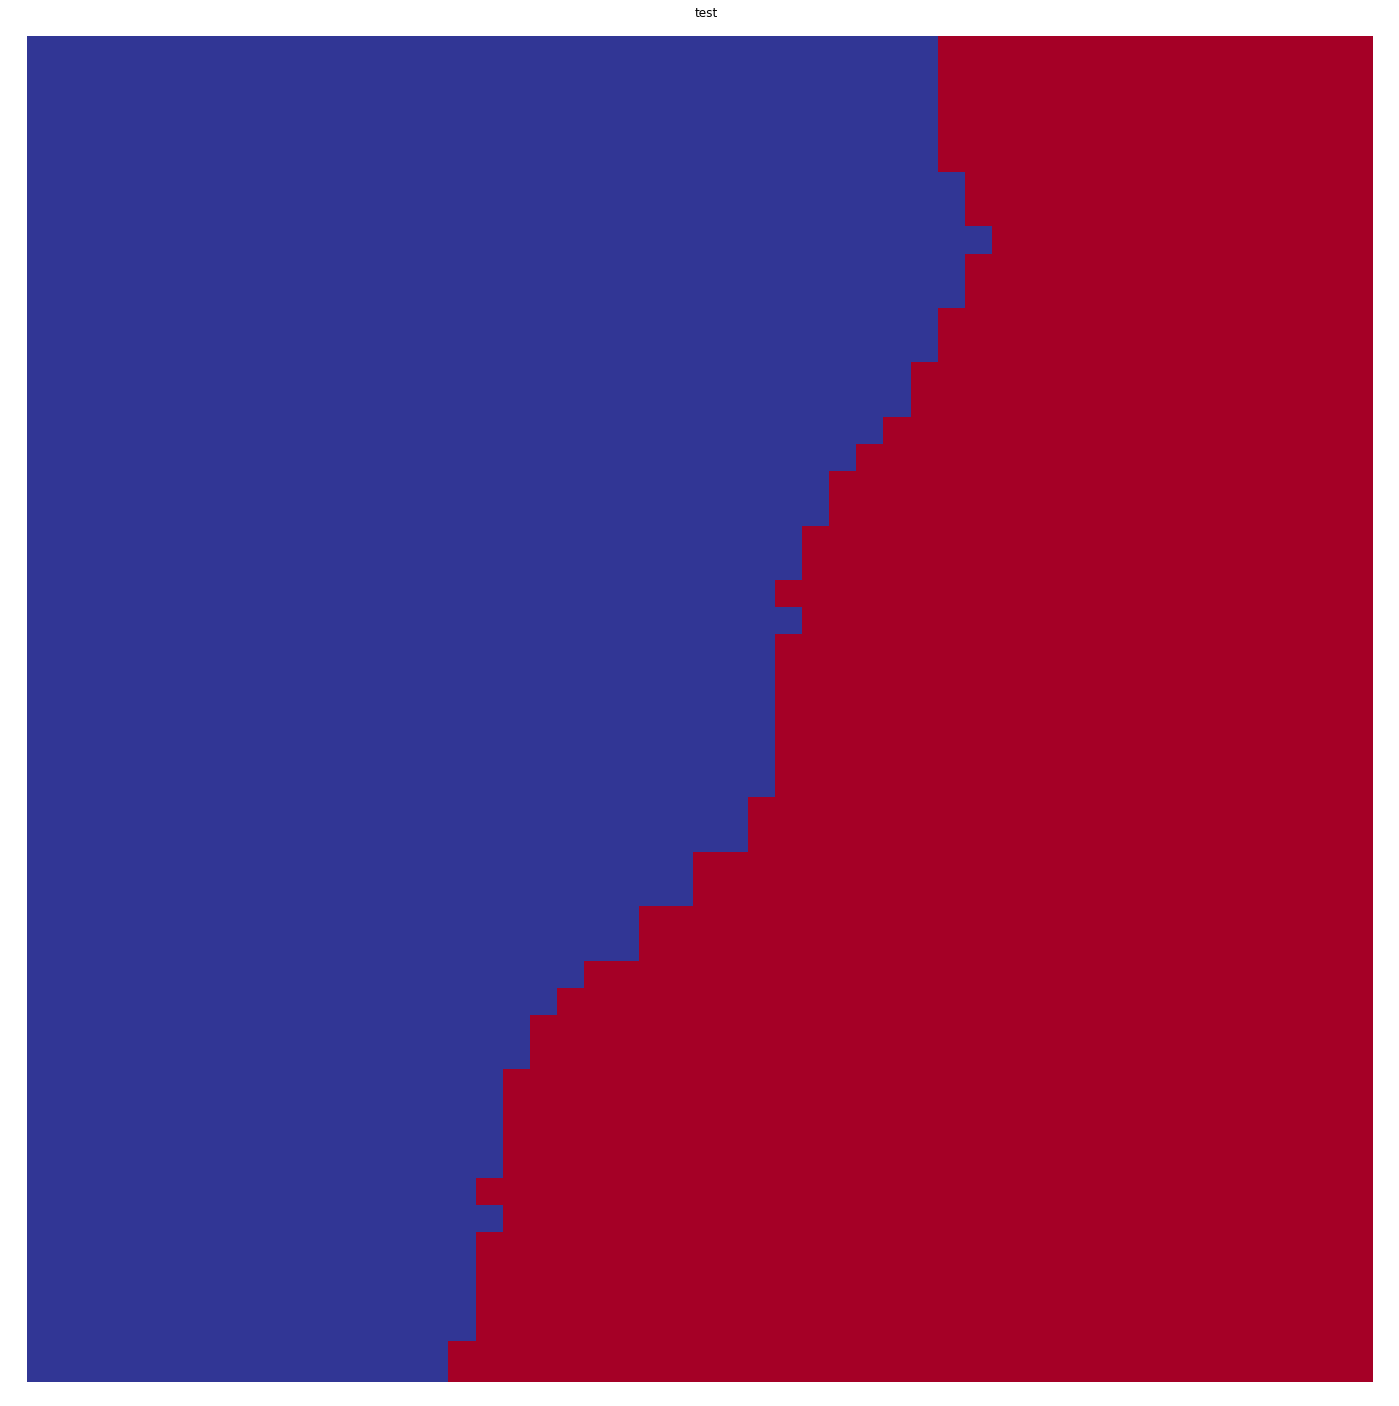

In [18]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

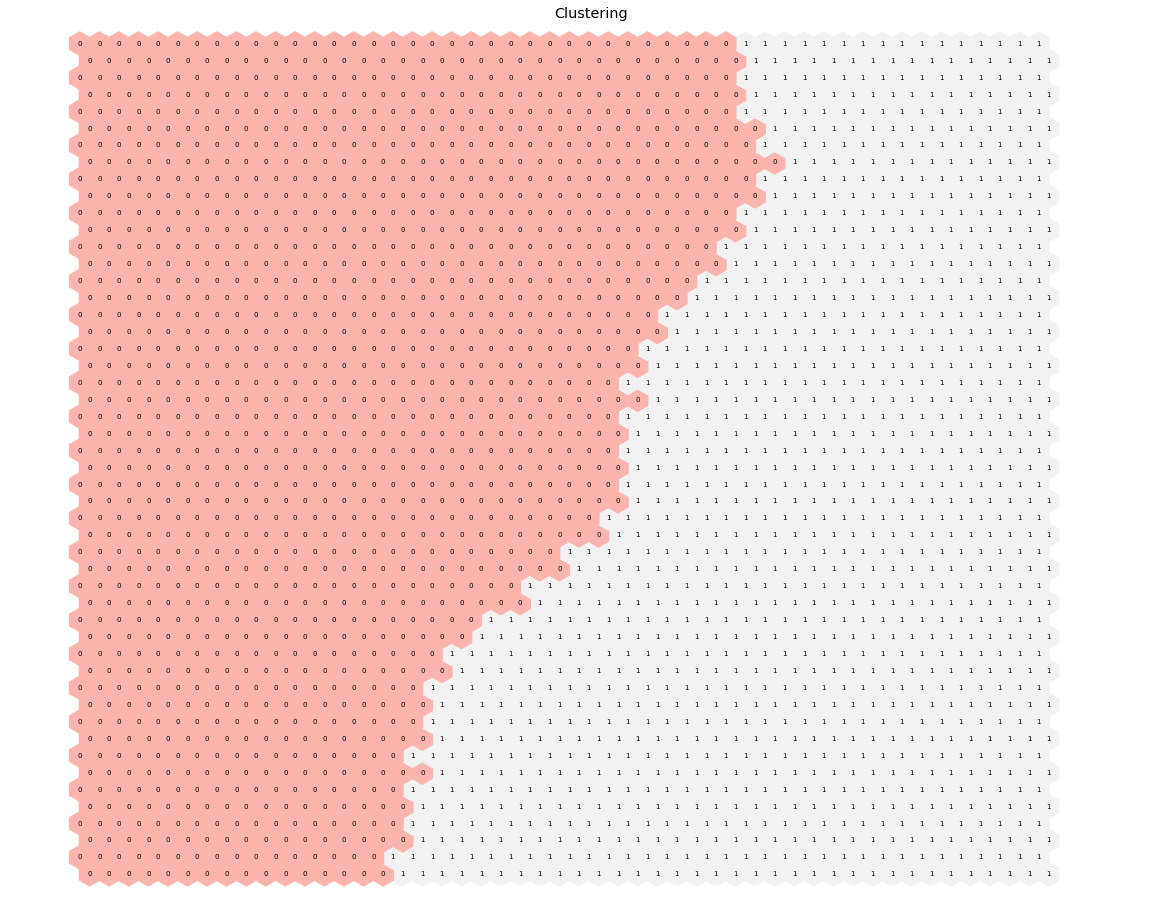

In [19]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

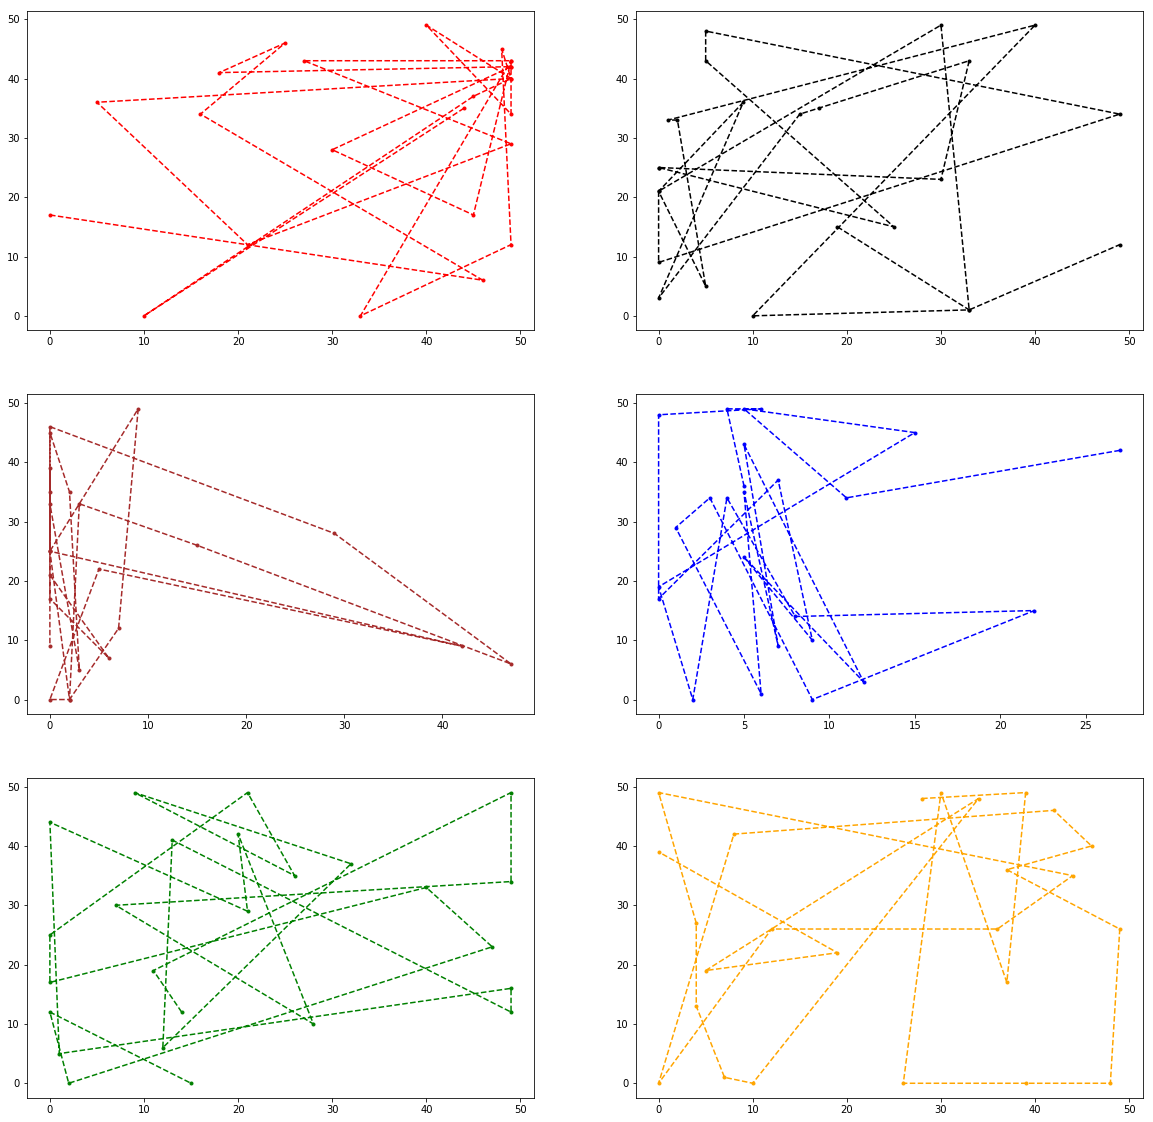

In [20]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

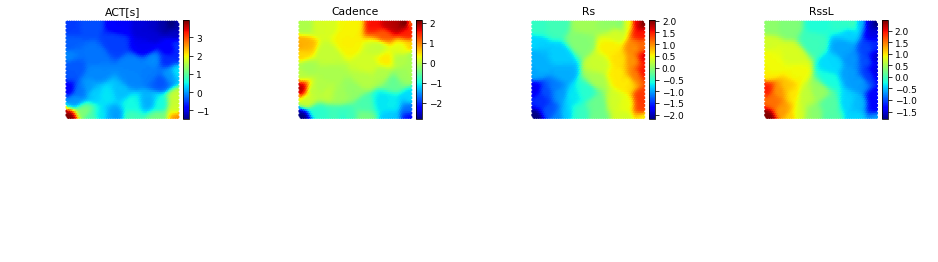

In [21]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[15 10]
 [12 13]]


true_positives total: 28
false_positives total: 22
false_negatives total: 22

Precision:  0.5603864734299517
Recal:  0.56
F1-Score:  0.5592948717948718
Accuracy:  0.56
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [5 0]]


true_positives total: 4
false_positives total: 6
false_negatives total: 6

Precision:  0.2222222222222222
Recal:  0.4
F1-Score:  0.2857142857142857
Accuracy:  0.4
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[12 13]
 [15 10]]


true_positives total: 22
false_positives total: 28
false_negatives total: 28

Precision:  0.43961352657004826
Recal:  0.44
F1-Score:  0.4391025641025641
Accuracy:  0.44
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [4 1]]


true_positives total: 6
false_positi

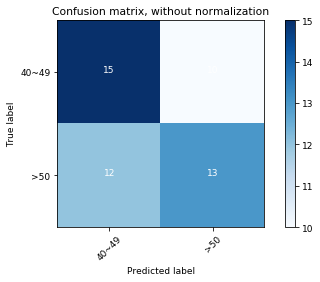

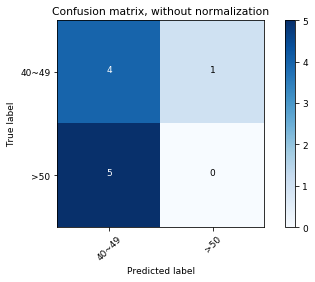

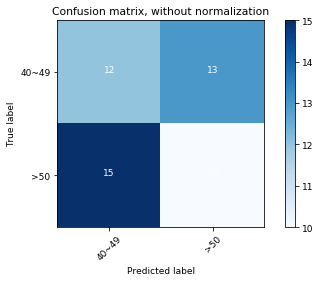

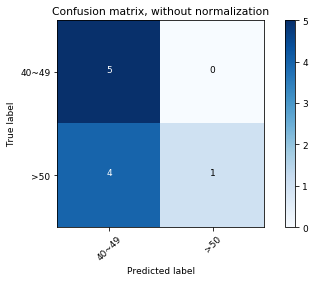

In [22]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 2

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ACT[s] Cadence Rs RssL
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [23]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'Rs', 'RssL']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


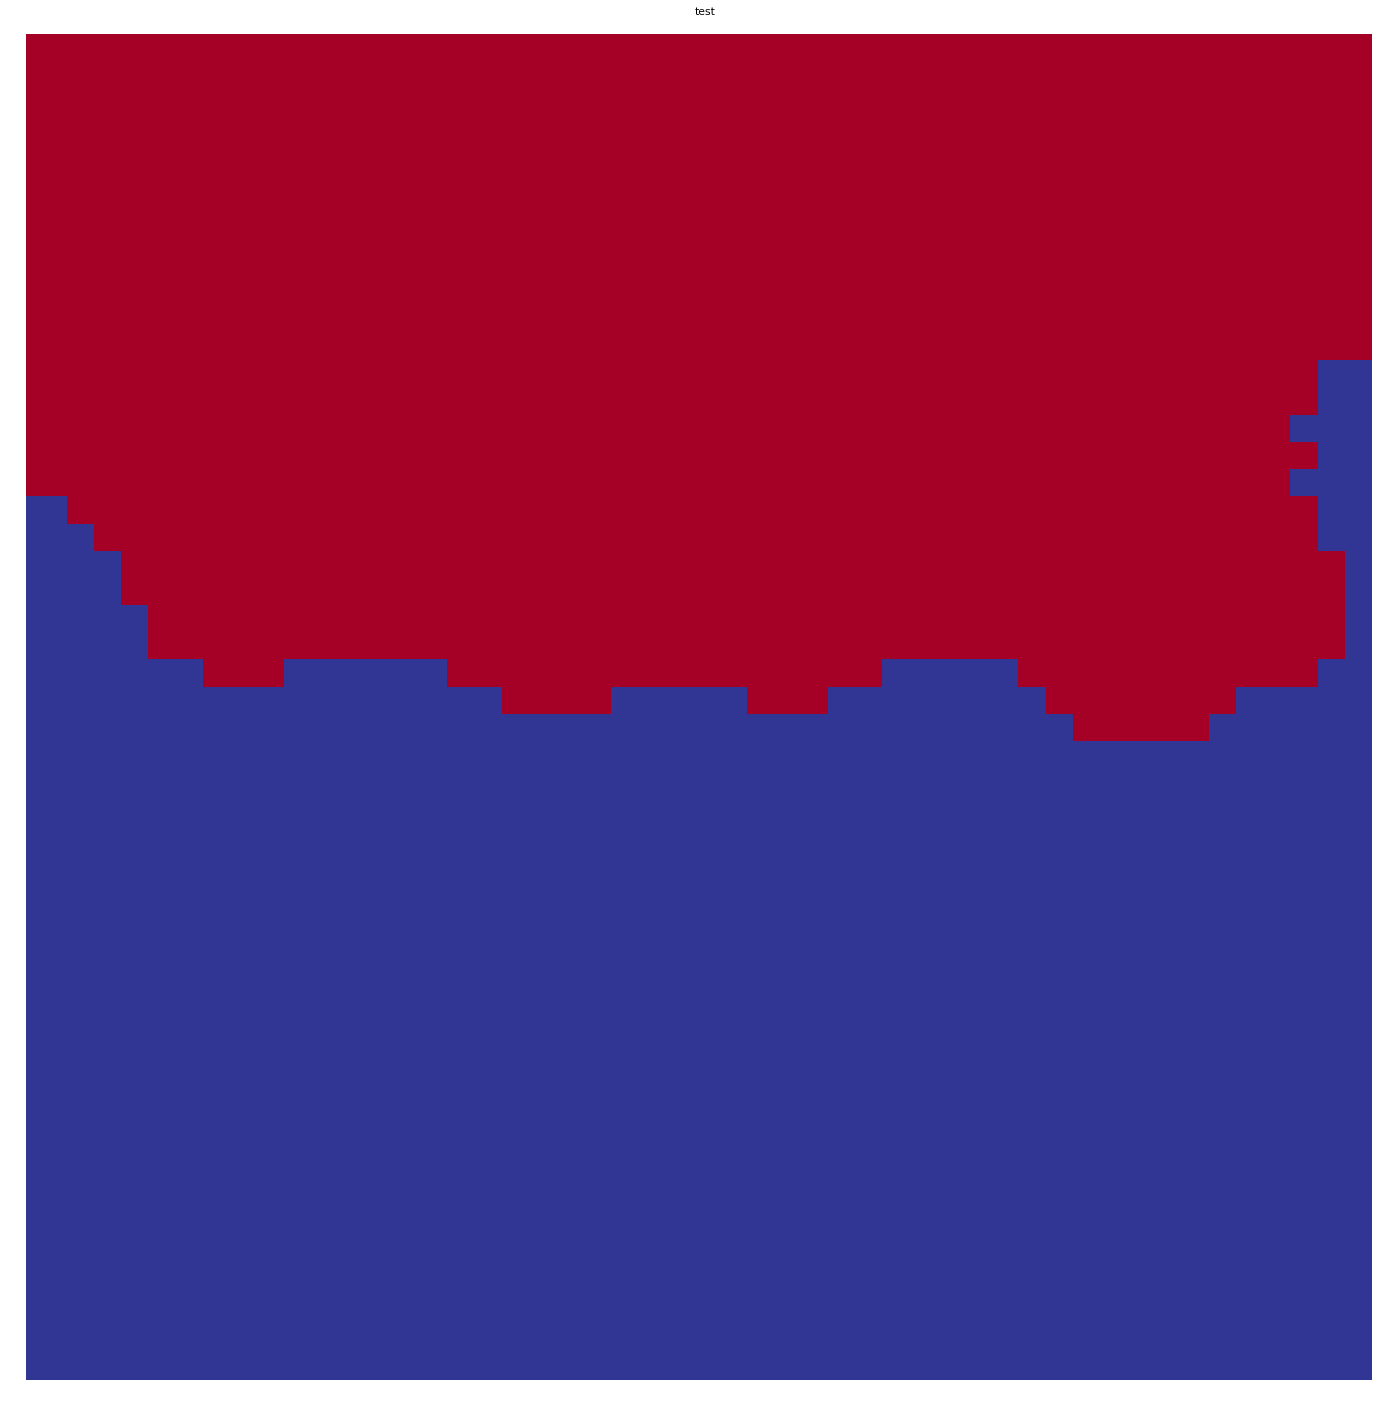

In [24]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

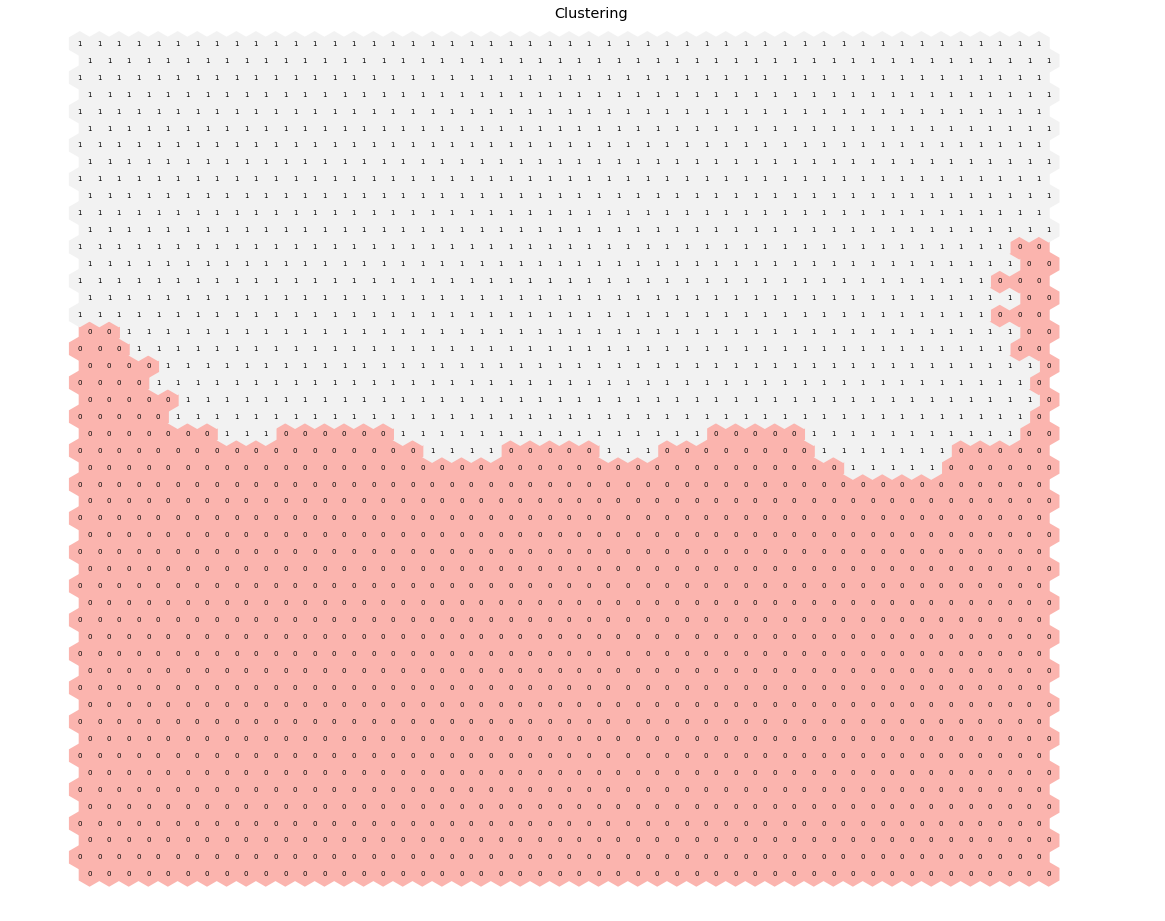

In [25]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

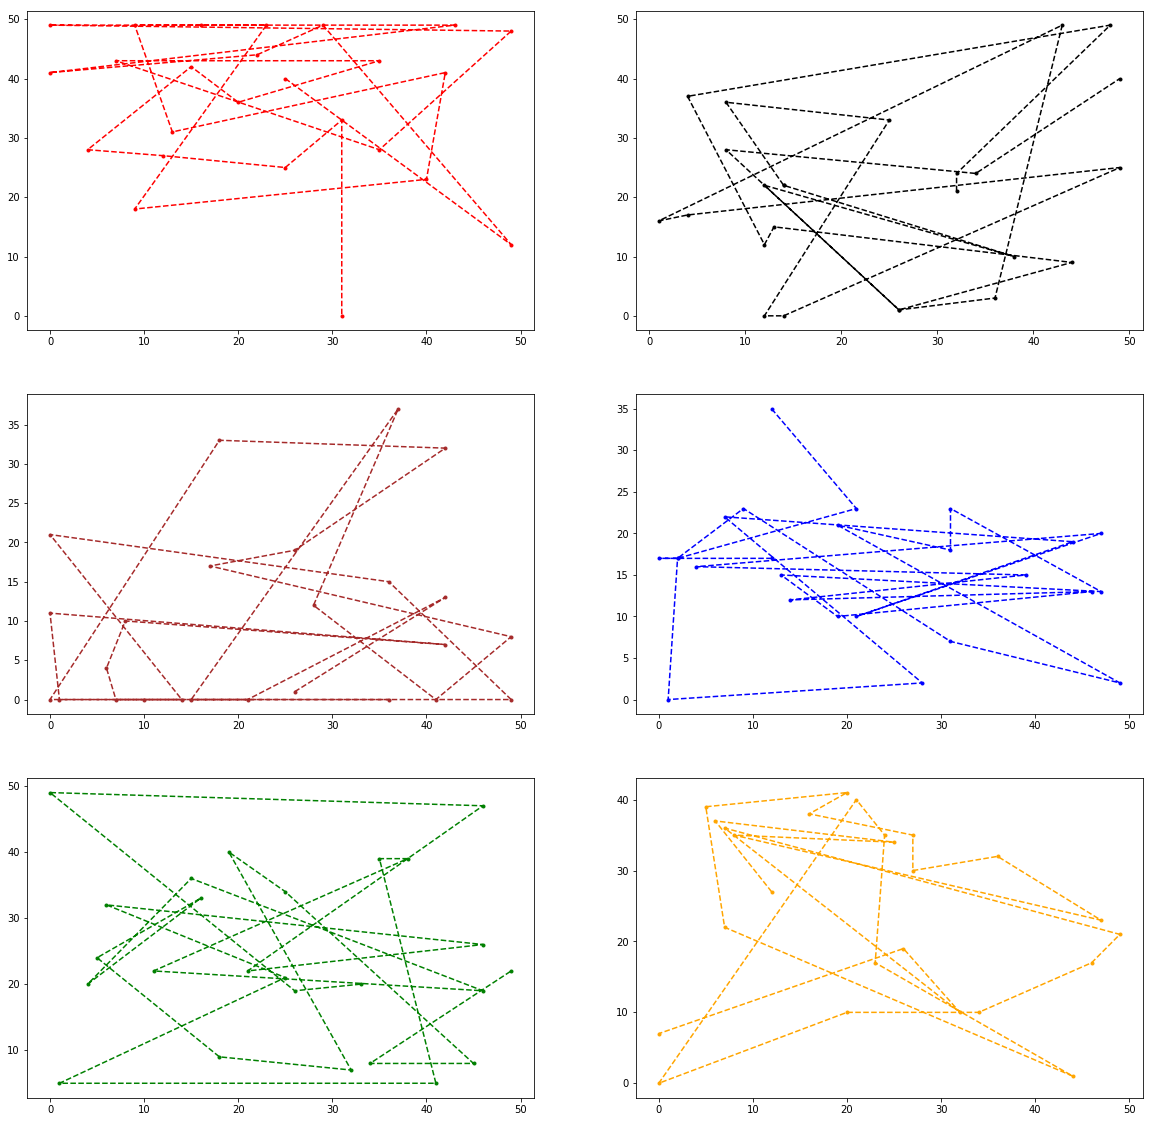

In [26]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

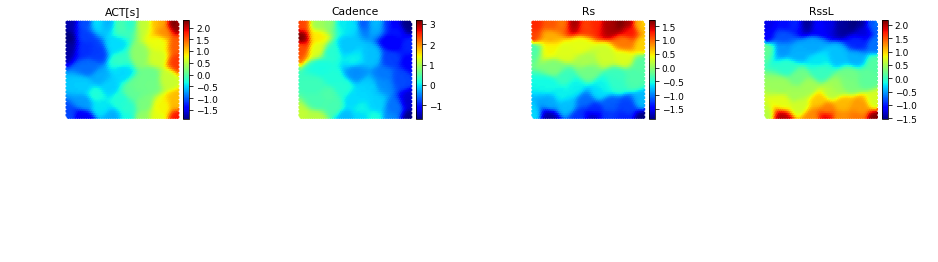

In [27]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[ 4 21]
 [22  3]]


true_positives total: 7
false_positives total: 43
false_negatives total: 43

Precision:  0.13942307692307693
Recal:  0.14
F1-Score:  0.13965586234493796
Accuracy:  0.14
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [3 2]]


true_positives total: 2
false_positives total: 8
false_negatives total: 8

Precision:  0.14285714285714285
Recal:  0.2
F1-Score:  0.16666666666666666
Accuracy:  0.2
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[22  3]
 [ 4 21]]


true_positives total: 43
false_positives total: 7
false_negatives total: 7

Precision:  0.8605769230769231
Recal:  0.86
F1-Score:  0.8599439775910364
Accuracy:  0.86
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[3 2]
 [0 5]]


true_positives total: 8
false_positi

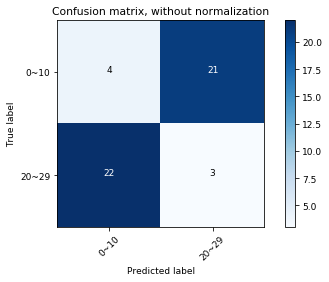

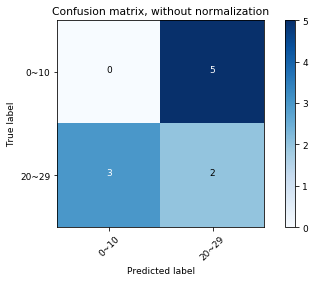

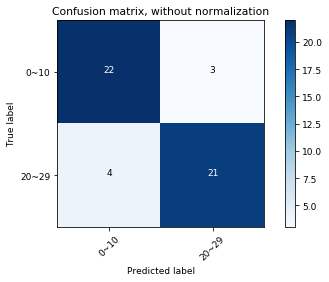

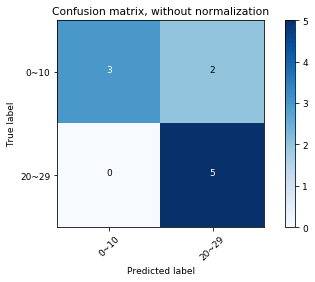

In [28]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>

# Experiment 3

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RssL RssR Rst Rsw
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [29]:
mapsize = [50,50]

combinations_to_be_analysed = ['RssL', 'Rst', 'Rsw', 'RssR']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


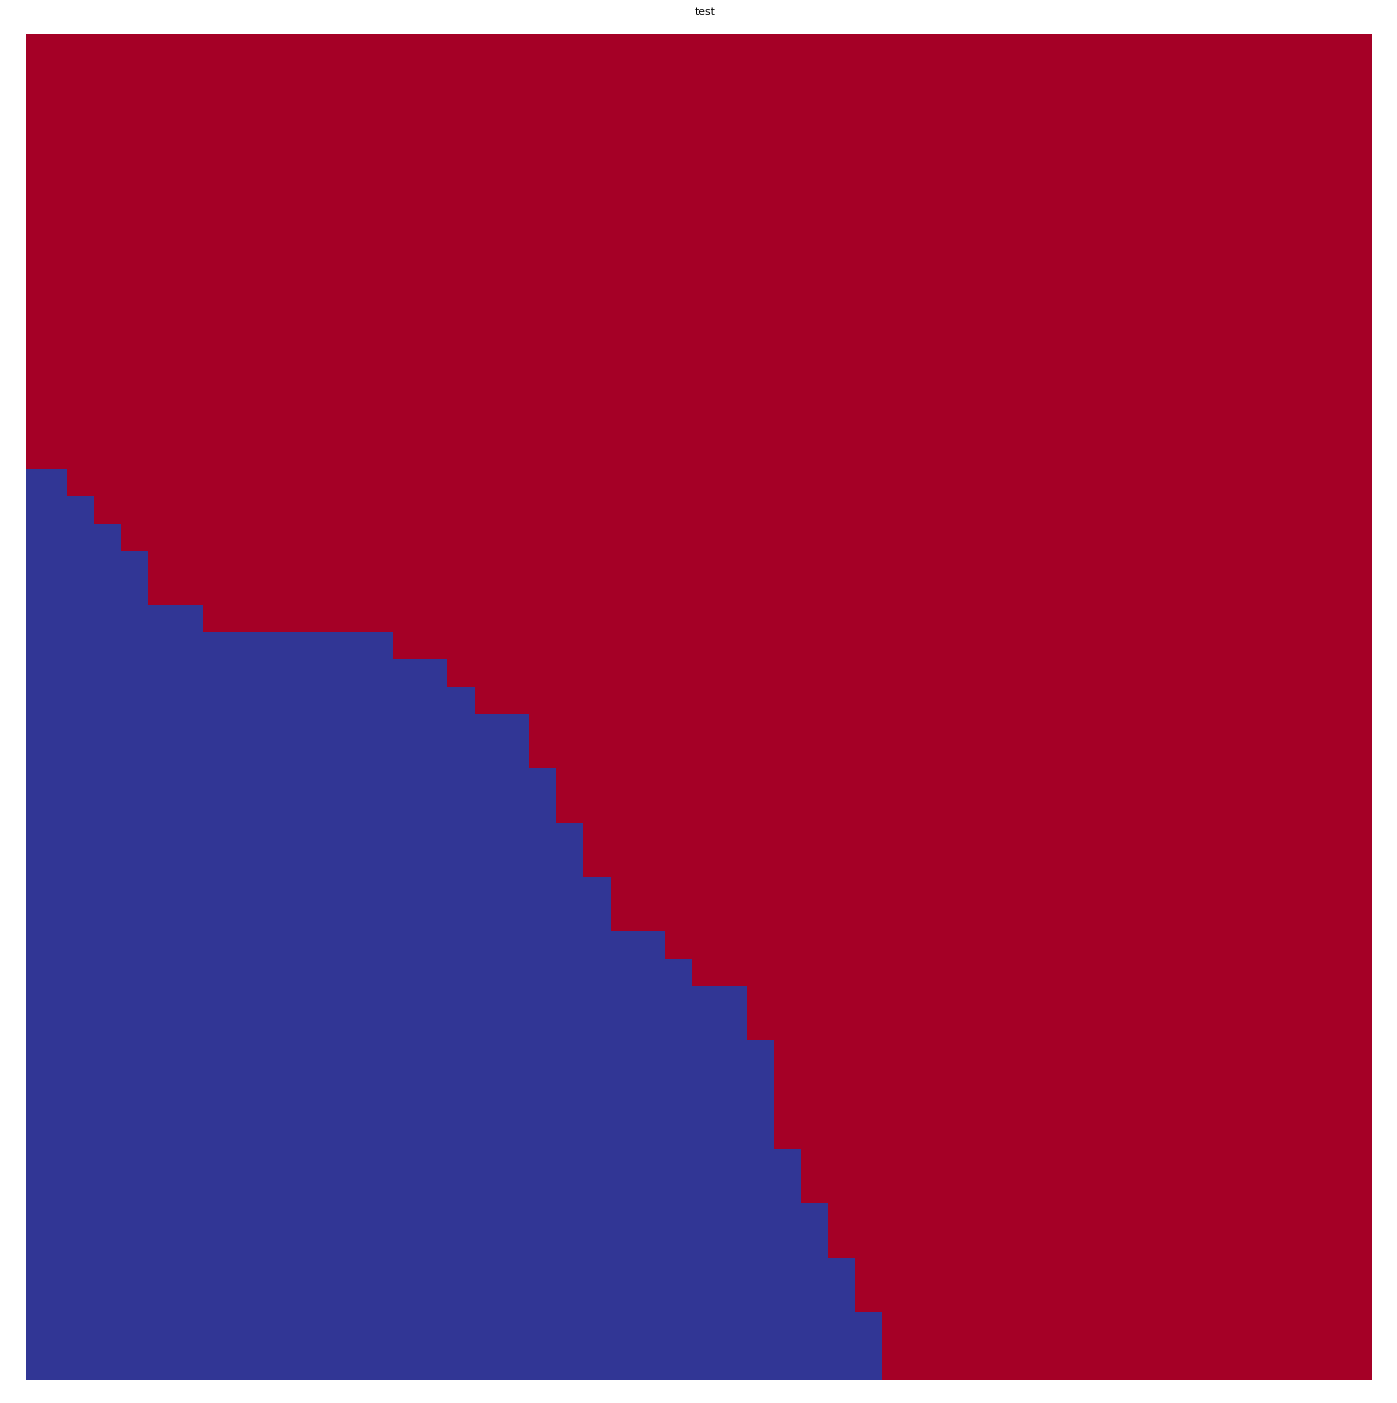

In [30]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

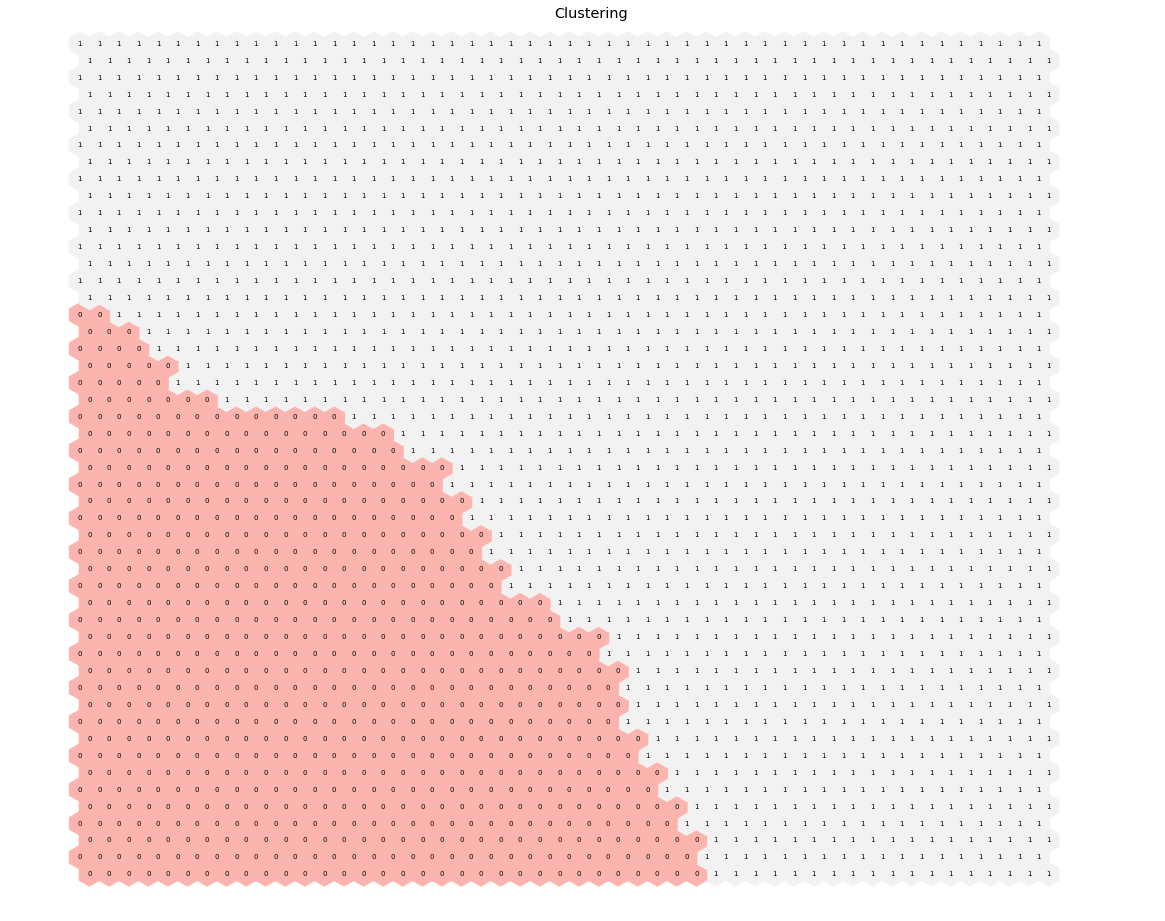

In [31]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

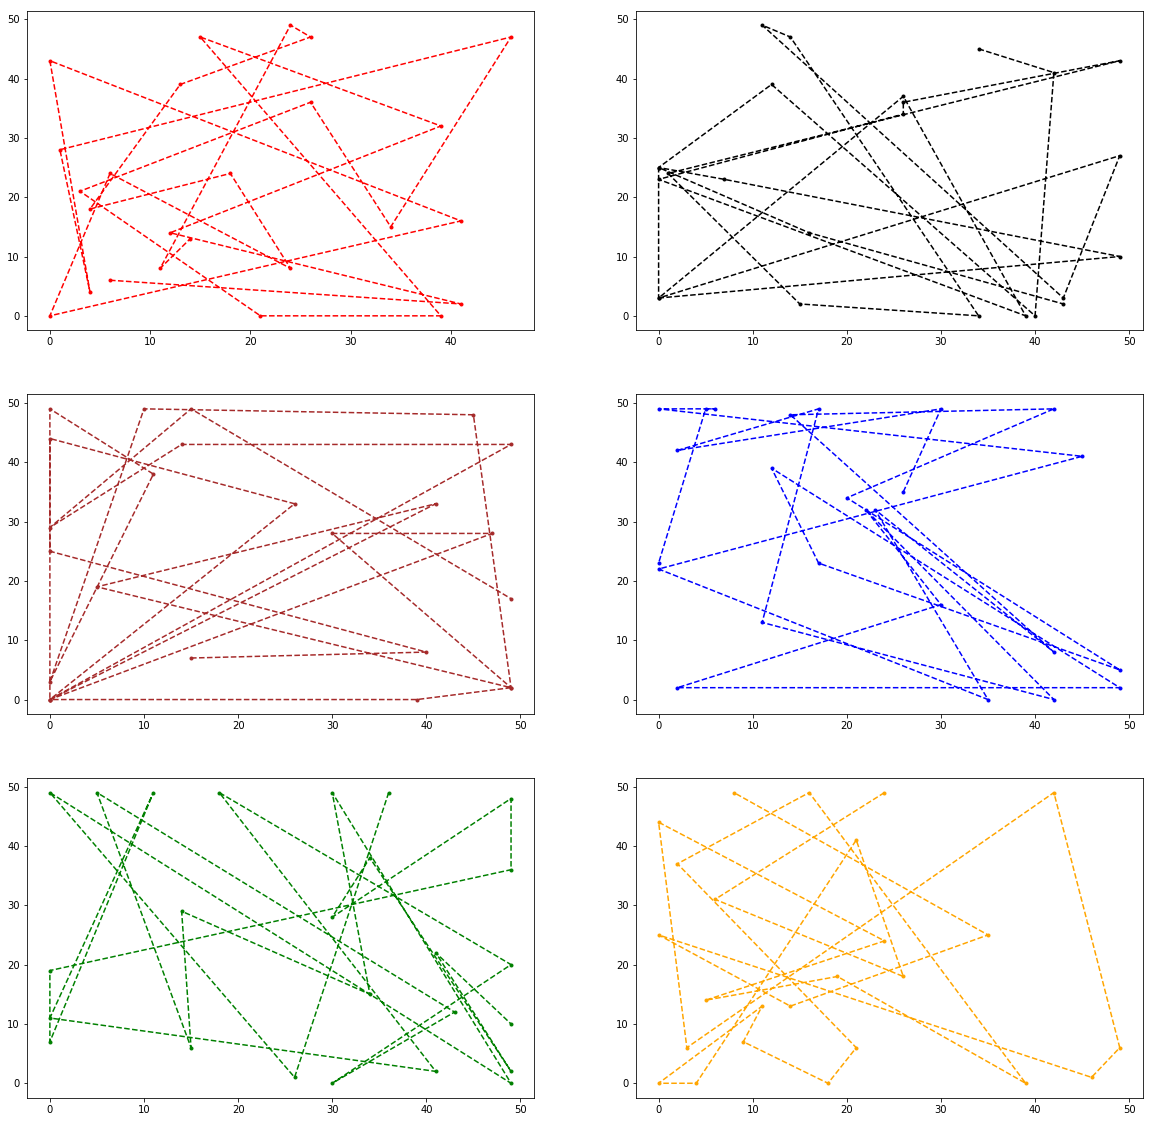

In [32]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

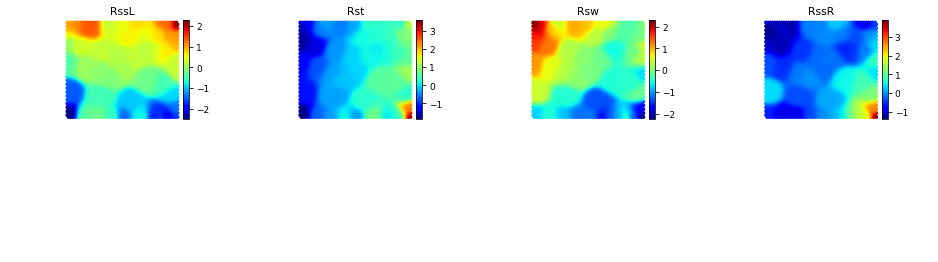

In [33]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[ 7 18]
 [ 8 17]]


true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.47619047619047616
Recal:  0.48
F1-Score:  0.45833333333333326
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[1 4]
 [3 2]]


true_positives total: 3
false_positives total: 7
false_negatives total: 7

Precision:  0.29166666666666663
Recal:  0.3
F1-Score:  0.29292929292929293
Accuracy:  0.3
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 8 17]
 [ 7 18]]


true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5238095238095237
Recal:  0.52
F1-Score:  0.5
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[3 2]
 [1 4]]


true_positives total: 7
false_positives total: 3

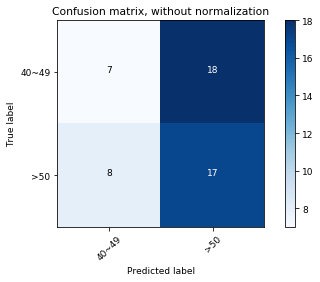

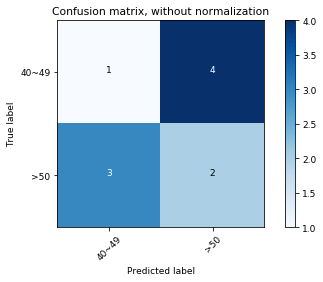

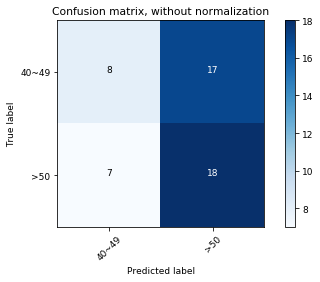

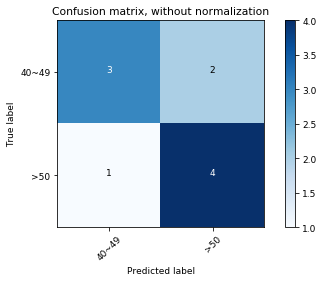

In [34]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 4

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: RssL RssR Rst Rsw
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [35]:
mapsize = [50,50]

combinations_to_be_analysed = ['RssL', 'RssR', 'Rst', 'Rsw']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


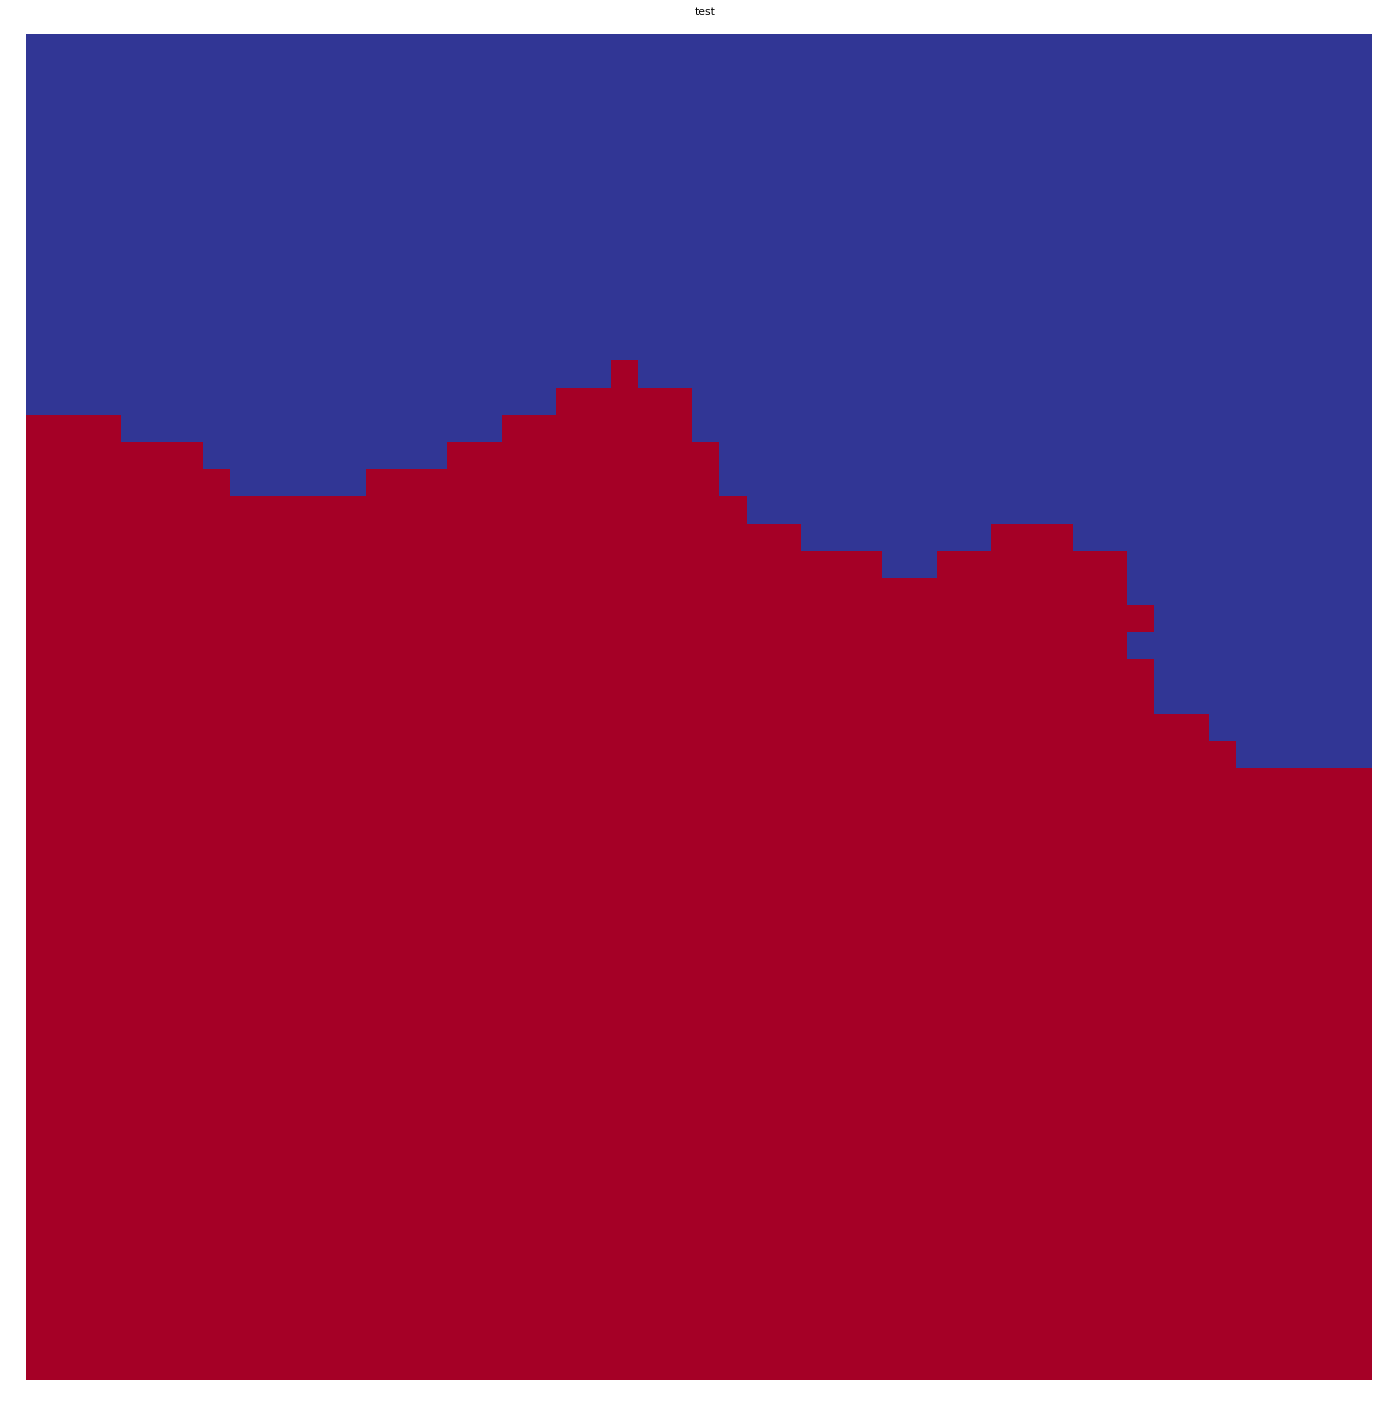

In [36]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

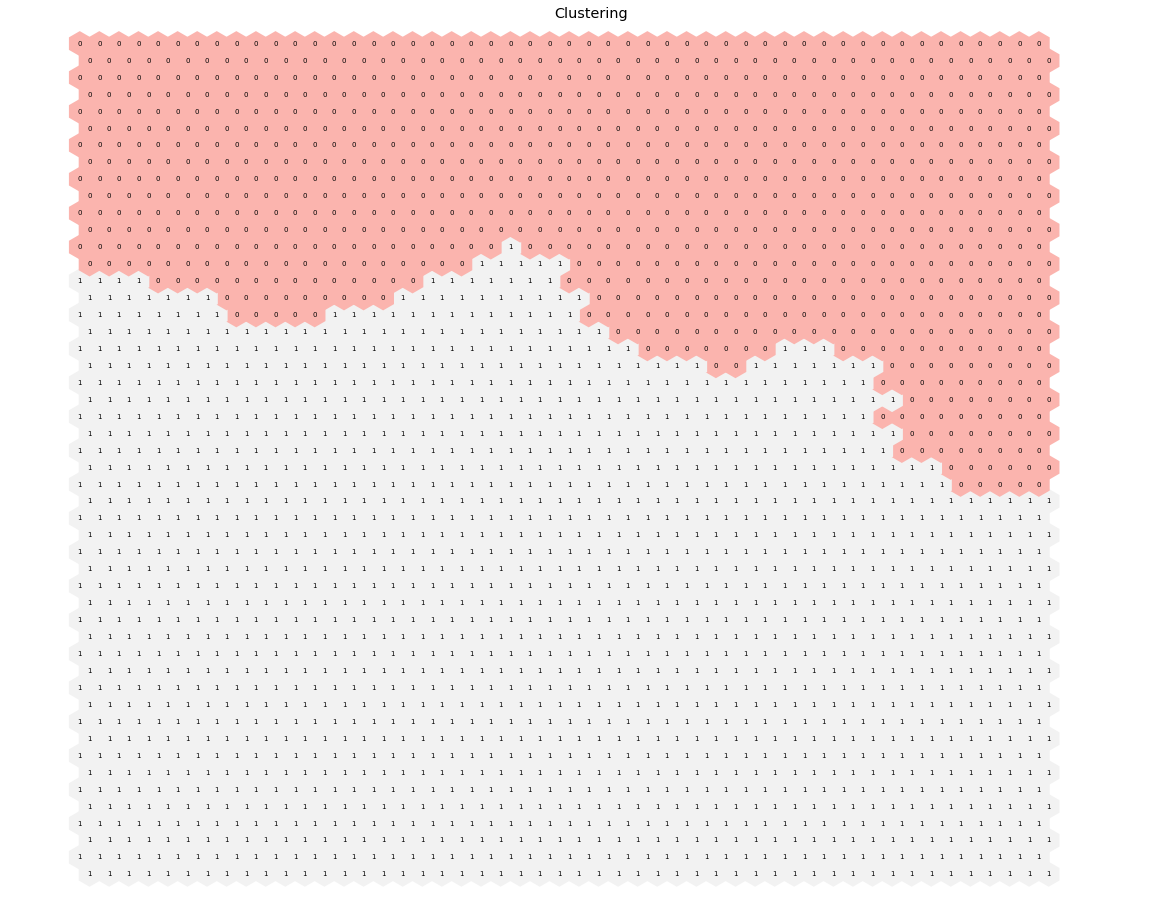

In [37]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

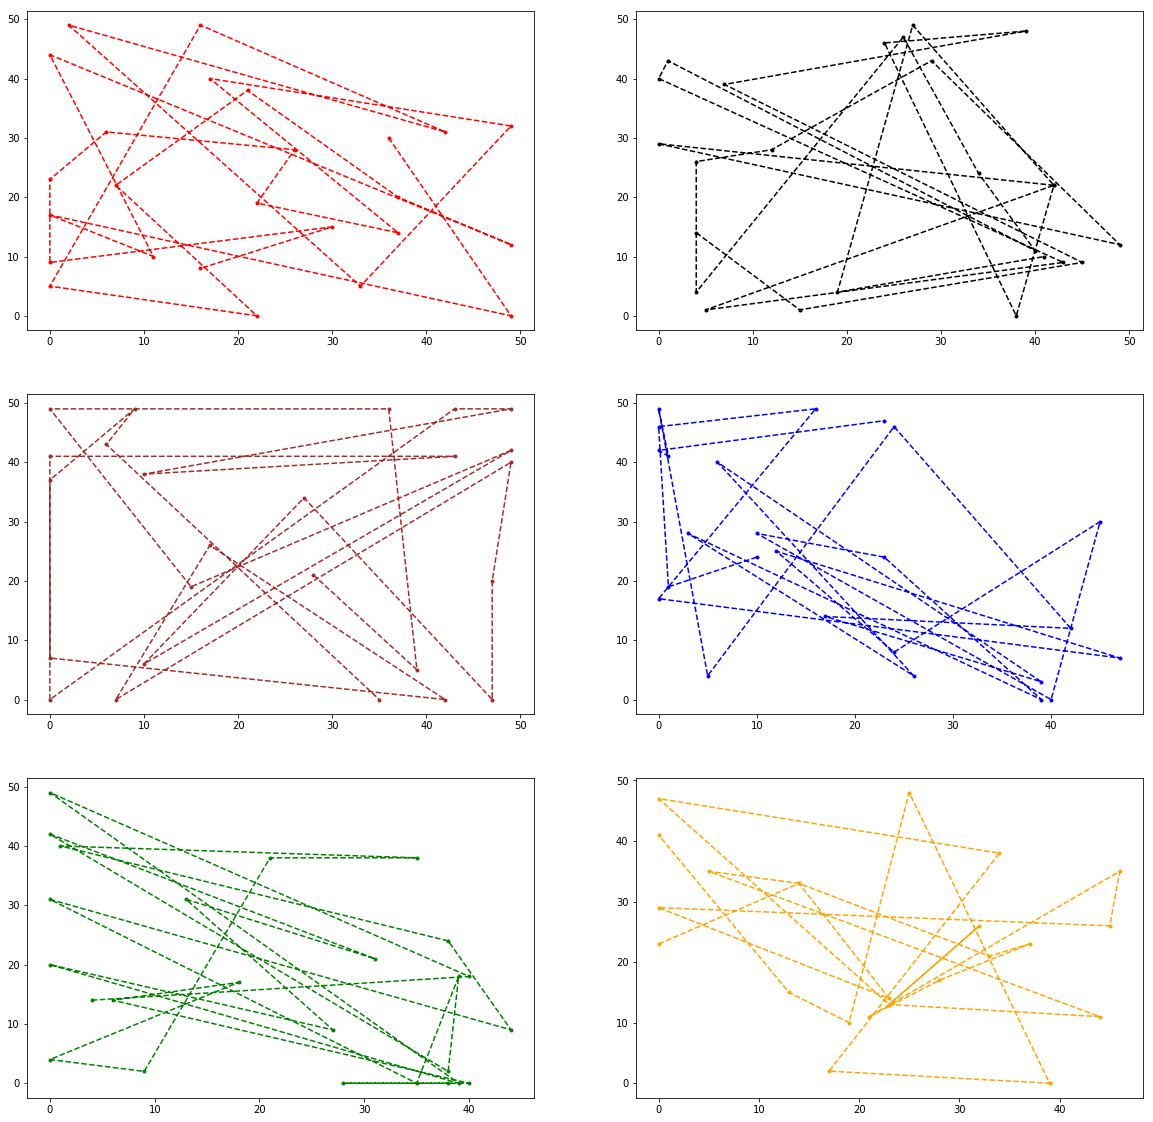

In [38]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

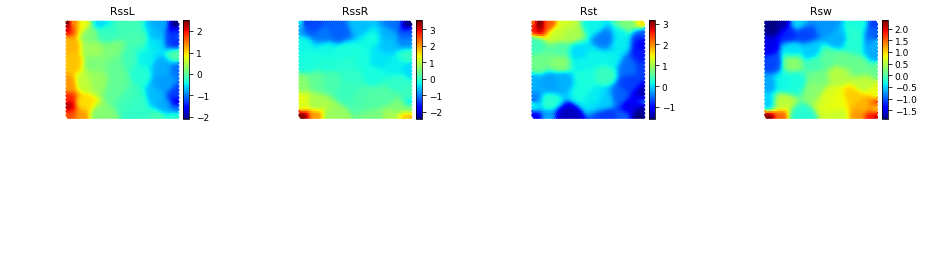

In [39]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[ 9 16]
 [10 15]]


true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.4787775891341256
Recal:  0.48
F1-Score:  0.4724025974025974
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[1 4]
 [2 3]]


true_positives total: 4
false_positives total: 6
false_negatives total: 6

Precision:  0.38095238095238093
Recal:  0.4
F1-Score:  0.375
Accuracy:  0.4
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[10 15]
 [ 9 16]]


true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5212224108658743
Recal:  0.52
F1-Score:  0.512987012987013
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [1 4]]


true_positives total: 6
false_positives total: 4
f

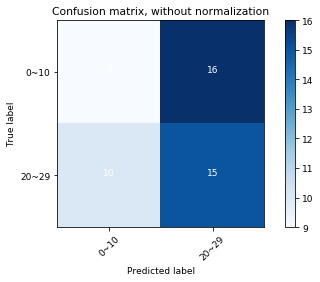

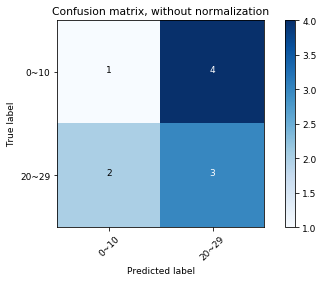

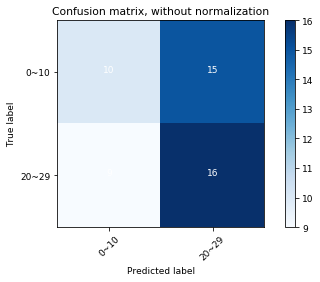

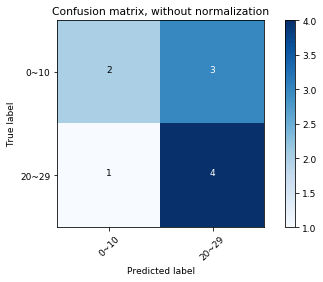

In [40]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>

# Experiment 5

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input:  ACT[s] Cadence RssL Rsw
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [41]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'RssL', 'Rsw']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


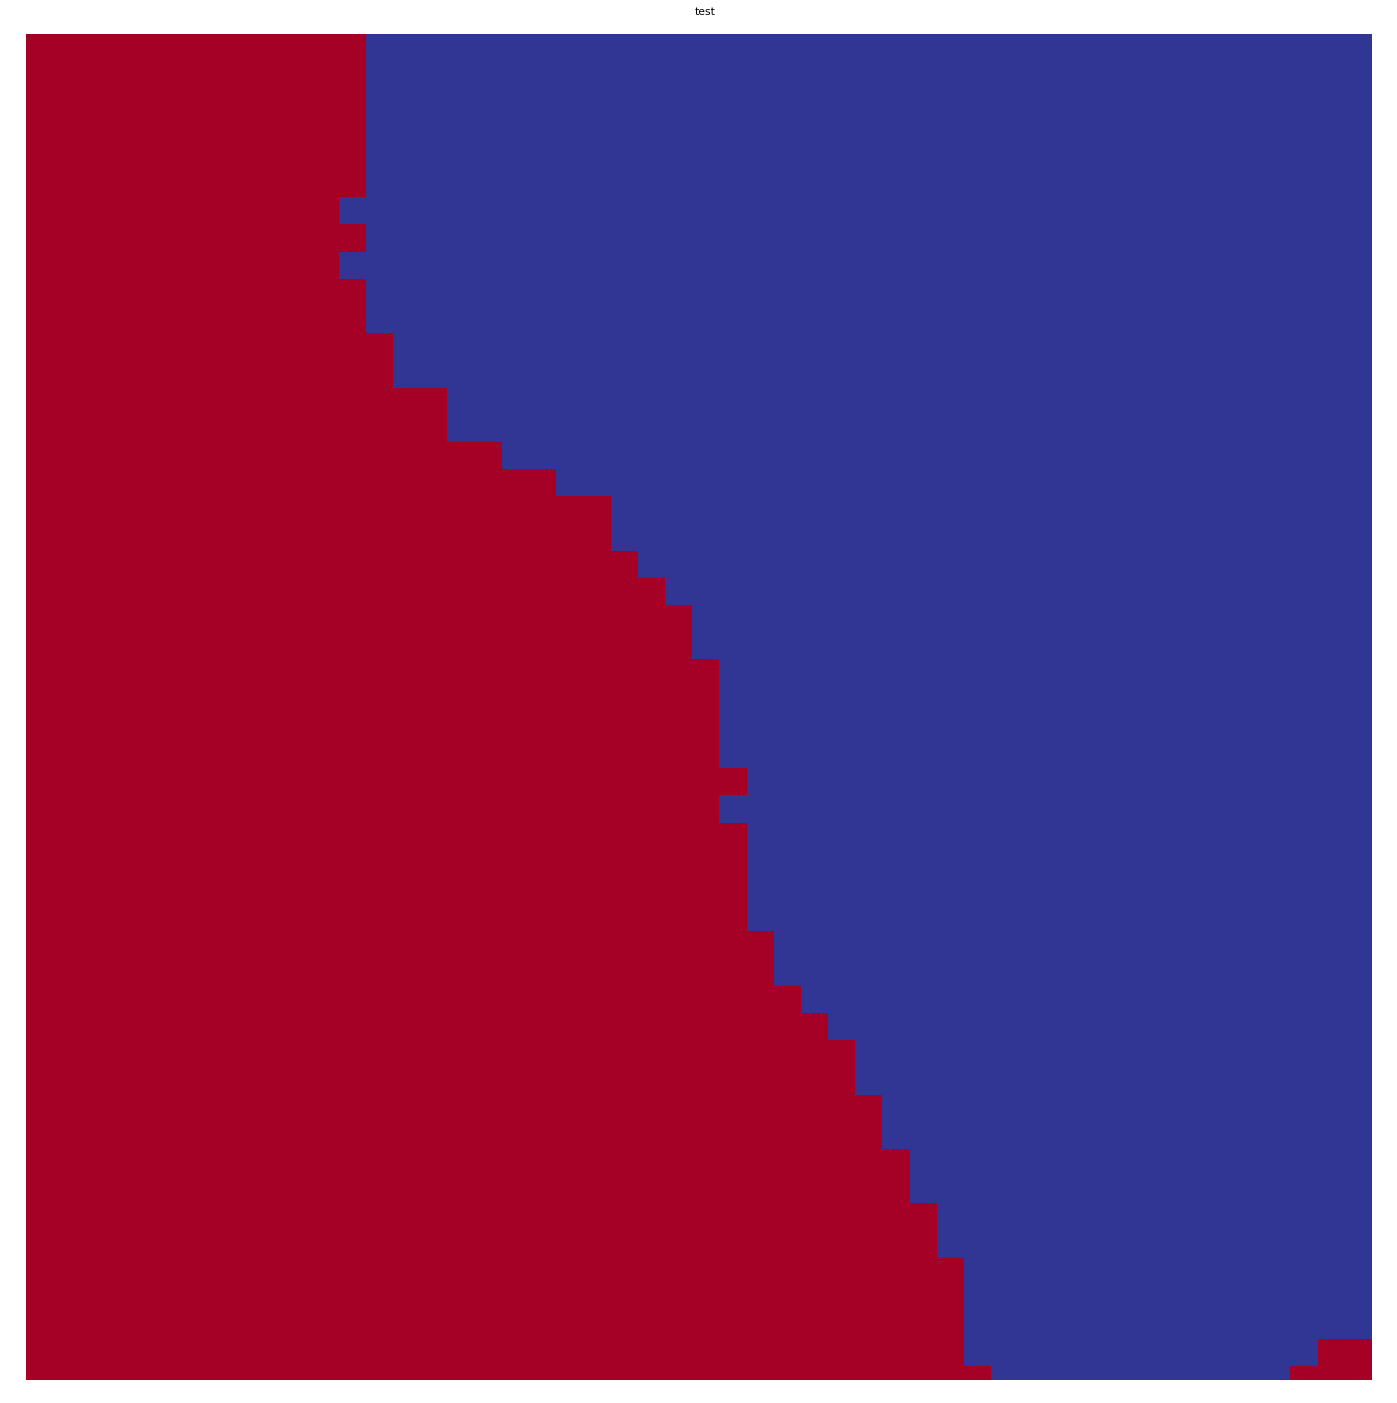

In [42]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

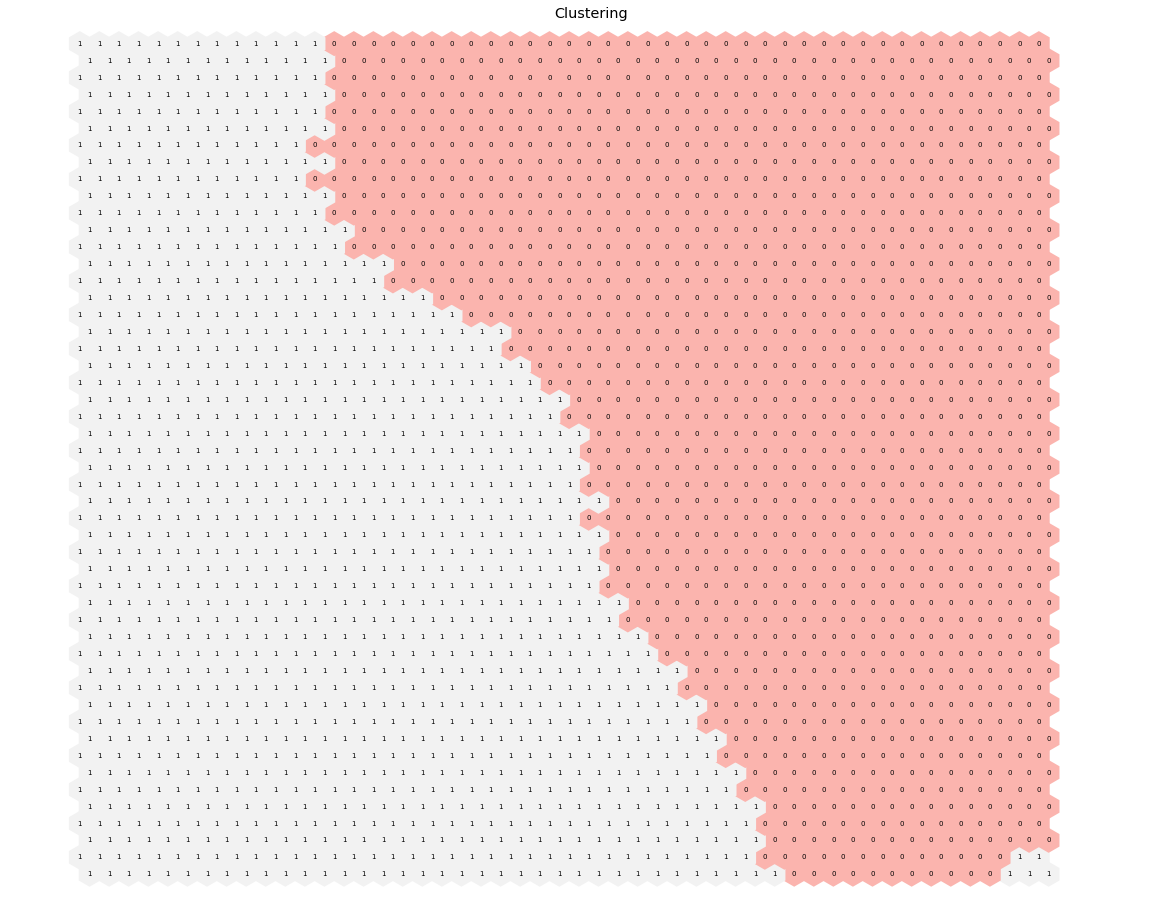

In [43]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

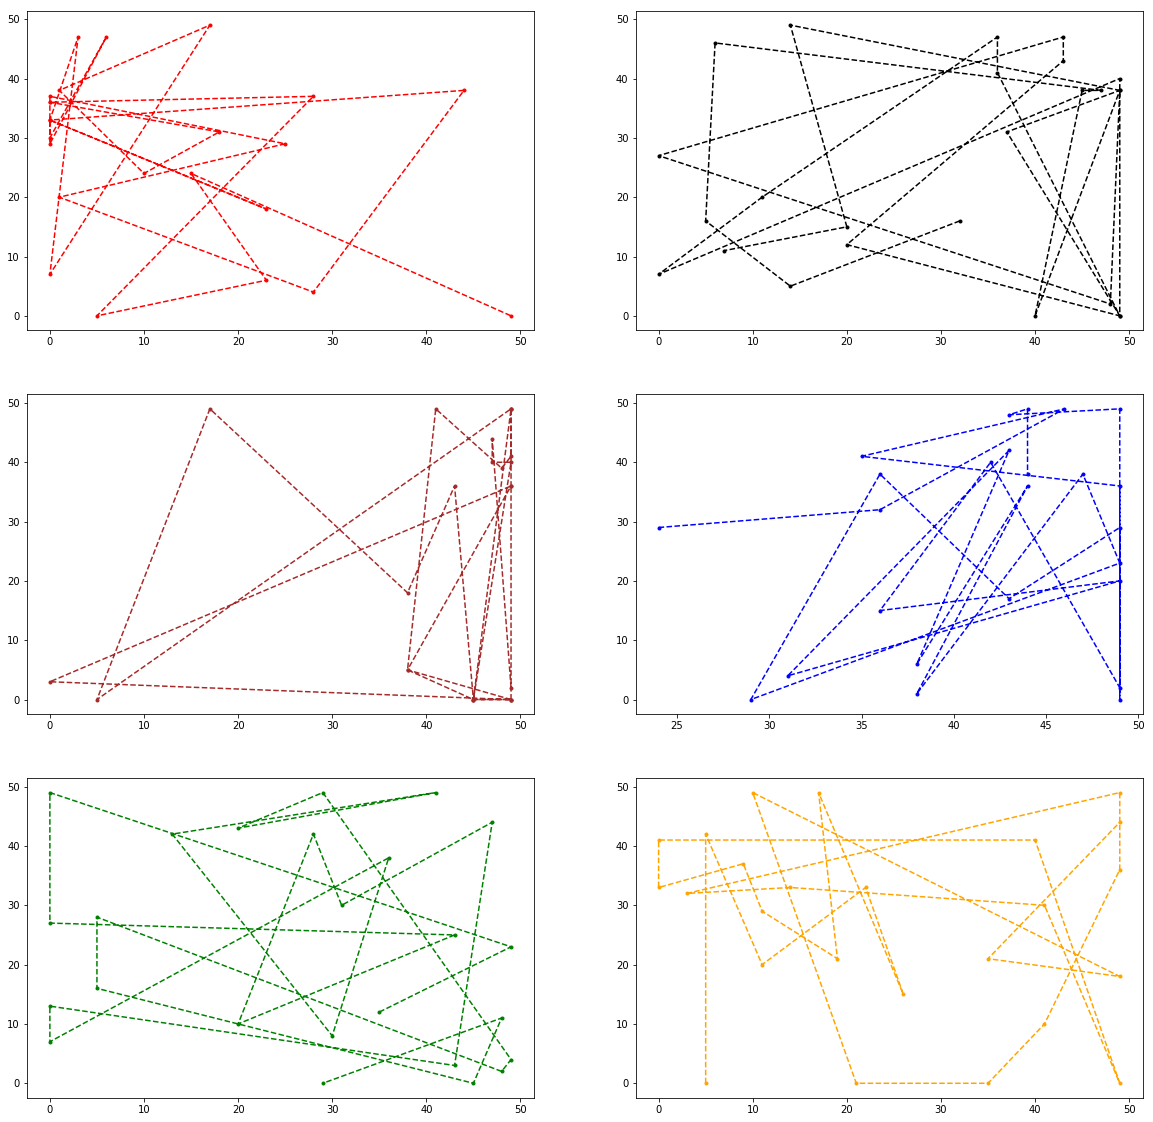

In [44]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

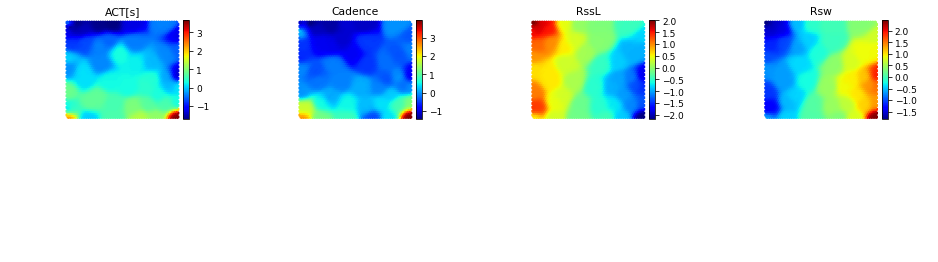

In [45]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[15 10]
 [11 14]]


true_positives total: 29
false_positives total: 21
false_negatives total: 21

Precision:  0.5801282051282051
Recal:  0.58
F1-Score:  0.5798319327731093
Accuracy:  0.58
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [5 0]]


true_positives total: 4
false_positives total: 6
false_negatives total: 6

Precision:  0.2222222222222222
Recal:  0.4
F1-Score:  0.2857142857142857
Accuracy:  0.4
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[11 14]
 [15 10]]


true_positives total: 21
false_positives total: 29
false_negatives total: 29

Precision:  0.4198717948717949
Recal:  0.42
F1-Score:  0.41976790716286516
Accuracy:  0.42
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [4 1]]


true_positives total: 6
false_positi

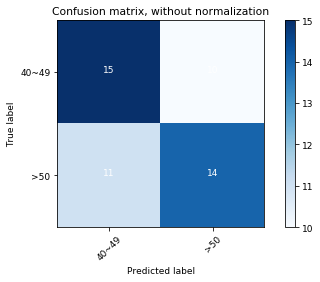

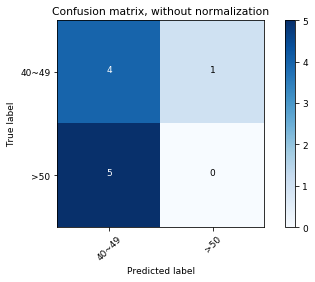

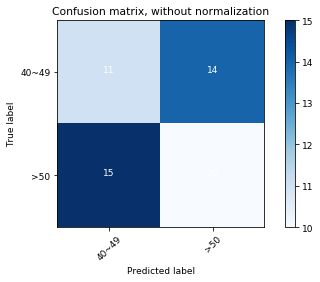

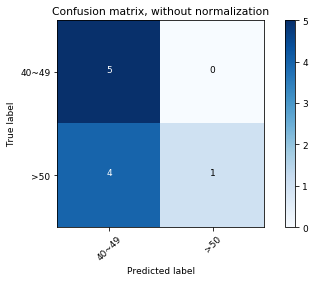

In [46]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 6

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input:  ACT[s] Cadence RssL Rsw
- Only 2 groups to classify
   - Group 1: 0~10
   - Group 2: 20~29

In [47]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'Cadence', 'RssL', 'Rsw']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


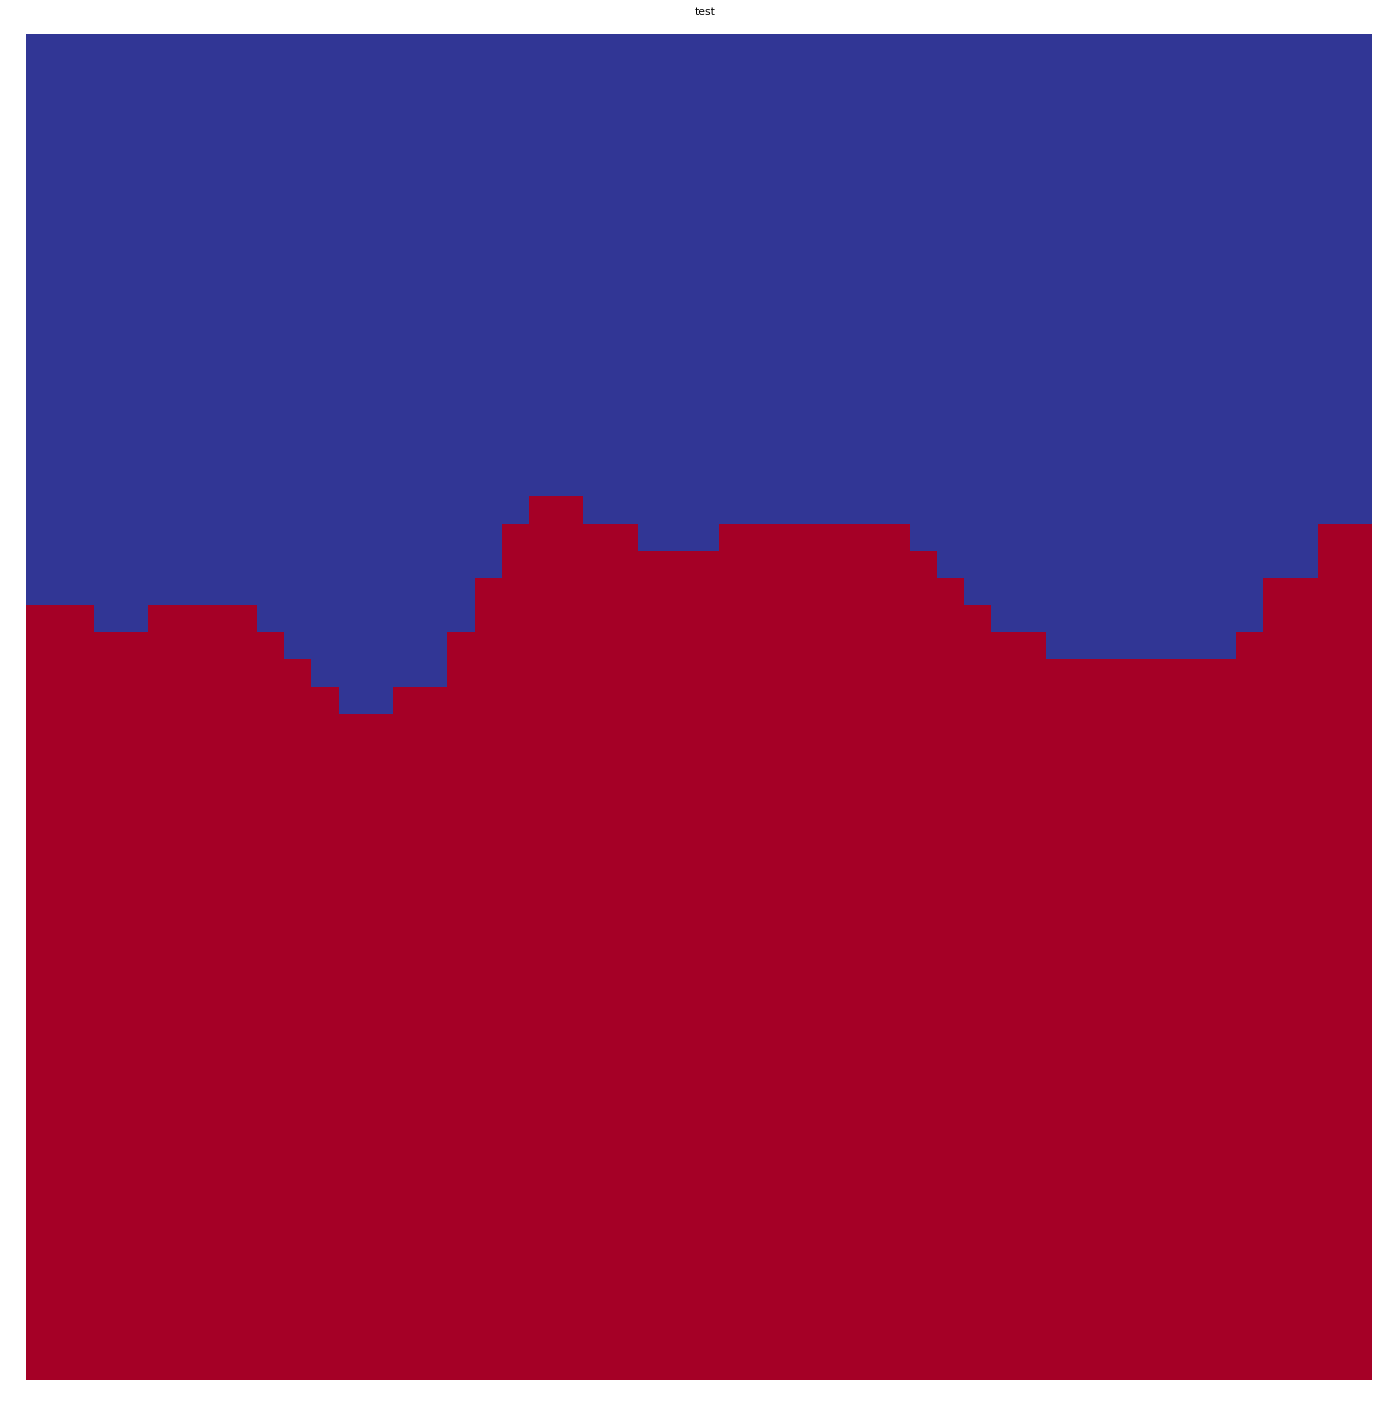

In [48]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

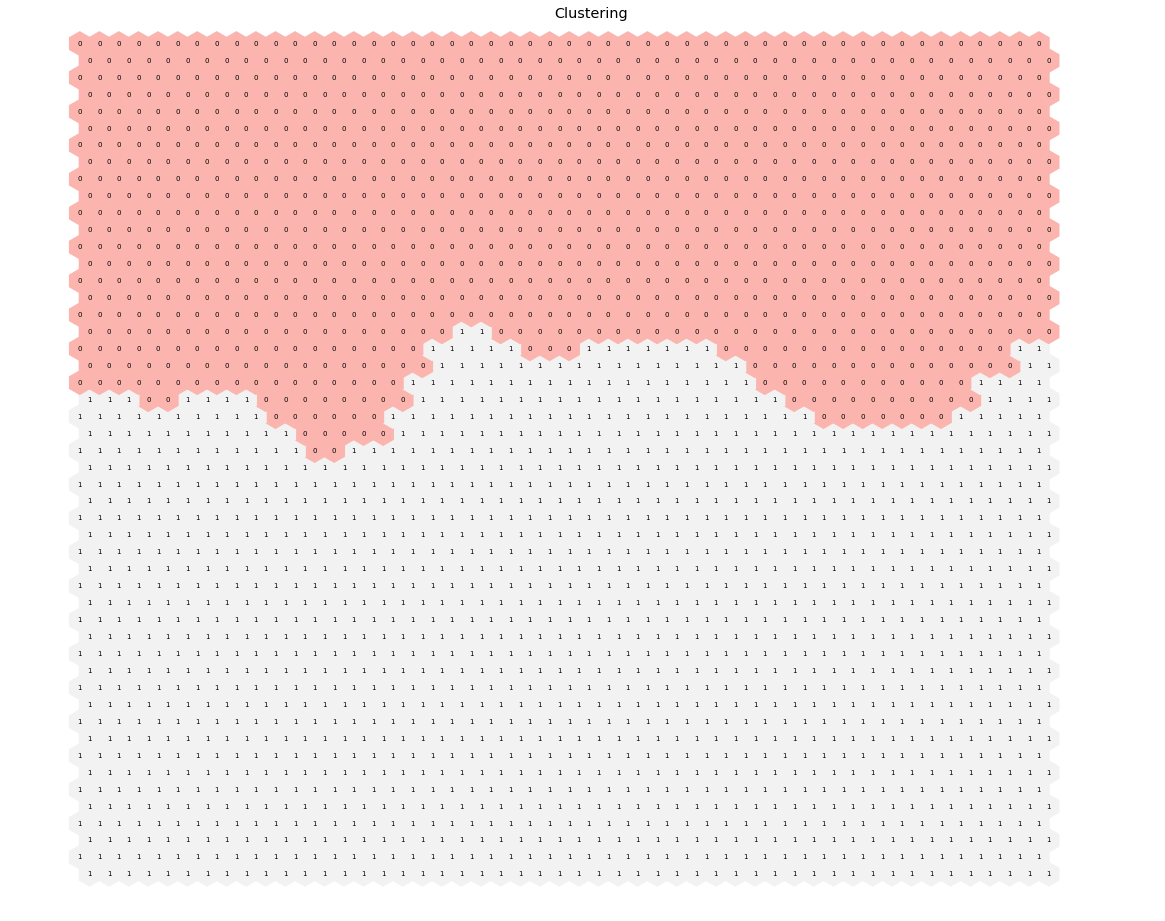

In [49]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

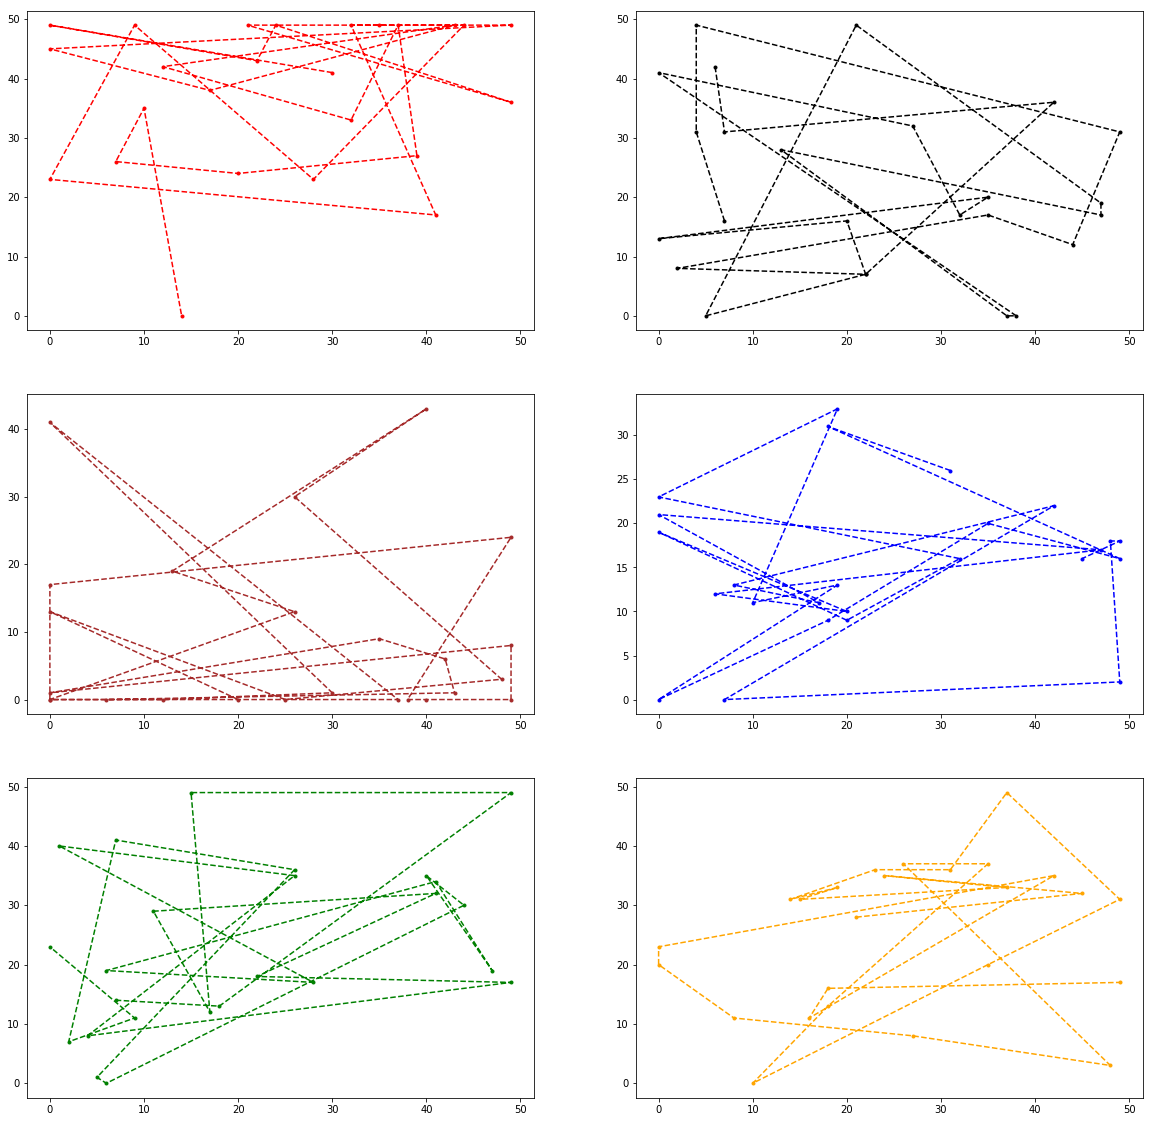

In [50]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

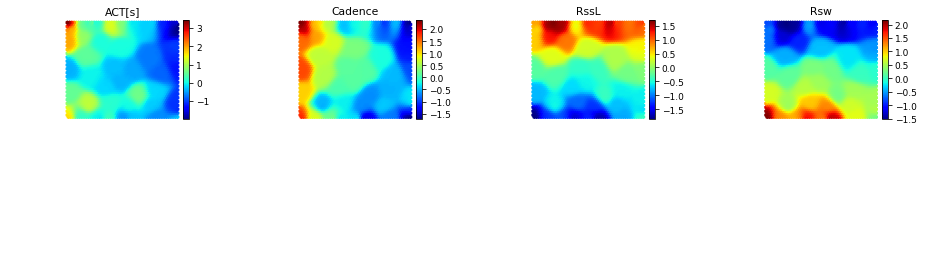

In [51]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[21  4]
 [ 2 23]]


true_positives total: 44
false_positives total: 6
false_negatives total: 6

Precision:  0.8824476650563606
Recal:  0.88
F1-Score:  0.8798076923076923
Accuracy:  0.88
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [2 3]]


true_positives total: 8
false_positives total: 2
false_negatives total: 2

Precision:  0.8571428571428572
Recal:  0.8
F1-Score:  0.7916666666666666
Accuracy:  0.8
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 2 23]
 [21  4]]


true_positives total: 6
false_positives total: 44
false_negatives total: 44

Precision:  0.11755233494363929
Recal:  0.12
F1-Score:  0.11858974358974357
Accuracy:  0.12
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [5 0]]


true_positives total: 2
false_positive

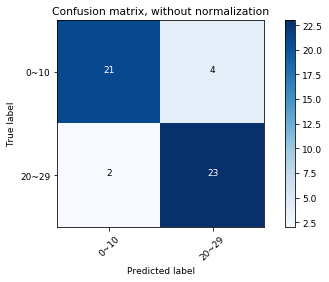

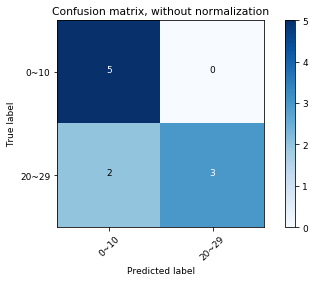

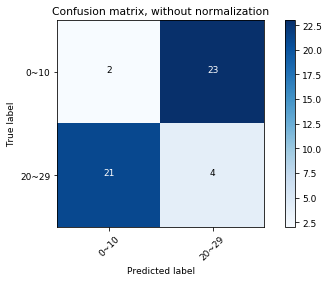

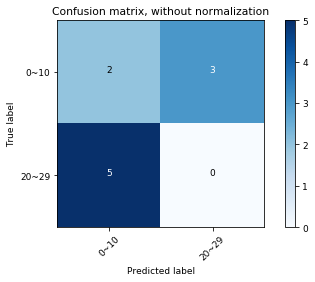

In [52]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>

# Experiment 7

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: Cadence RssL Rst Rsw
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [53]:
mapsize = [50,50]

combinations_to_be_analysed = ['RssL', 'Cadence', 'Rst', 'Rsw']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


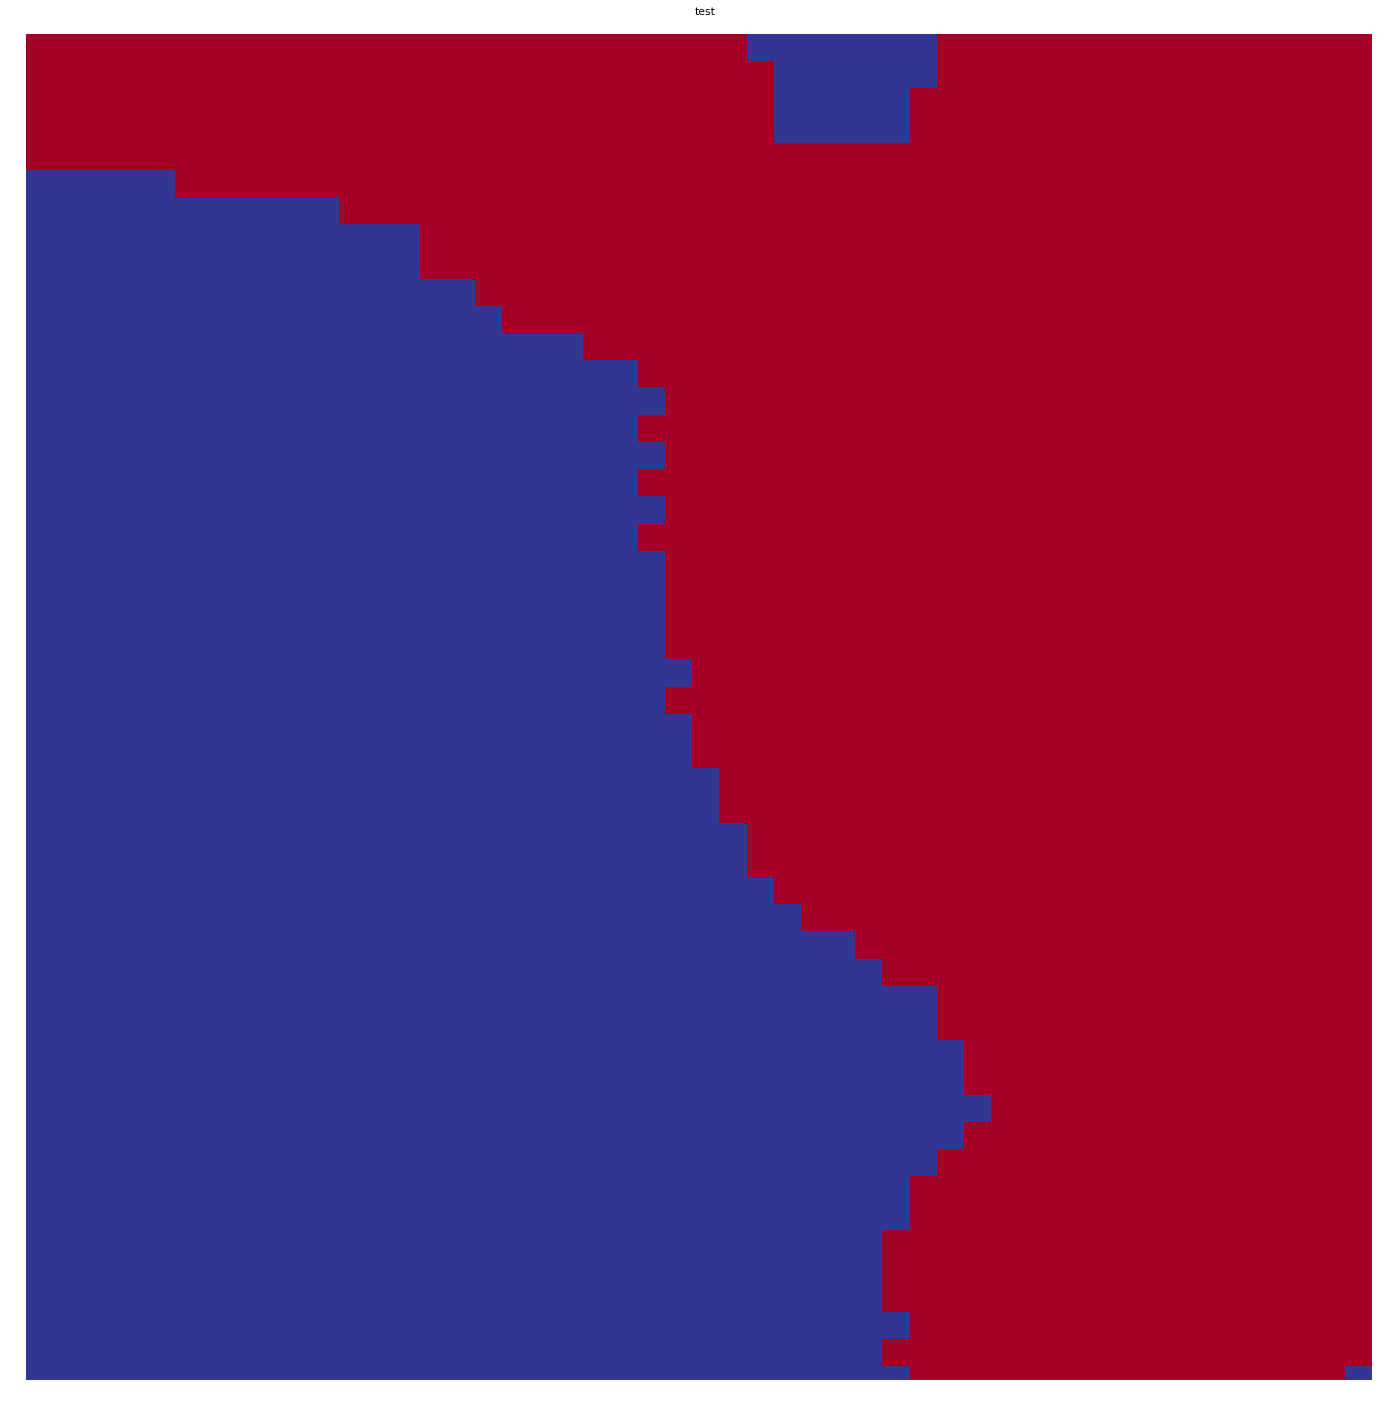

In [54]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

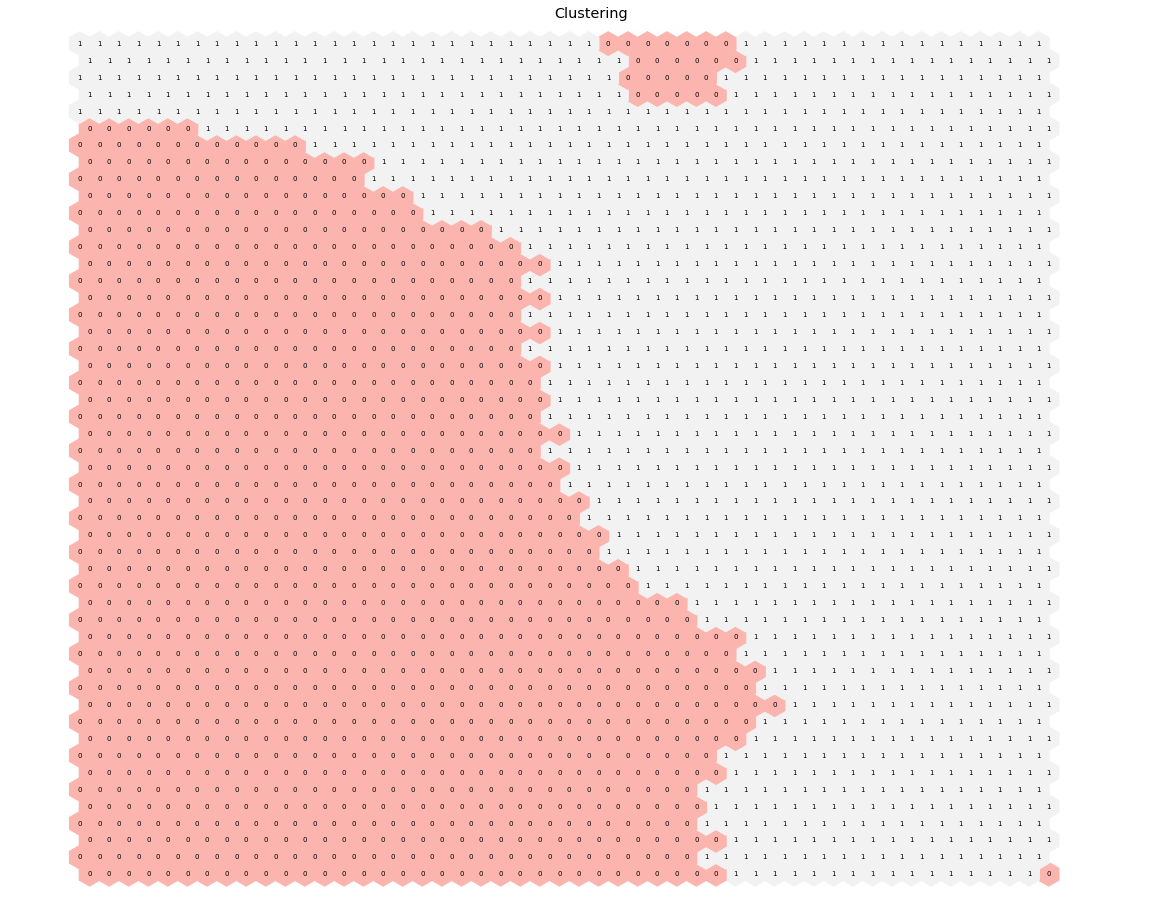

In [55]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

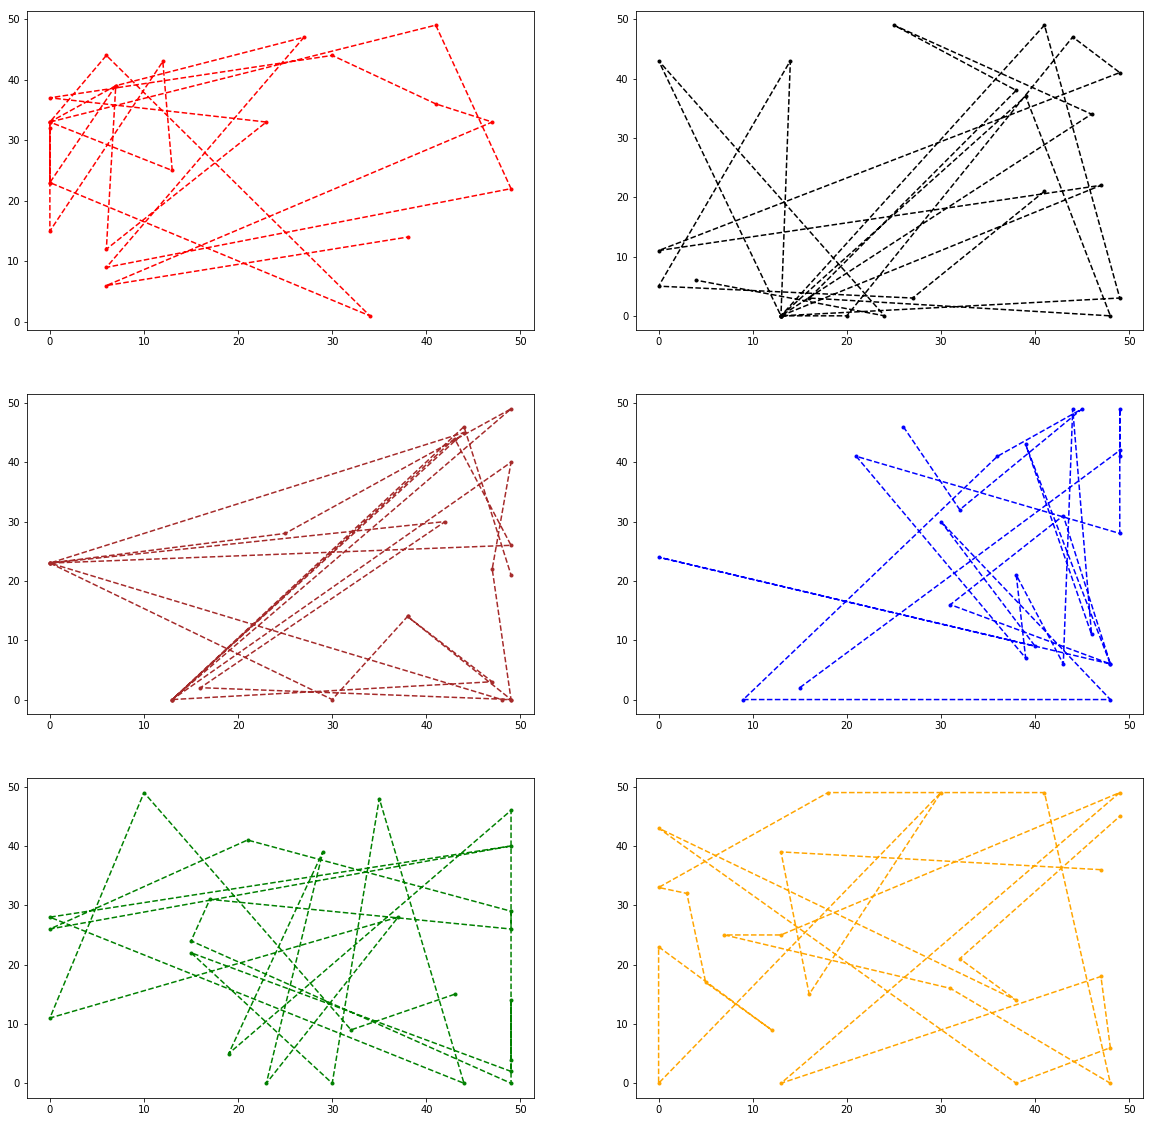

In [56]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

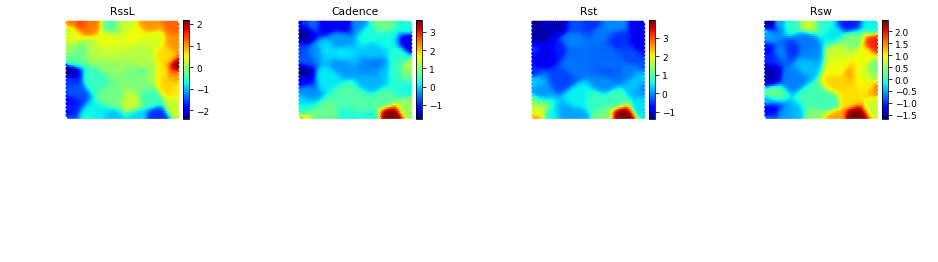

In [57]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[10 15]
 [14 11]]


true_positives total: 21
false_positives total: 29
false_negatives total: 29

Precision:  0.4198717948717949
Recal:  0.42
F1-Score:  0.41976790716286516
Accuracy:  0.42
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[1 4]
 [0 5]]


true_positives total: 6
false_positives total: 4
false_negatives total: 4

Precision:  0.7777777777777778
Recal:  0.6
F1-Score:  0.523809523809524
Accuracy:  0.6
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[14 11]
 [10 15]]


true_positives total: 29
false_positives total: 21
false_negatives total: 21

Precision:  0.5801282051282051
Recal:  0.58
F1-Score:  0.5798319327731093
Accuracy:  0.58
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[0 5]
 [1 4]]


true_positives total: 4
false_positiv

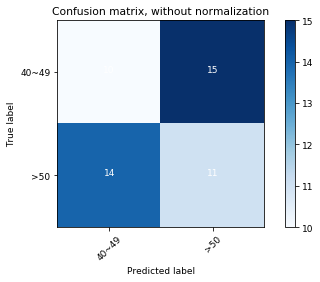

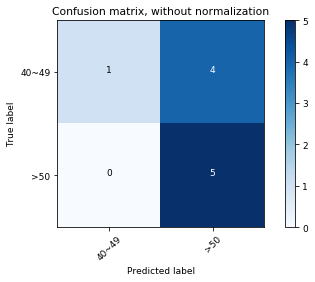

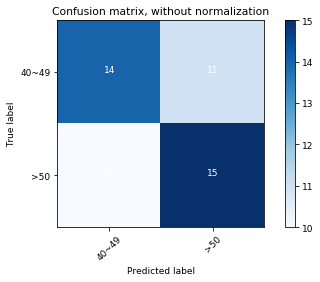

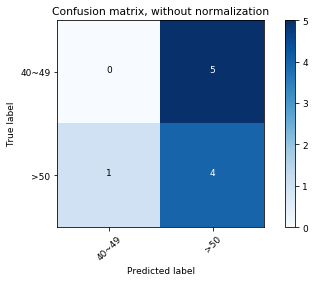

In [58]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 8

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ['RssL', 'Cadence', 'Rst', 'Rsw']
   - Group 1: 0~10
   - Group 2: 20~29

In [59]:
mapsize = [50,50]

combinations_to_be_analysed = ['RssL', 'Cadence', 'Rst', 'Rsw']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


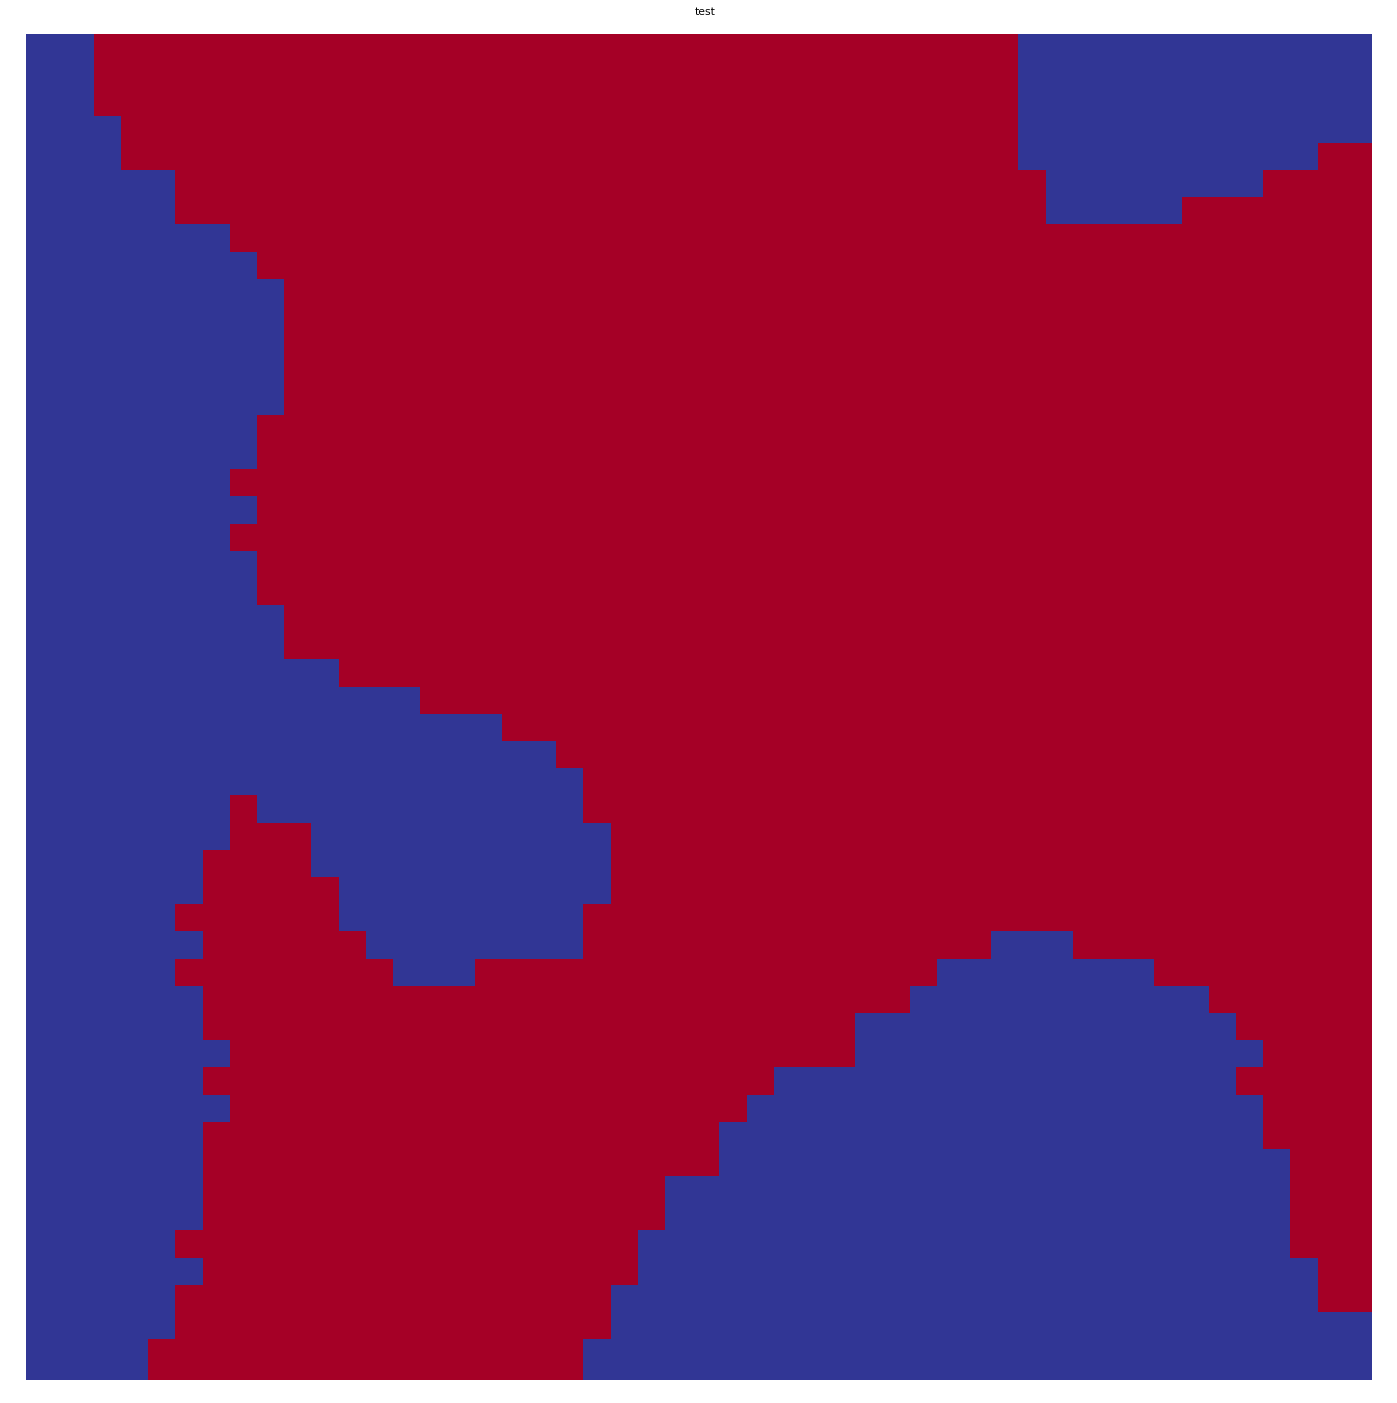

In [60]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

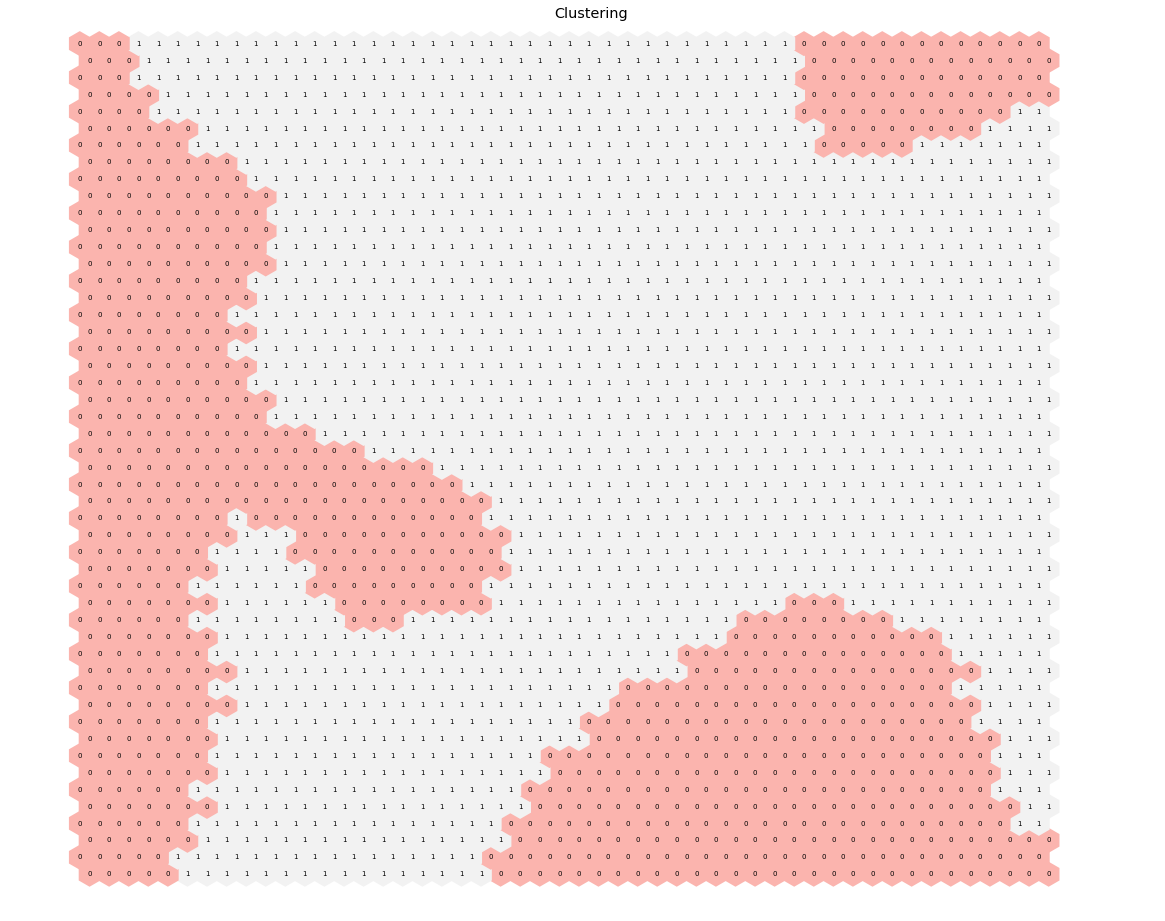

In [61]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

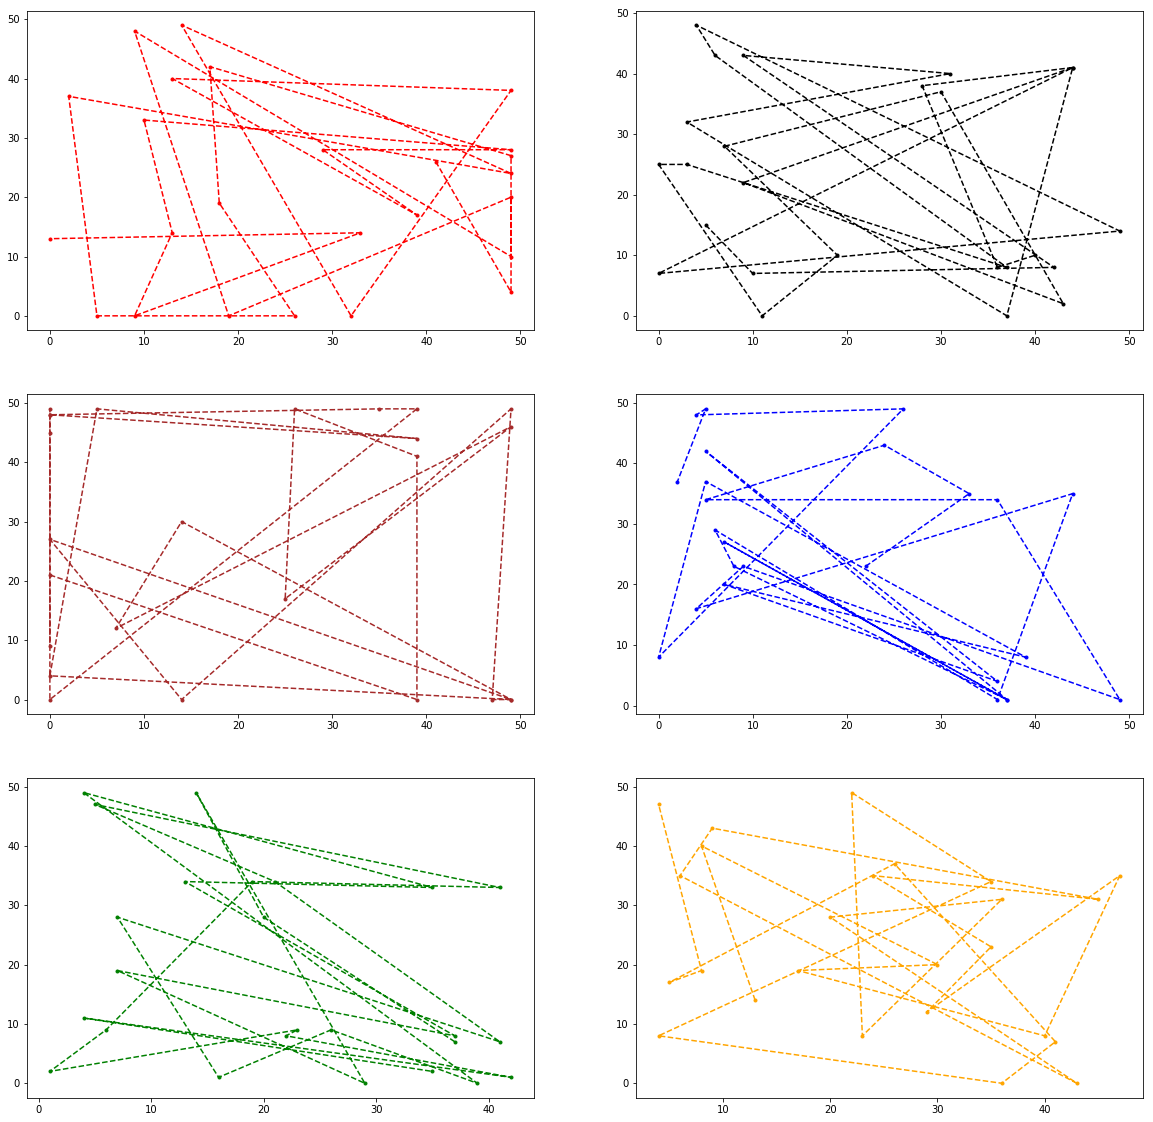

In [62]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

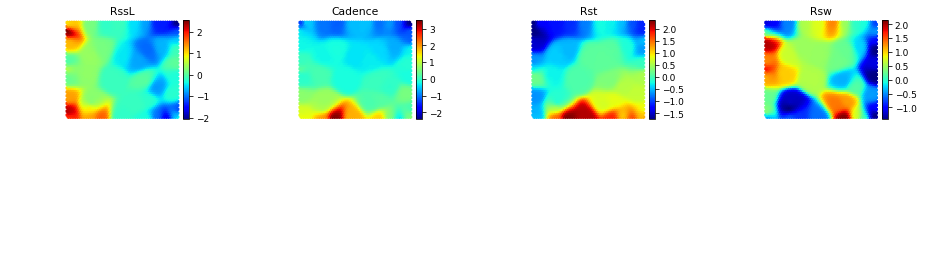

In [63]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[21  4]
 [ 2 23]]


true_positives total: 44
false_positives total: 6
false_negatives total: 6

Precision:  0.8824476650563606
Recal:  0.88
F1-Score:  0.8798076923076923
Accuracy:  0.88
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [2 3]]


true_positives total: 8
false_positives total: 2
false_negatives total: 2

Precision:  0.8571428571428572
Recal:  0.8
F1-Score:  0.7916666666666666
Accuracy:  0.8
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 2 23]
 [21  4]]


true_positives total: 6
false_positives total: 44
false_negatives total: 44

Precision:  0.11755233494363929
Recal:  0.12
F1-Score:  0.11858974358974357
Accuracy:  0.12
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [5 0]]


true_positives total: 2
false_positive

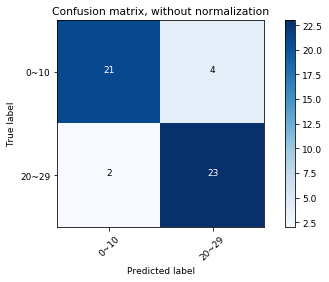

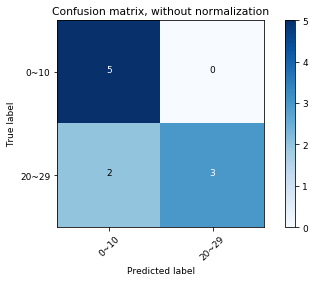

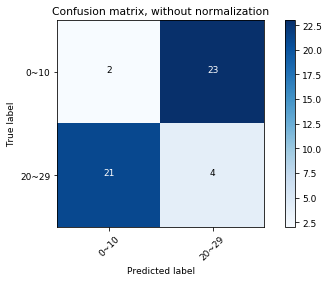

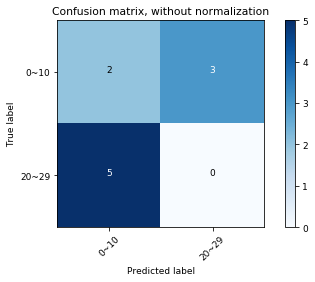

In [64]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>

# Experiment 9

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ACT[s] RssL RssR Rst
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [65]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'RssL', 'RssR', 'Rst']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


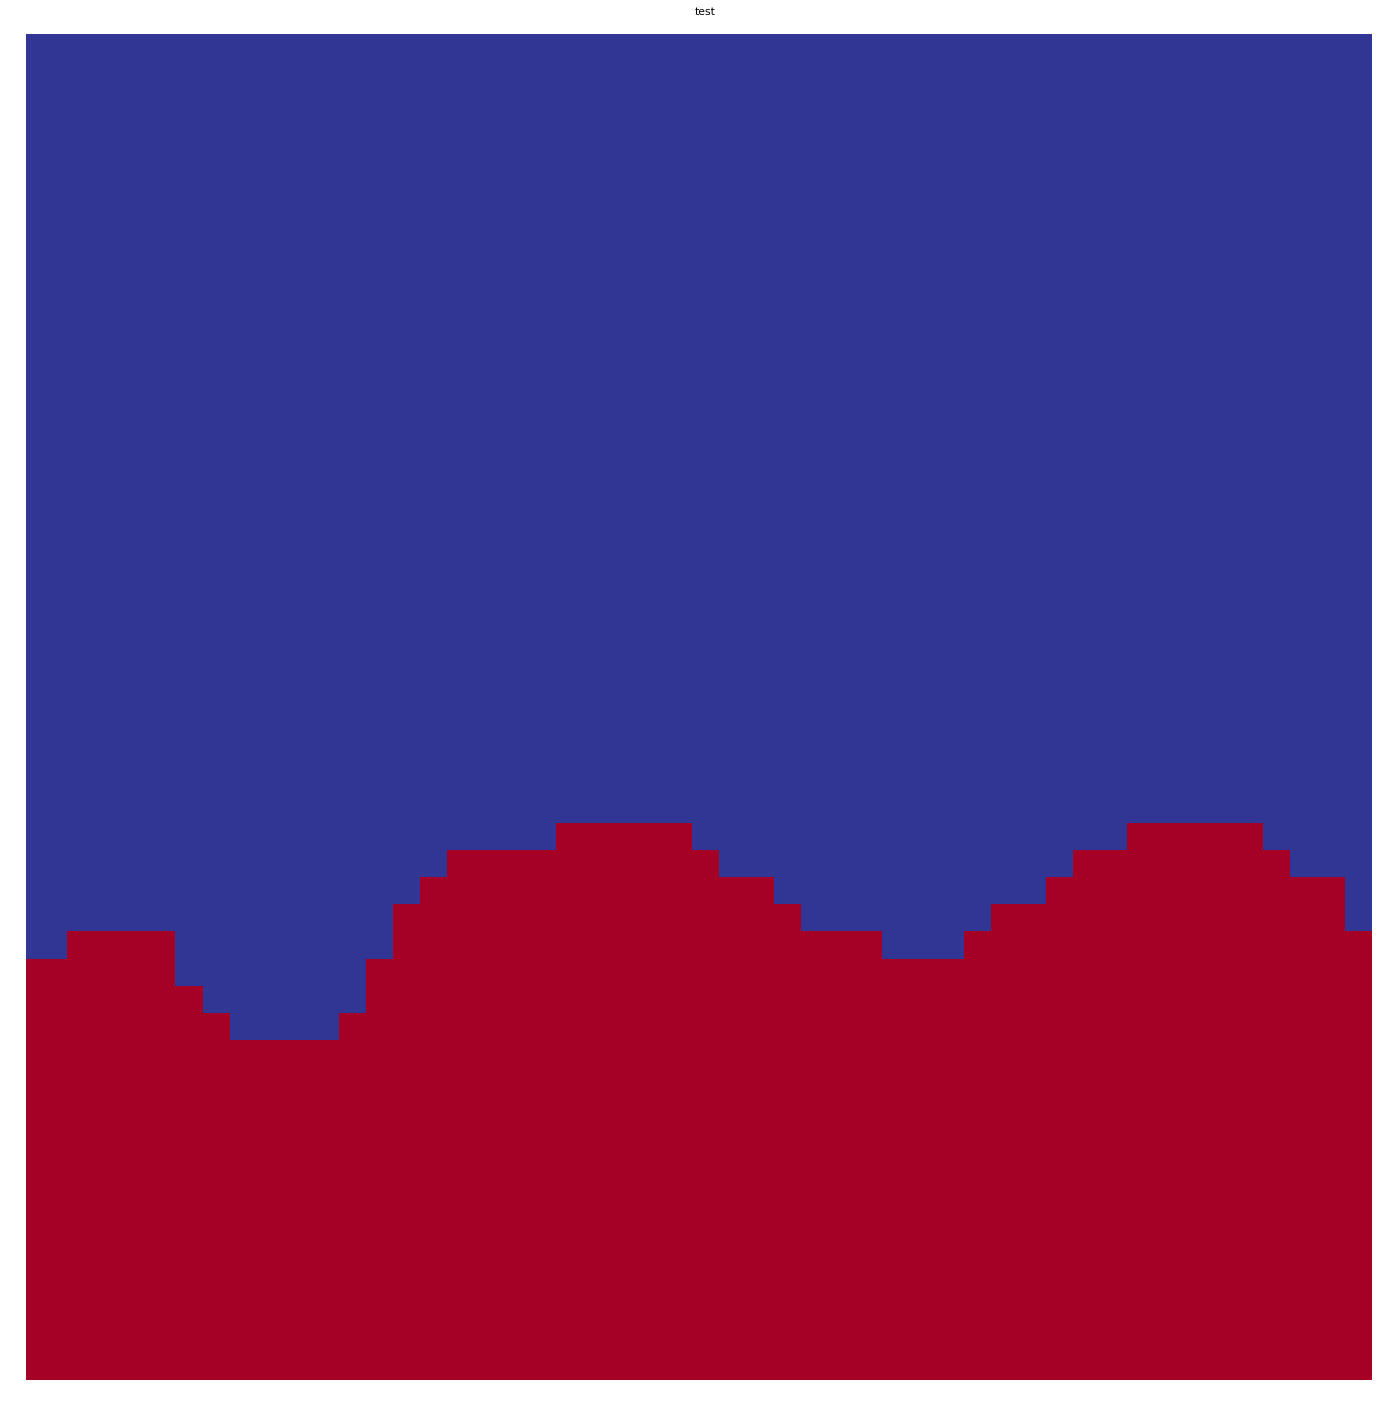

In [66]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

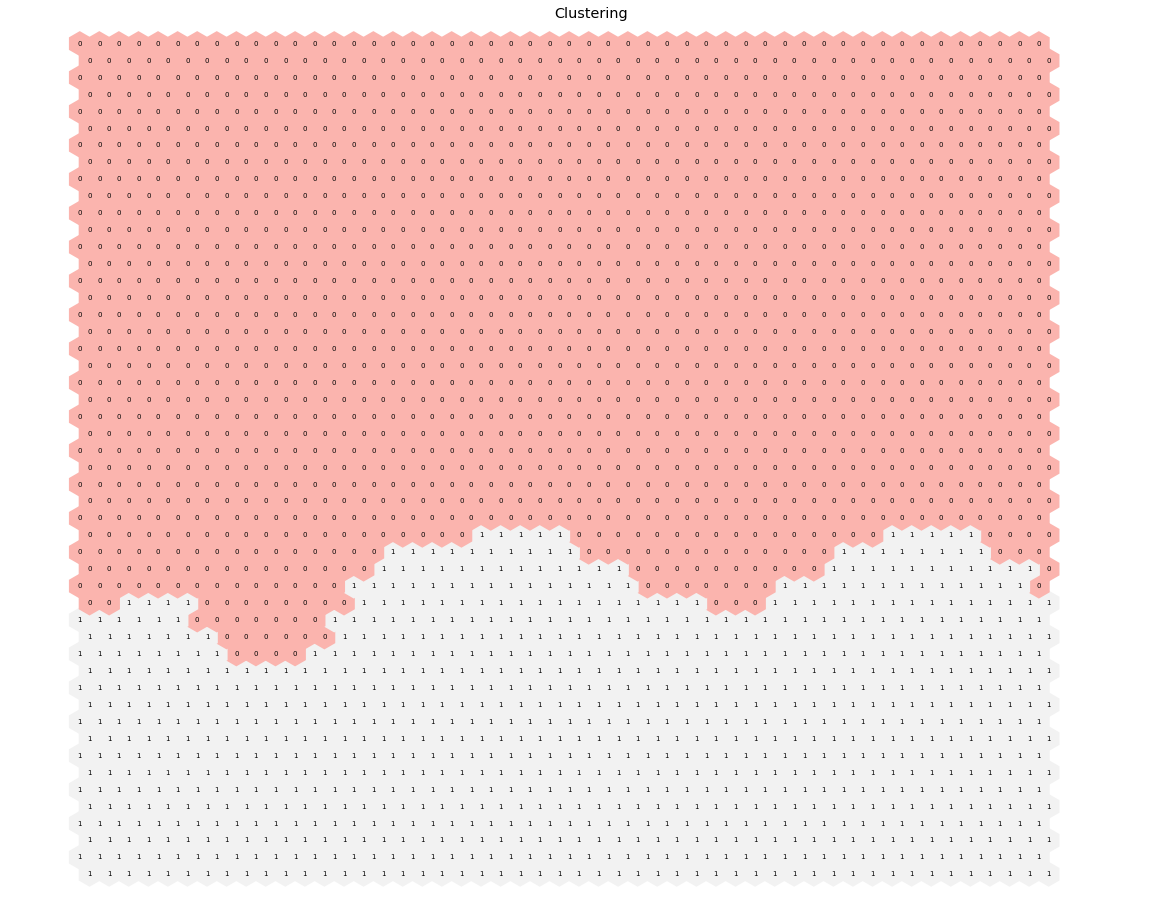

In [67]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

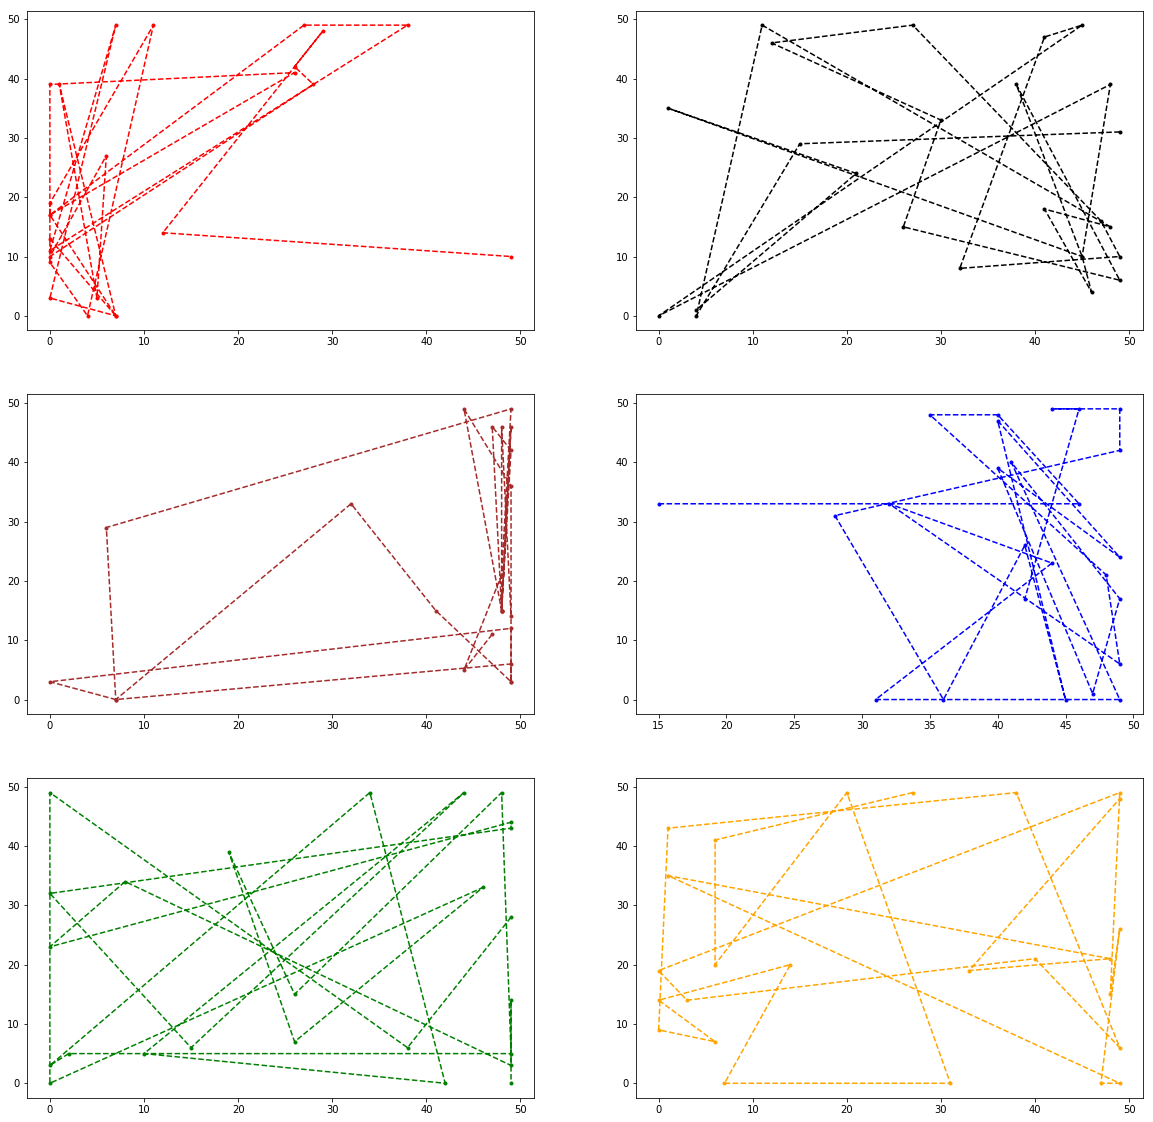

In [68]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

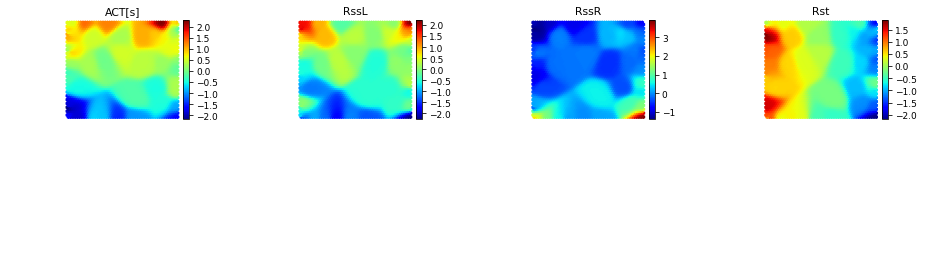

In [69]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[17  8]
 [17  8]]


true_positives total: 25
false_positives total: 25
false_negatives total: 25

Precision:  0.5
Recal:  0.5
F1-Score:  0.4832575444398512
Accuracy:  0.5
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [2 3]]


true_positives total: 7
false_positives total: 3
false_negatives total: 3

Precision:  0.7083333333333333
Recal:  0.7
F1-Score:  0.6969696969696969
Accuracy:  0.7
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[17  8]
 [17  8]]


true_positives total: 25
false_positives total: 25
false_negatives total: 25

Precision:  0.5
Recal:  0.5
F1-Score:  0.4832575444398512
Accuracy:  0.5
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [4 1]]


true_positives total: 3
false_positives total: 7
false_negatives total:

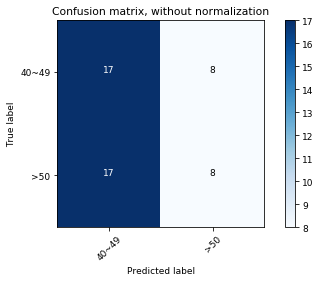

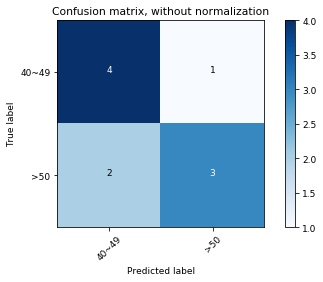

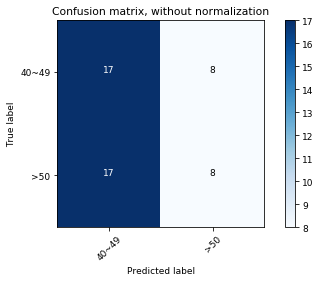

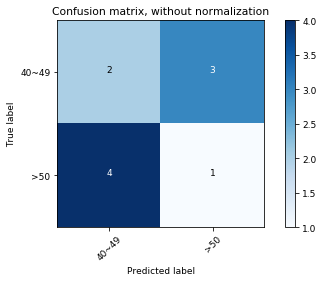

In [70]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 10

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ['ACT[s]', 'RssL', 'RssR', 'Rst']
   - Group 1: 0~10
   - Group 2: 20~29

In [71]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'RssL', 'RssR', 'Rst']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


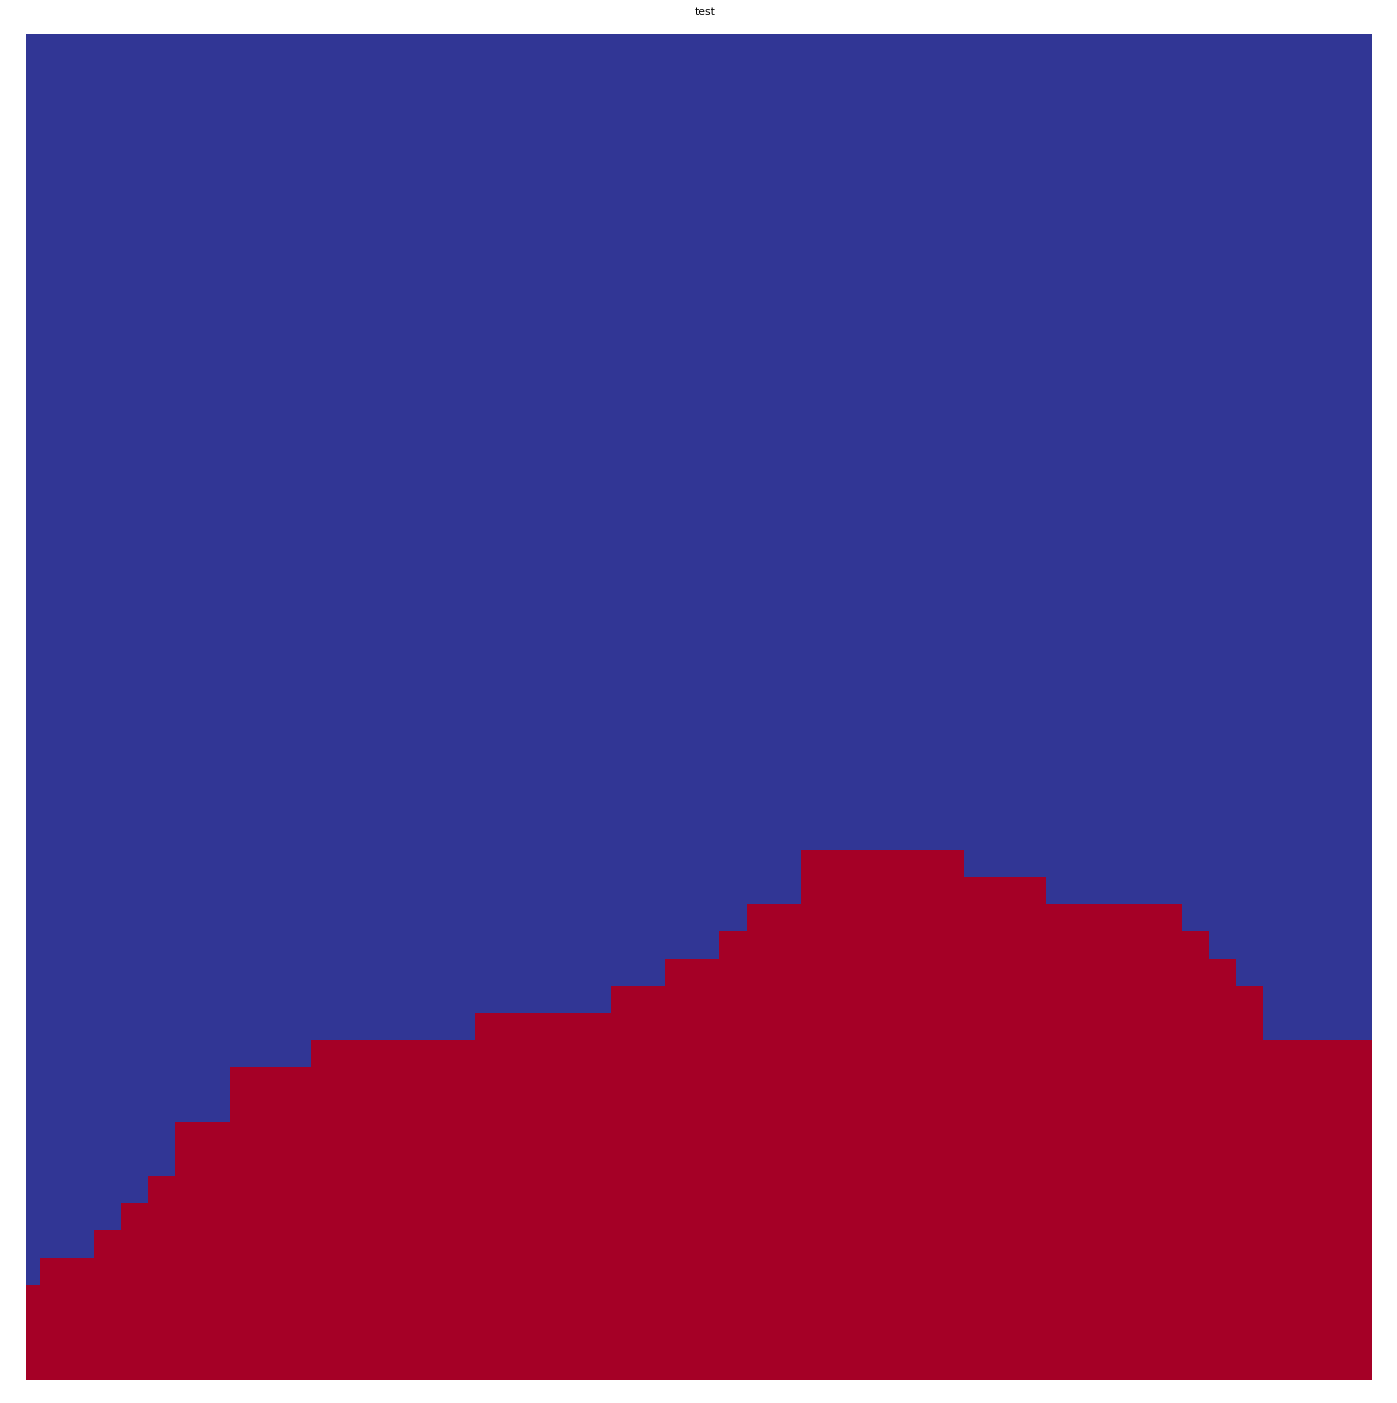

In [72]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

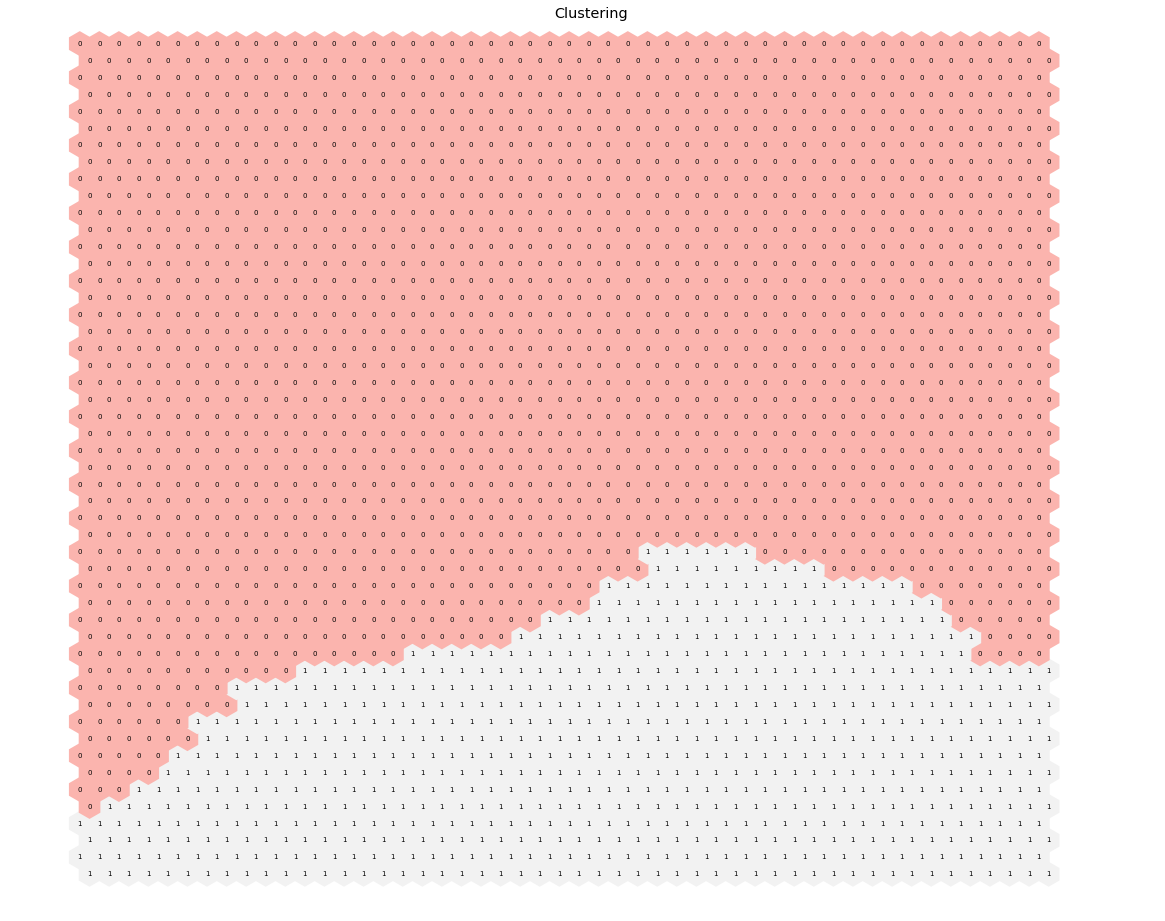

In [73]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

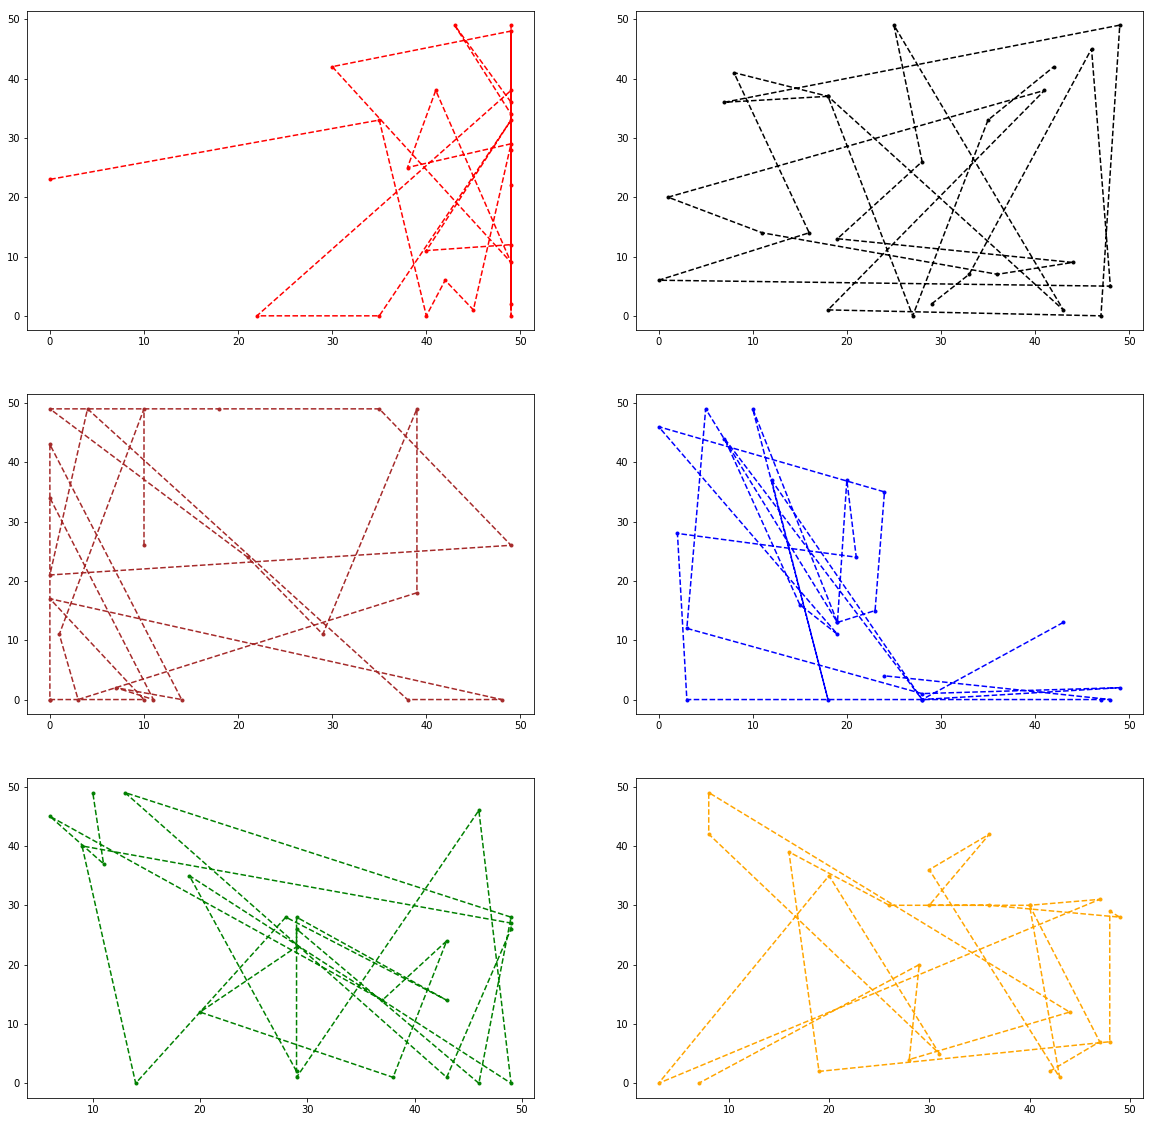

In [74]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

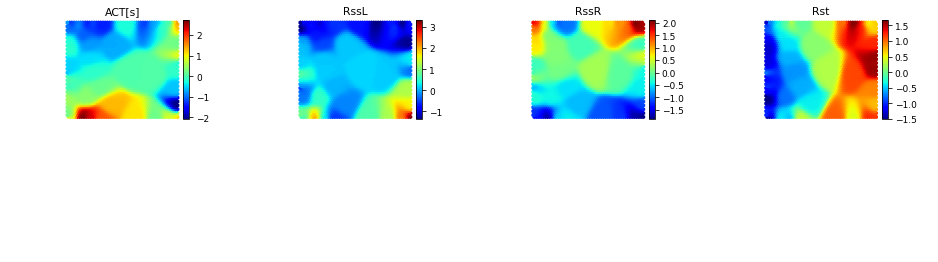

In [75]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[19  6]
 [17  8]]


true_positives total: 27
false_positives total: 23
false_negatives total: 23

Precision:  0.5496031746031746
Recal:  0.54
F1-Score:  0.5166036149642708
Accuracy:  0.54
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [4 1]]


true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.5
Recal:  0.5
F1-Score:  0.45054945054945056
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[17  8]
 [19  6]]


true_positives total: 23
false_positives total: 27
false_negatives total: 27

Precision:  0.45039682539682535
Recal:  0.46
F1-Score:  0.43253467843631777
Accuracy:  0.46
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [4 1]]


true_positives total: 5
false_positives total: 5


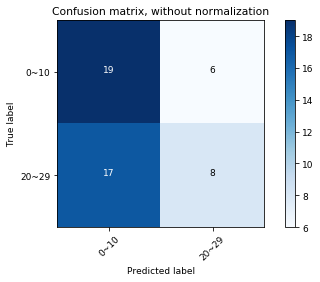

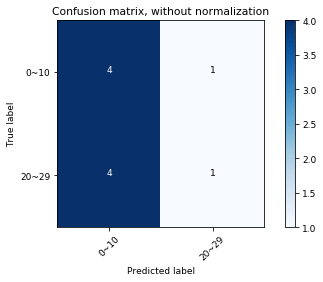

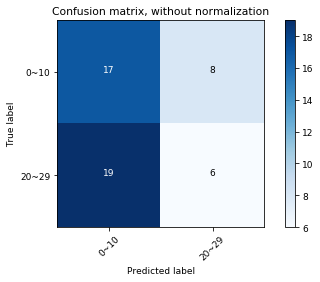

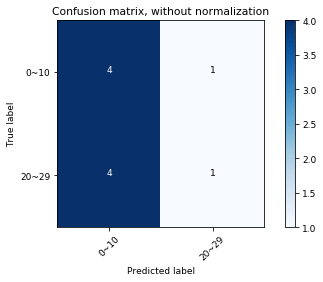

In [76]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>

# Experiment 11

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: Cadence Rs RssL Rst
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [77]:
mapsize = [50,50]

combinations_to_be_analysed = ['Cadence', 'Rs', 'RssL', 'Rst']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


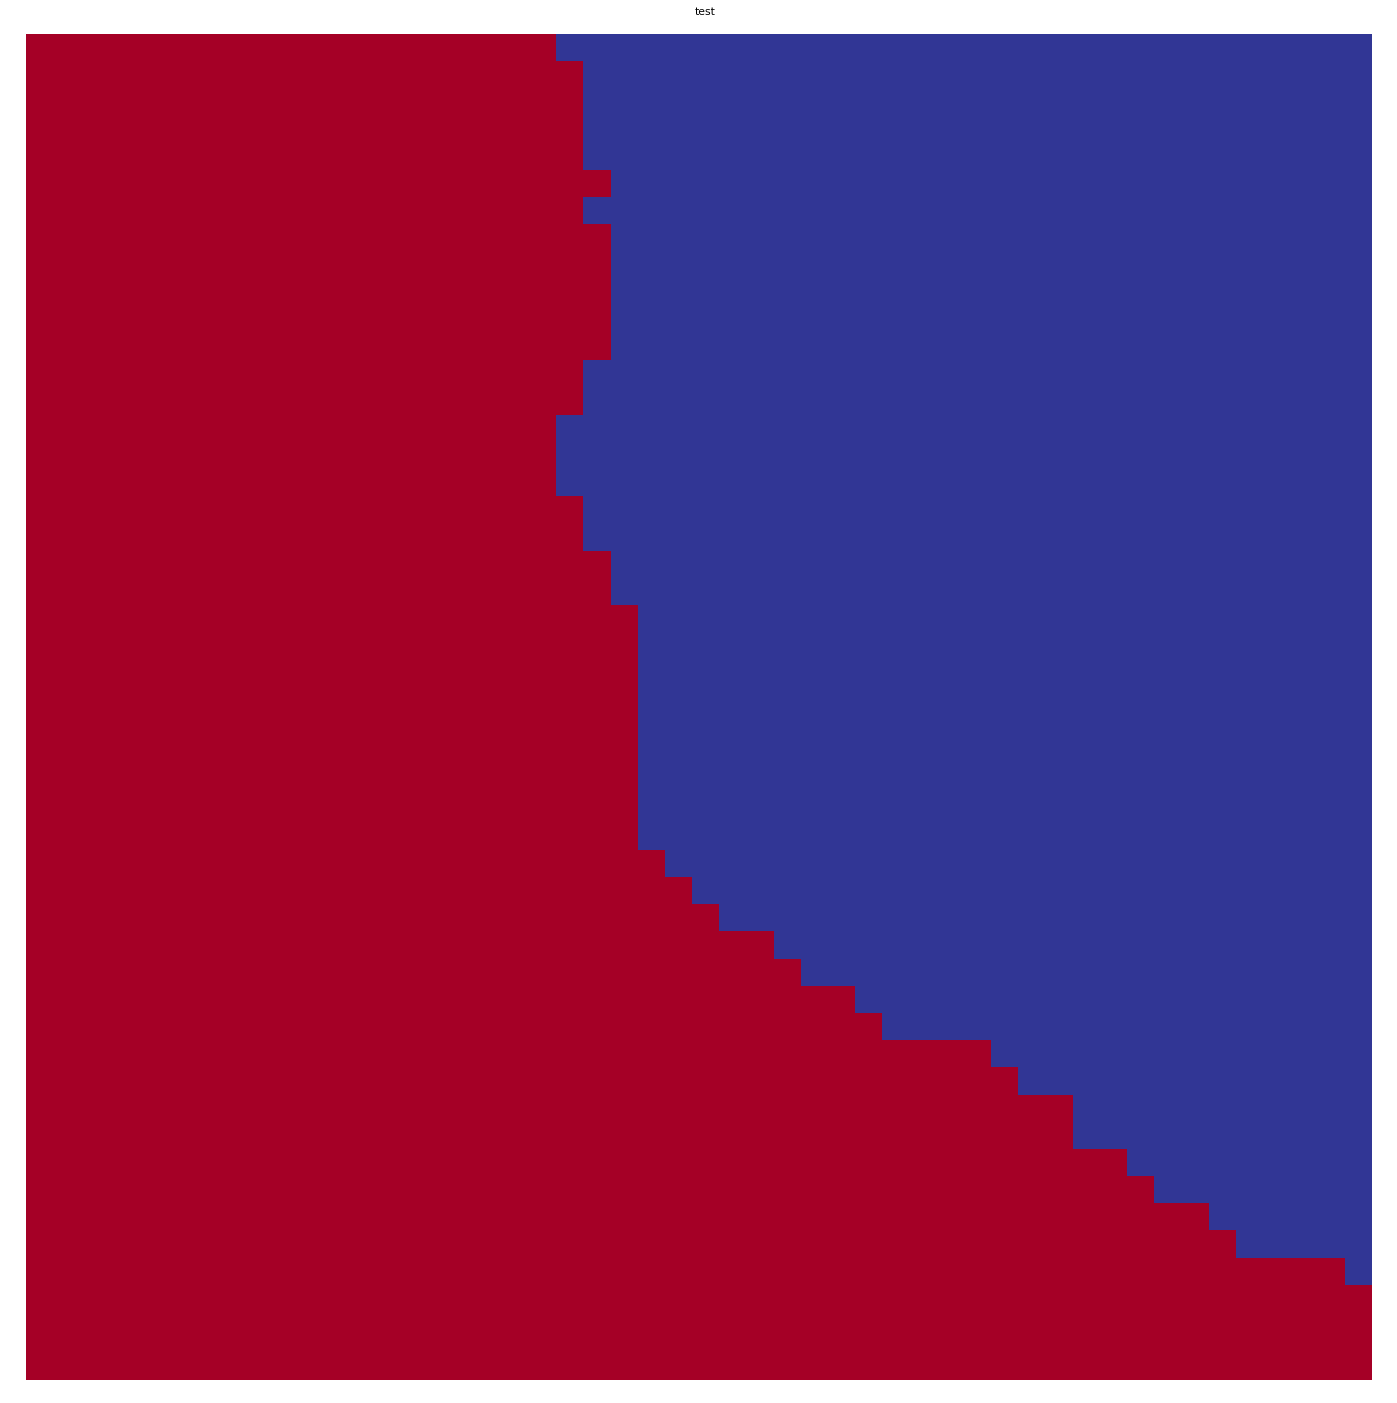

In [78]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

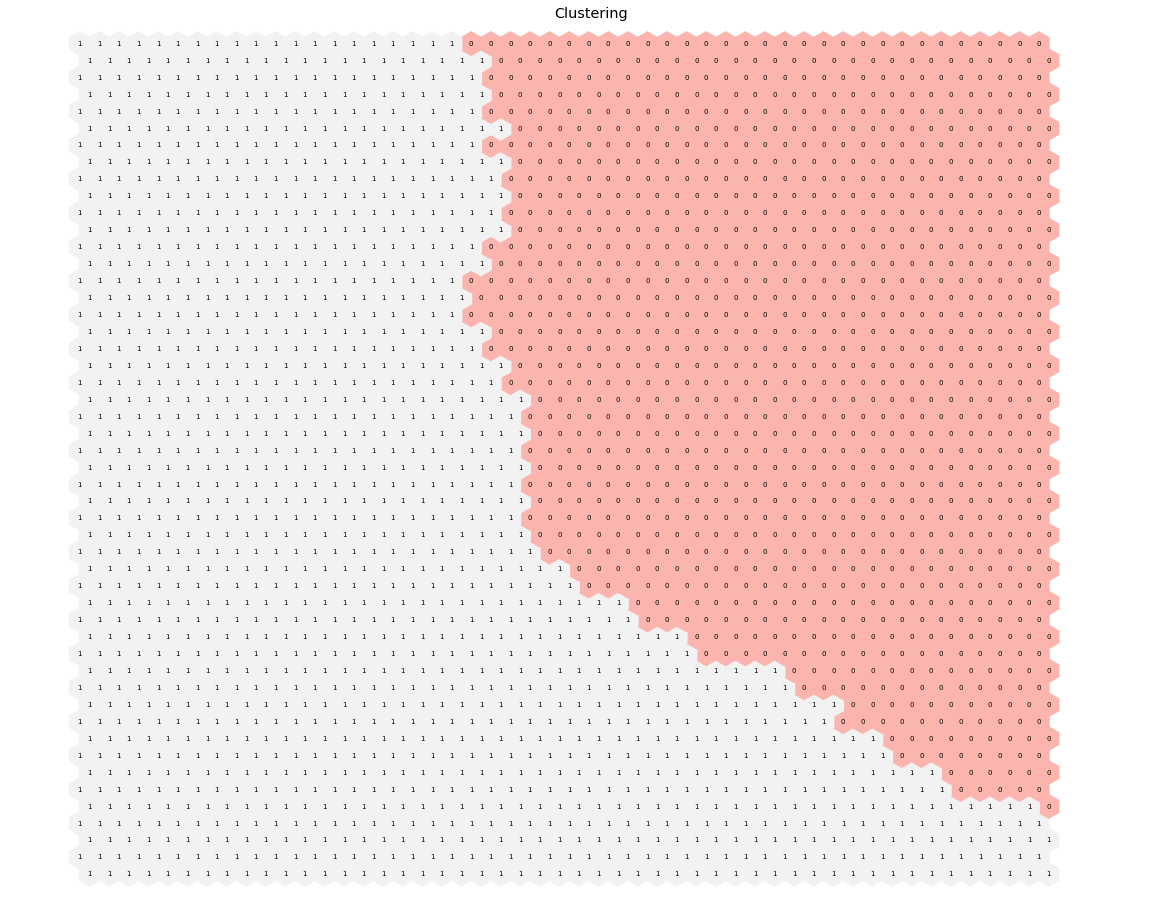

In [79]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

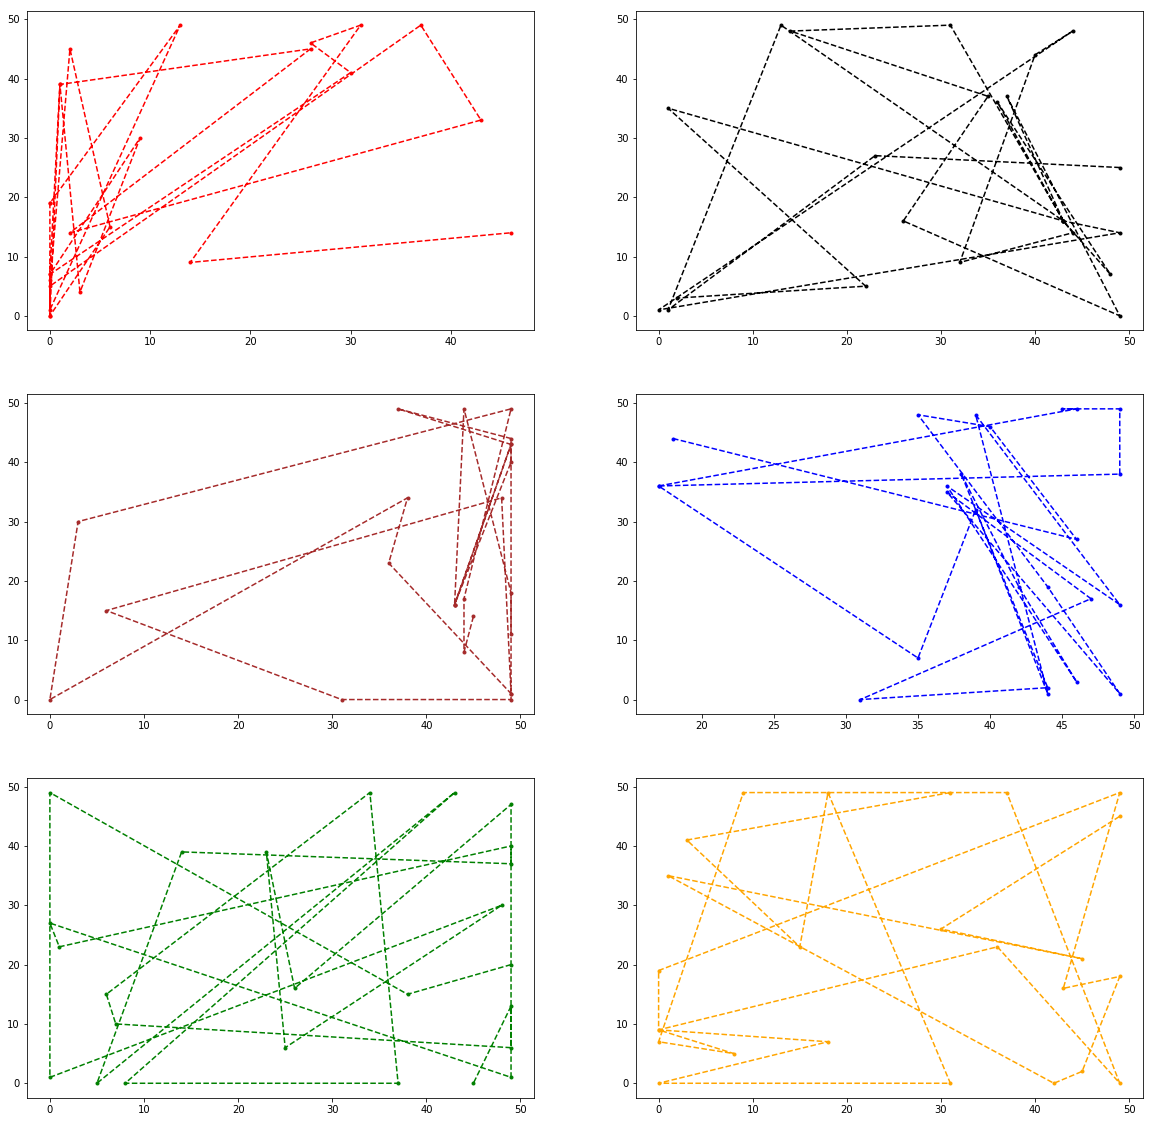

In [80]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

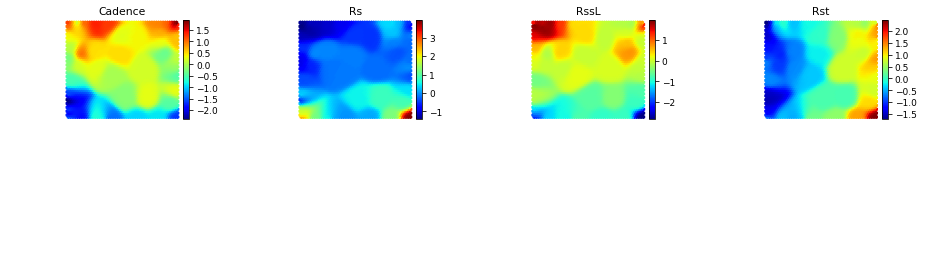

In [81]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[12 13]
 [11 14]]


true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5201288244766505
Recal:  0.52
F1-Score:  0.5192307692307692
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [4 1]]


true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.5
Recal:  0.5
F1-Score:  0.45054945054945056
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[11 14]
 [12 13]]


true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.47987117552334946
Recal:  0.48
F1-Score:  0.47916666666666663
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[4 1]
 [4 1]]


true_positives total: 5
false_positives total: 5


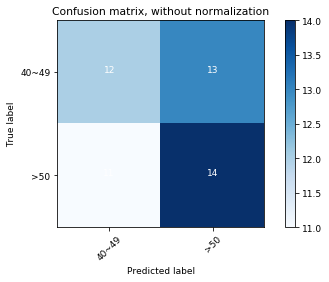

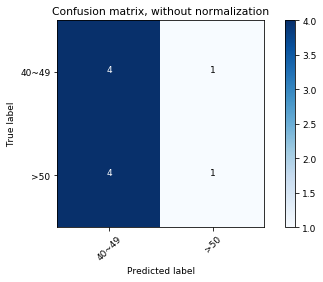

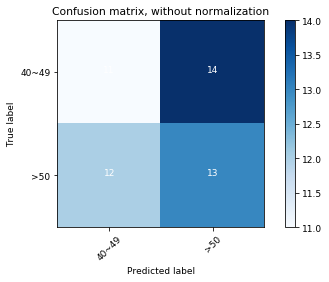

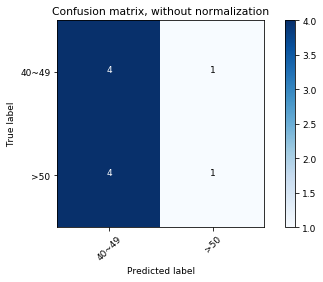

In [82]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 12

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: Cadence Rs RssL Rst
   - Group 1: 0~10
   - Group 2: 20~29

In [83]:
mapsize = [50,50]

combinations_to_be_analysed = ['Cadence', 'Rs', 'RssL', 'Rst']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


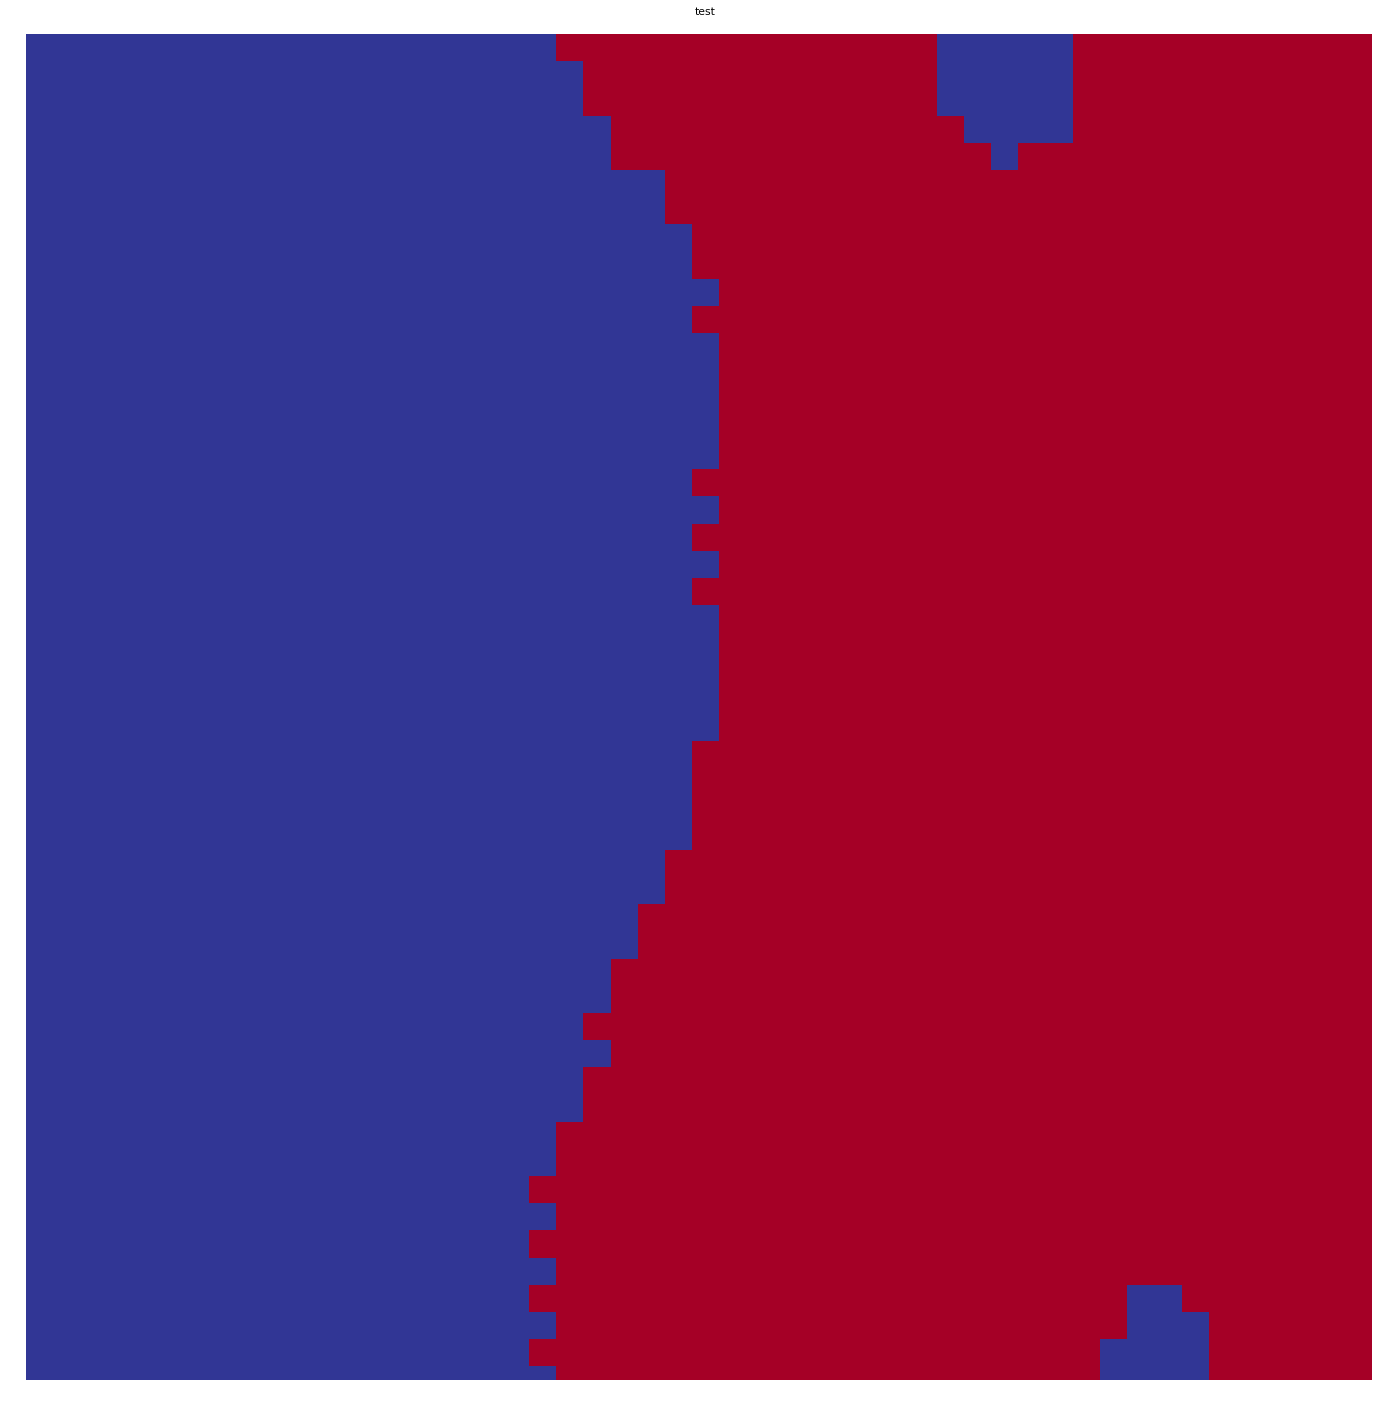

In [84]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

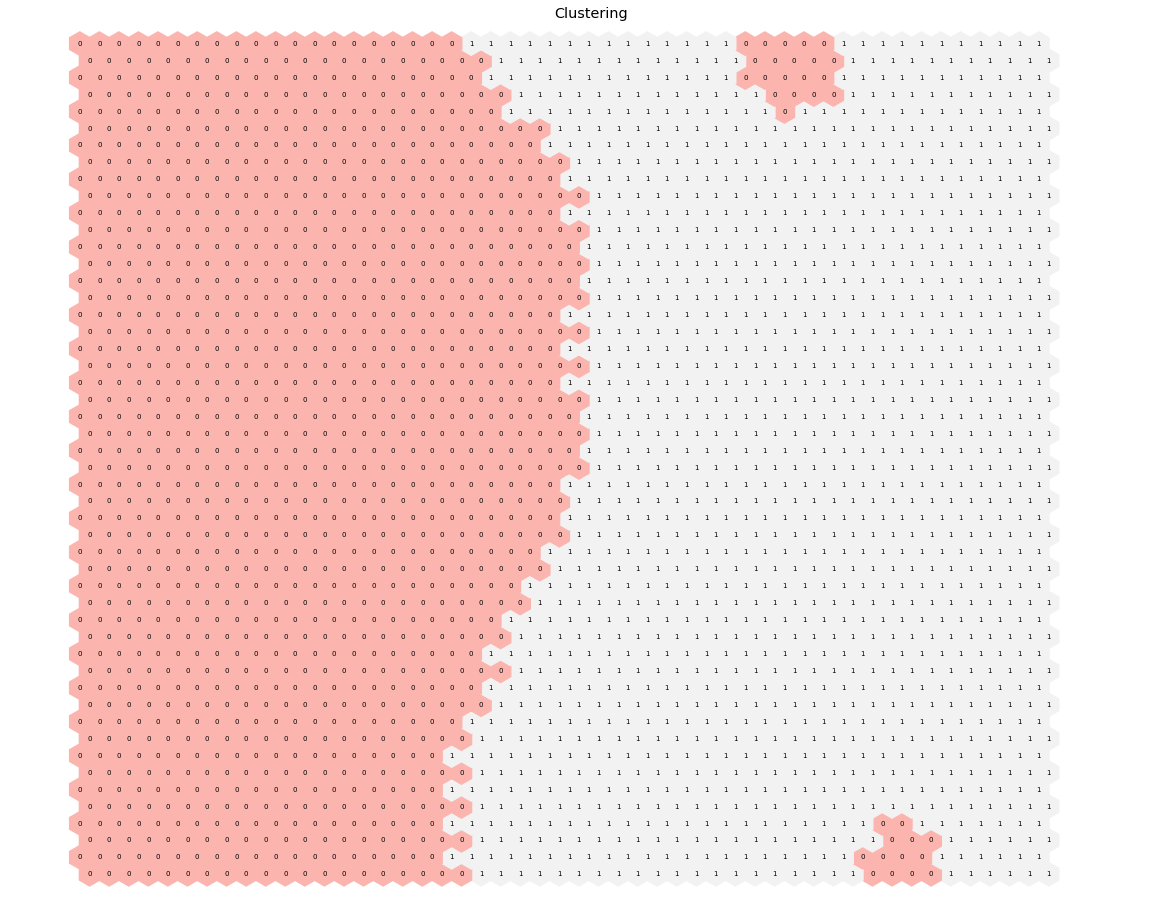

In [85]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

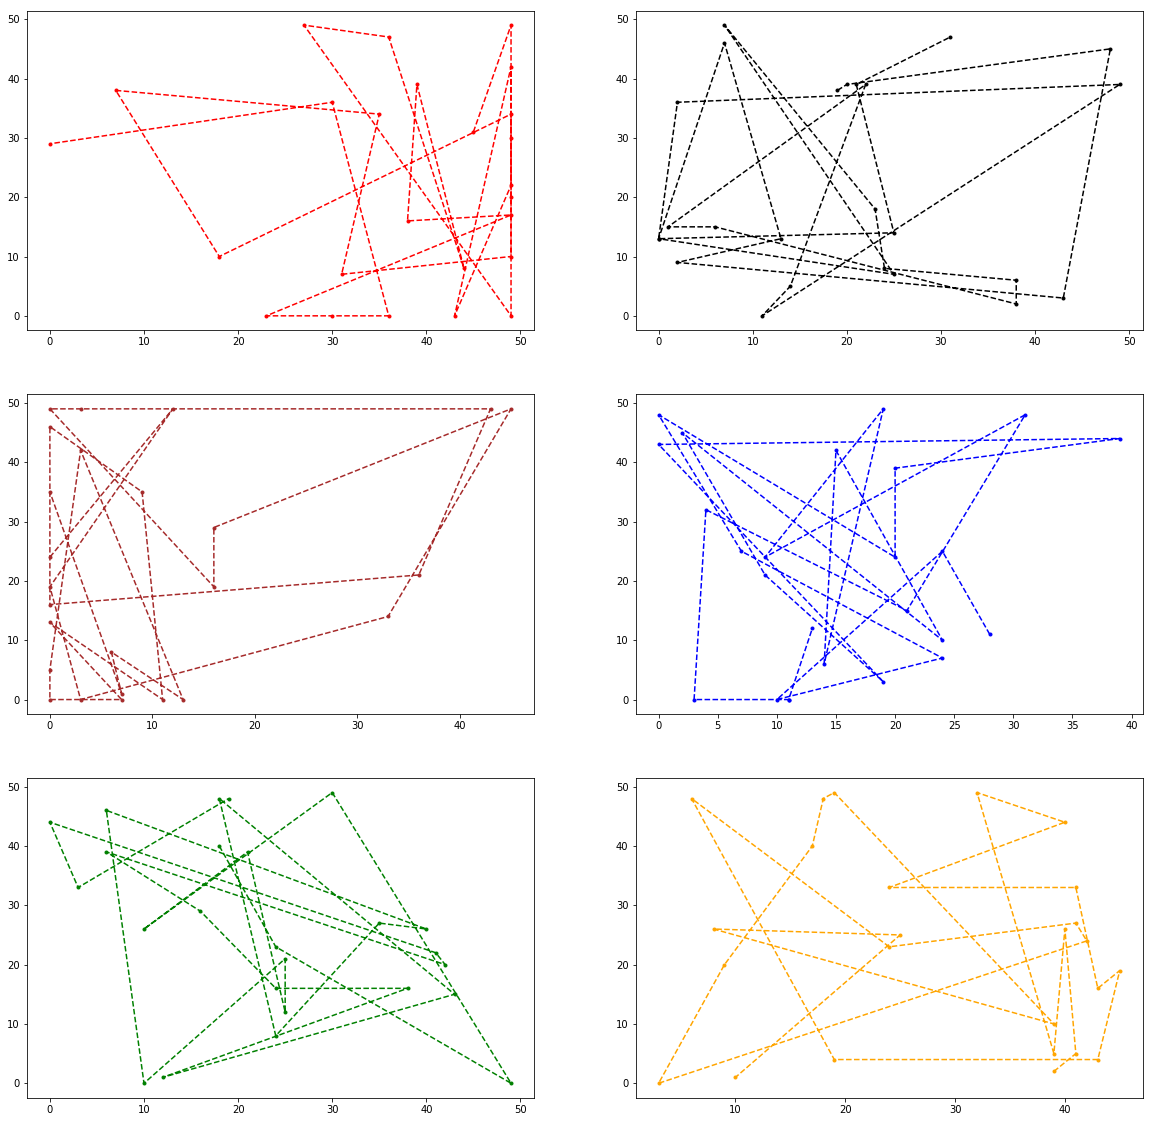

In [86]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

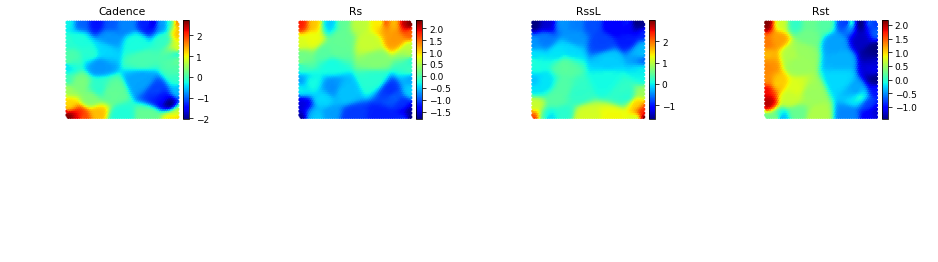

In [87]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[22  3]
 [ 4 21]]


true_positives total: 43
false_positives total: 7
false_negatives total: 7

Precision:  0.8605769230769231
Recal:  0.86
F1-Score:  0.8599439775910364
Accuracy:  0.86
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[5 0]
 [2 3]]


true_positives total: 8
false_positives total: 2
false_negatives total: 2

Precision:  0.8571428571428572
Recal:  0.8
F1-Score:  0.7916666666666666
Accuracy:  0.8
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[ 4 21]
 [22  3]]


true_positives total: 7
false_positives total: 43
false_negatives total: 43

Precision:  0.13942307692307693
Recal:  0.14
F1-Score:  0.13965586234493796
Accuracy:  0.14
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [5 0]]


true_positives total: 2
false_positive

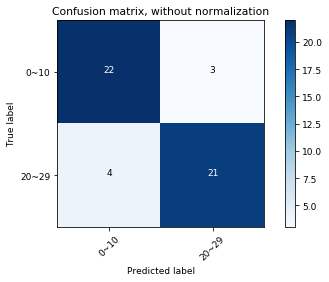

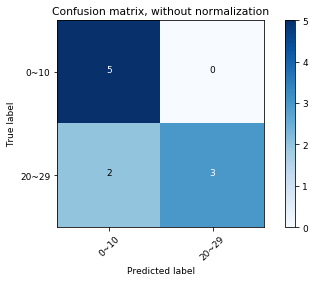

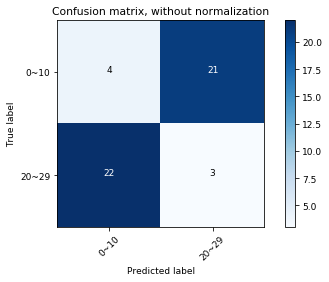

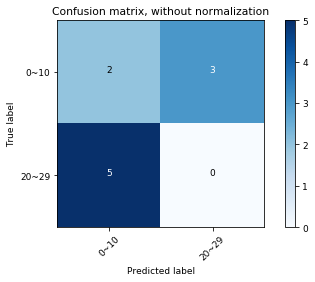

In [88]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>

# Experiment 13

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ACT[s] Rs RssL Rst
- Only 2 groups to classify
   - Group 1: 40~49
   - Group 2: >50

In [89]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'Rs', 'RssL', 'Rst']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]


group_5_and_6 = np.concatenate((group_40_49, group_over_50))
group_5_and_6_test = np.concatenate((group_40_49_test, group_over_50_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


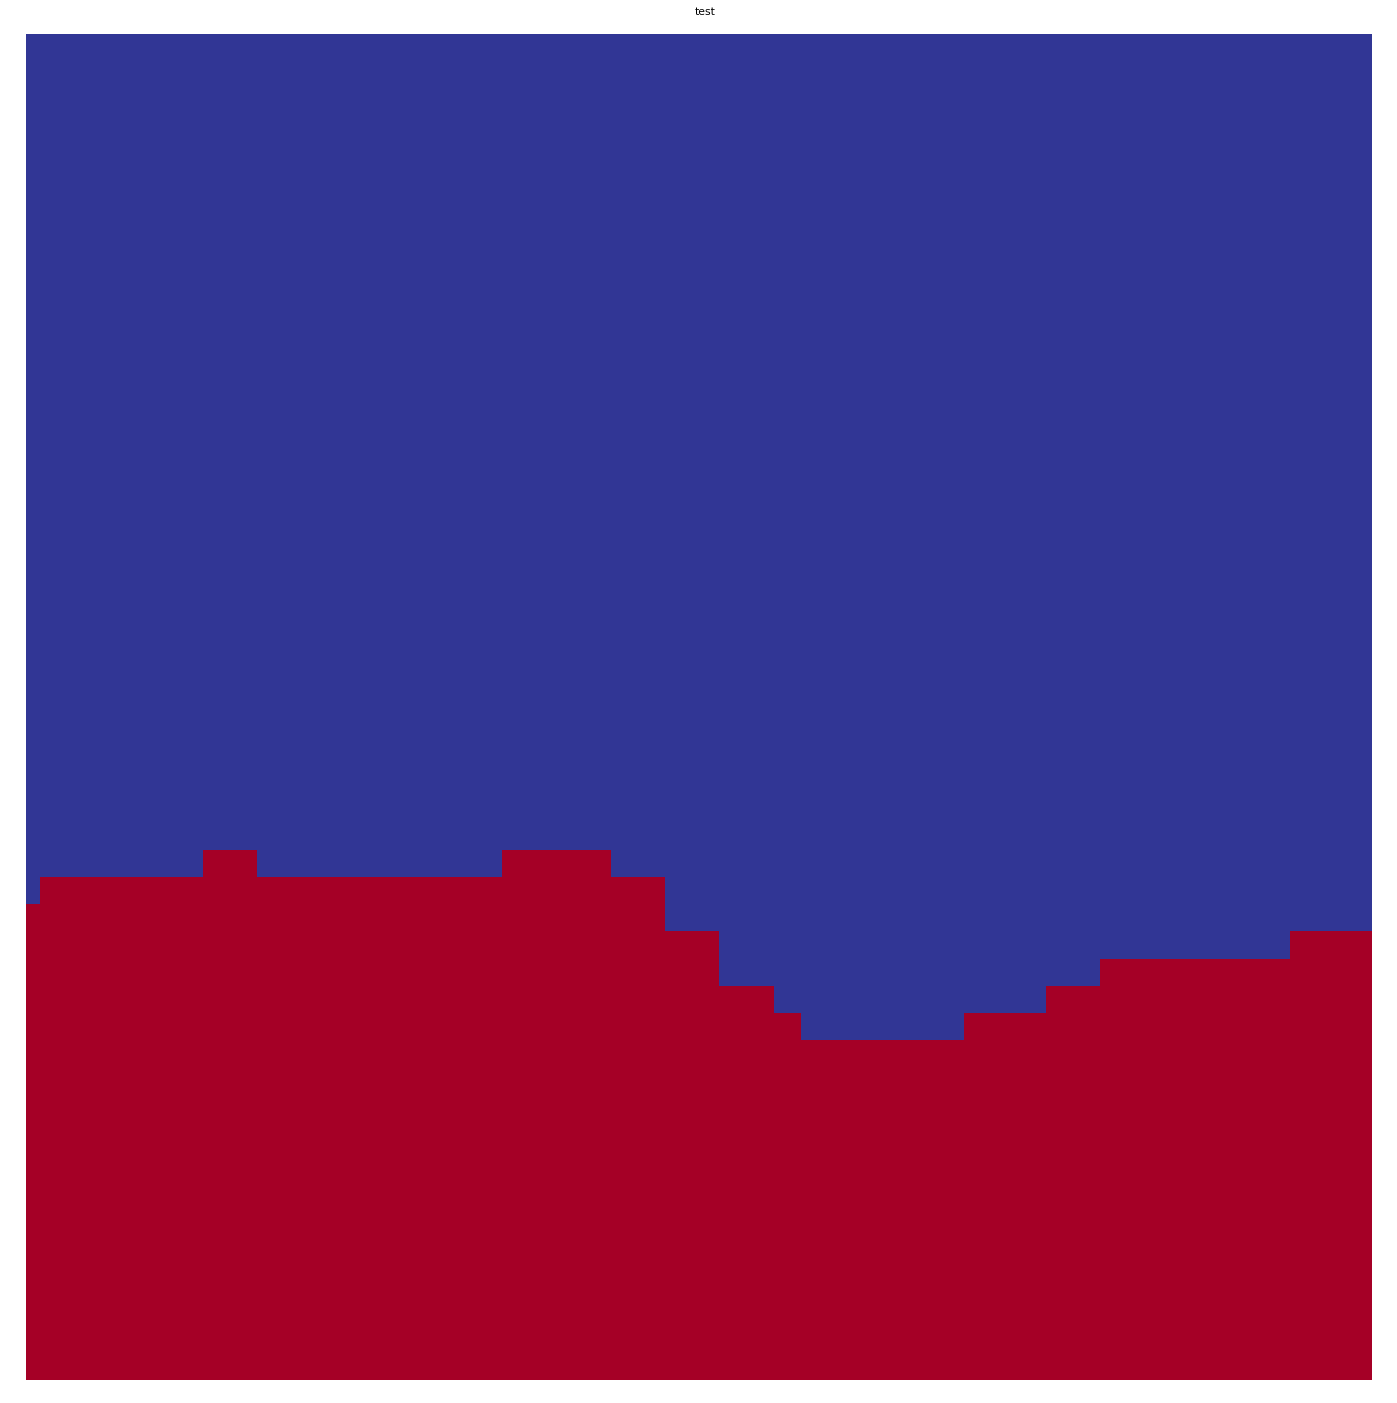

In [90]:
som = sompy.SOMFactory.build(
    group_5_and_6, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

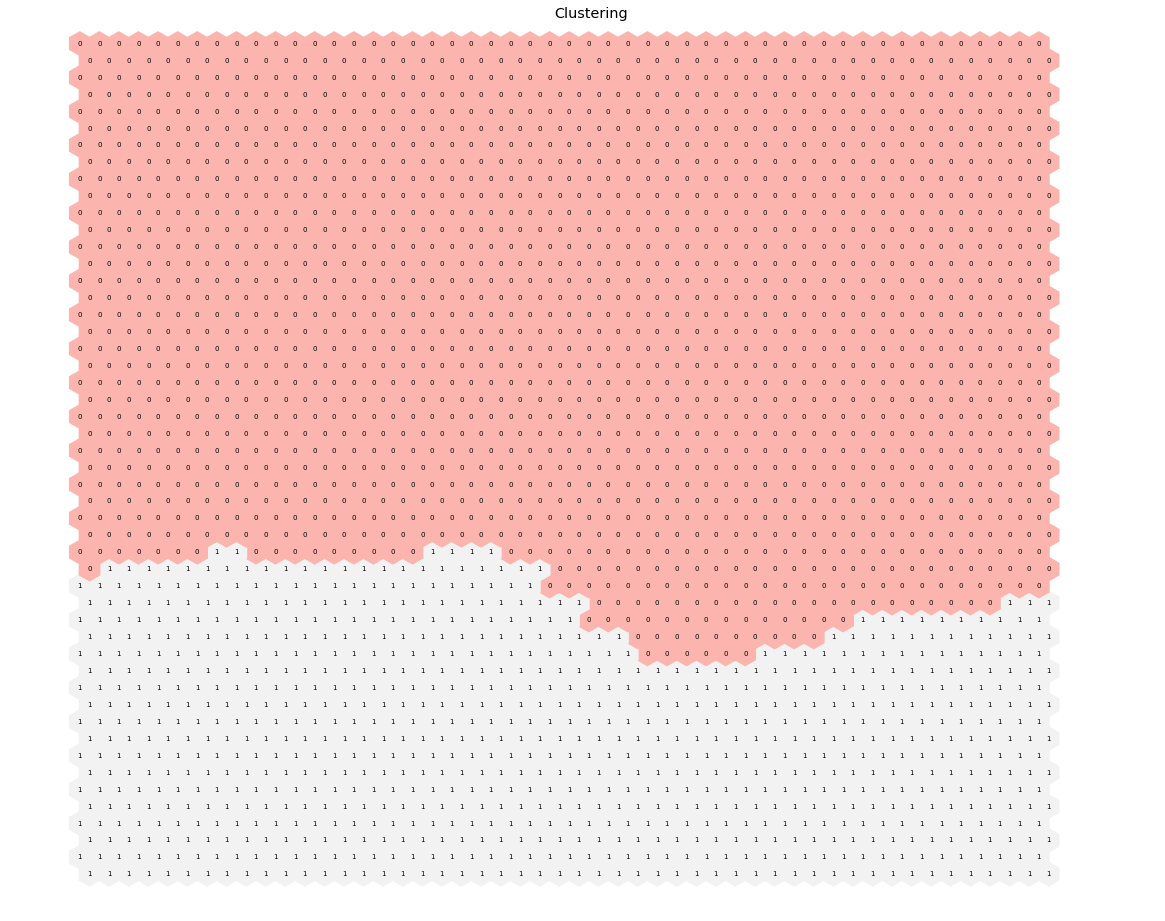

In [91]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

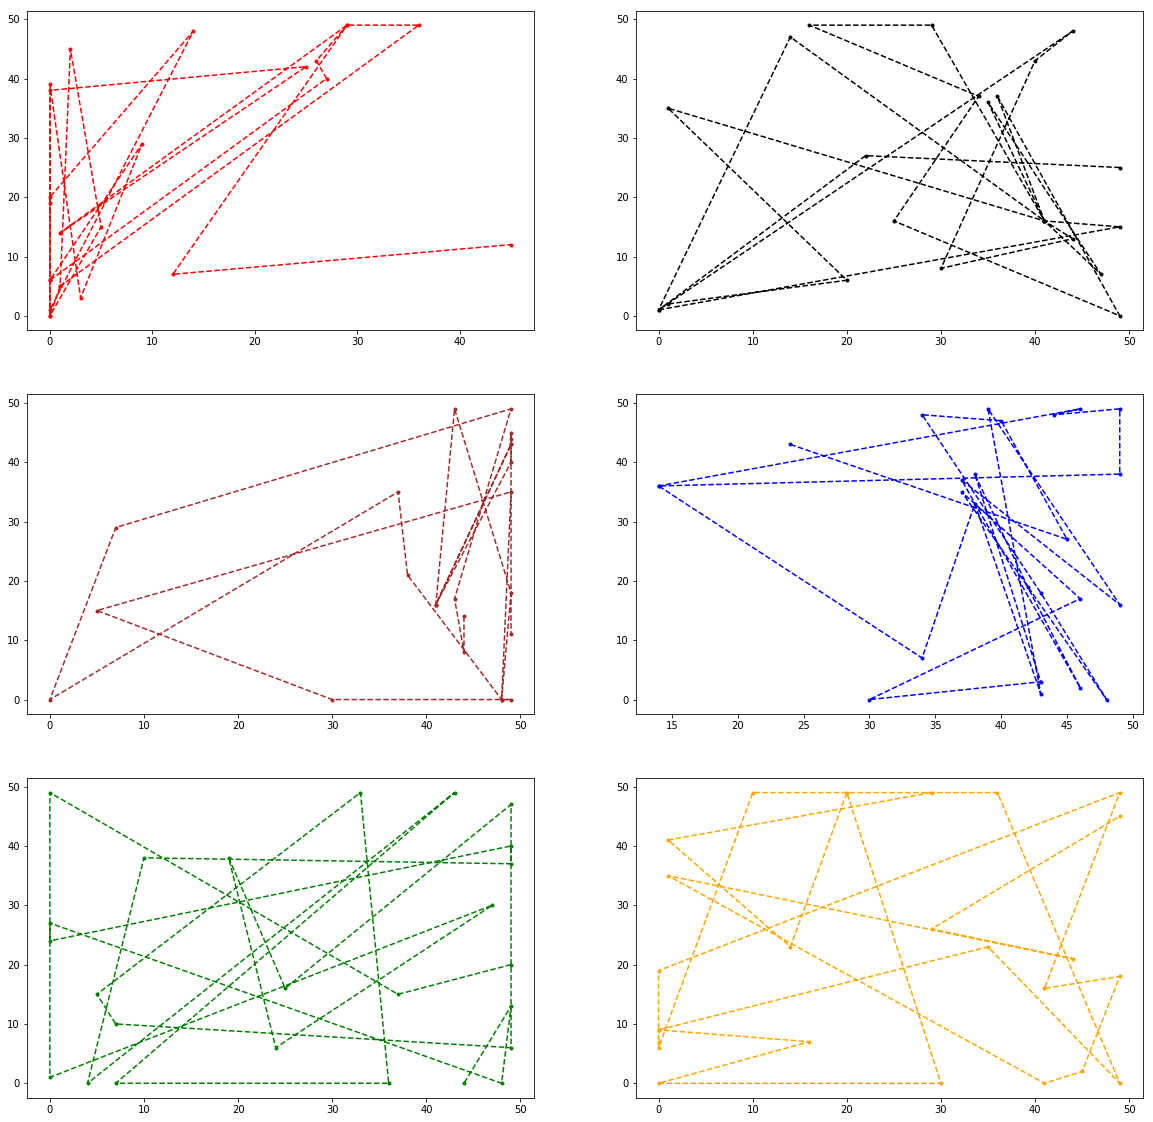

In [92]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

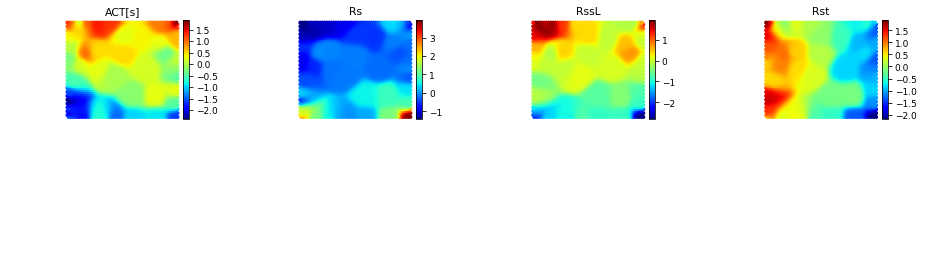

In [93]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[18  7]
 [17  8]]


true_positives total: 26
false_positives total: 24
false_negatives total: 24

Precision:  0.5238095238095237
Recal:  0.52
F1-Score:  0.5
Accuracy:  0.52
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[3 2]
 [2 3]]


true_positives total: 6
false_positives total: 4
false_negatives total: 4

Precision:  0.6
Recal:  0.6
F1-Score:  0.6
Accuracy:  0.6
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[17  8]
 [18  7]]


true_positives total: 24
false_positives total: 26
false_negatives total: 26

Precision:  0.47619047619047616
Recal:  0.48
F1-Score:  0.45833333333333326
Accuracy:  0.48
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [3 2]]


true_positives total: 4
false_positives total: 6
false_negatives total: 6

Preci

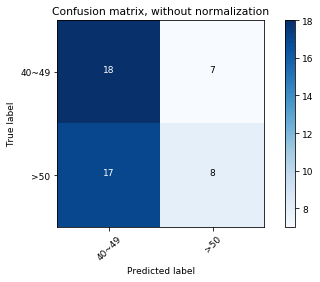

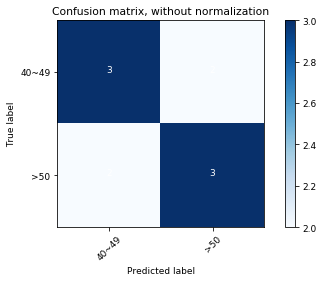

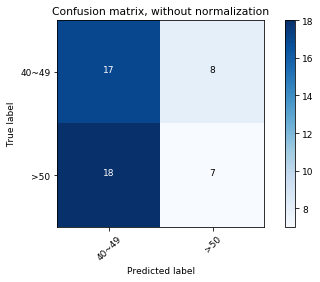

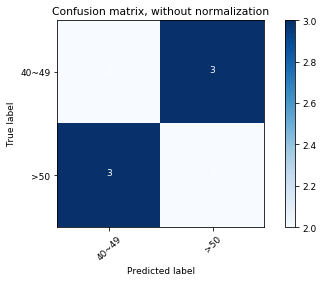

In [94]:
evaluate_group_5_and_6(som, complet_train_data, test_dataframe)

<hr>

# Experiment 14

- Map Size = [50, 50]
- Iterations = 2000
- Only 2 features as input: ['ACT[s]', 'Rs', 'RssL', 'Rst']
   - Group 1: 0~10
   - Group 2: 20~29

In [95]:
mapsize = [50,50]

combinations_to_be_analysed = ['ACT[s]', 'Rs', 'RssL', 'Rst']
drop = set(all_features) - set(combinations_to_be_analysed)
drop = list(drop)

data = complet_data.drop(drop, axis=1)
data = data.drop(['Age'], axis=1)
data = data.values

test_dataframe = complet_data.drop(drop, axis=1)
test_dataframe = test_dataframe.drop(test_dataframe.index[150:175])
test_dataframe = test_dataframe.drop(test_dataframe.index[120:145])
test_dataframe = test_dataframe.drop(test_dataframe.index[90:115])
test_dataframe = test_dataframe.drop(test_dataframe.index[60:85])
test_dataframe = test_dataframe.drop(test_dataframe.index[30:55])
test_dataframe = test_dataframe.drop(test_dataframe.index[:25])

group_0_10 = data[:25]
group_10_19 = data[30:55]
group_20_29 = data[60:85]
group_30_39 = data[90:115]
group_40_49 = data[120:145]
group_over_50 = data[150:175]


group_0_10_test = data[25:30]
group_10_19_test = data[55:60]
group_20_29_test = data[85:90]
group_30_39_test = data[115:120]
group_40_49_test = data[145:150]
group_over_50_test = data[175:]

group_1_and_3 = np.concatenate((group_0_10, group_20_29))
group_1_and_3_test = np.concatenate((group_0_10_test, group_20_29_test))

/home/sarai/.virtualenvs/hybrid-approach/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


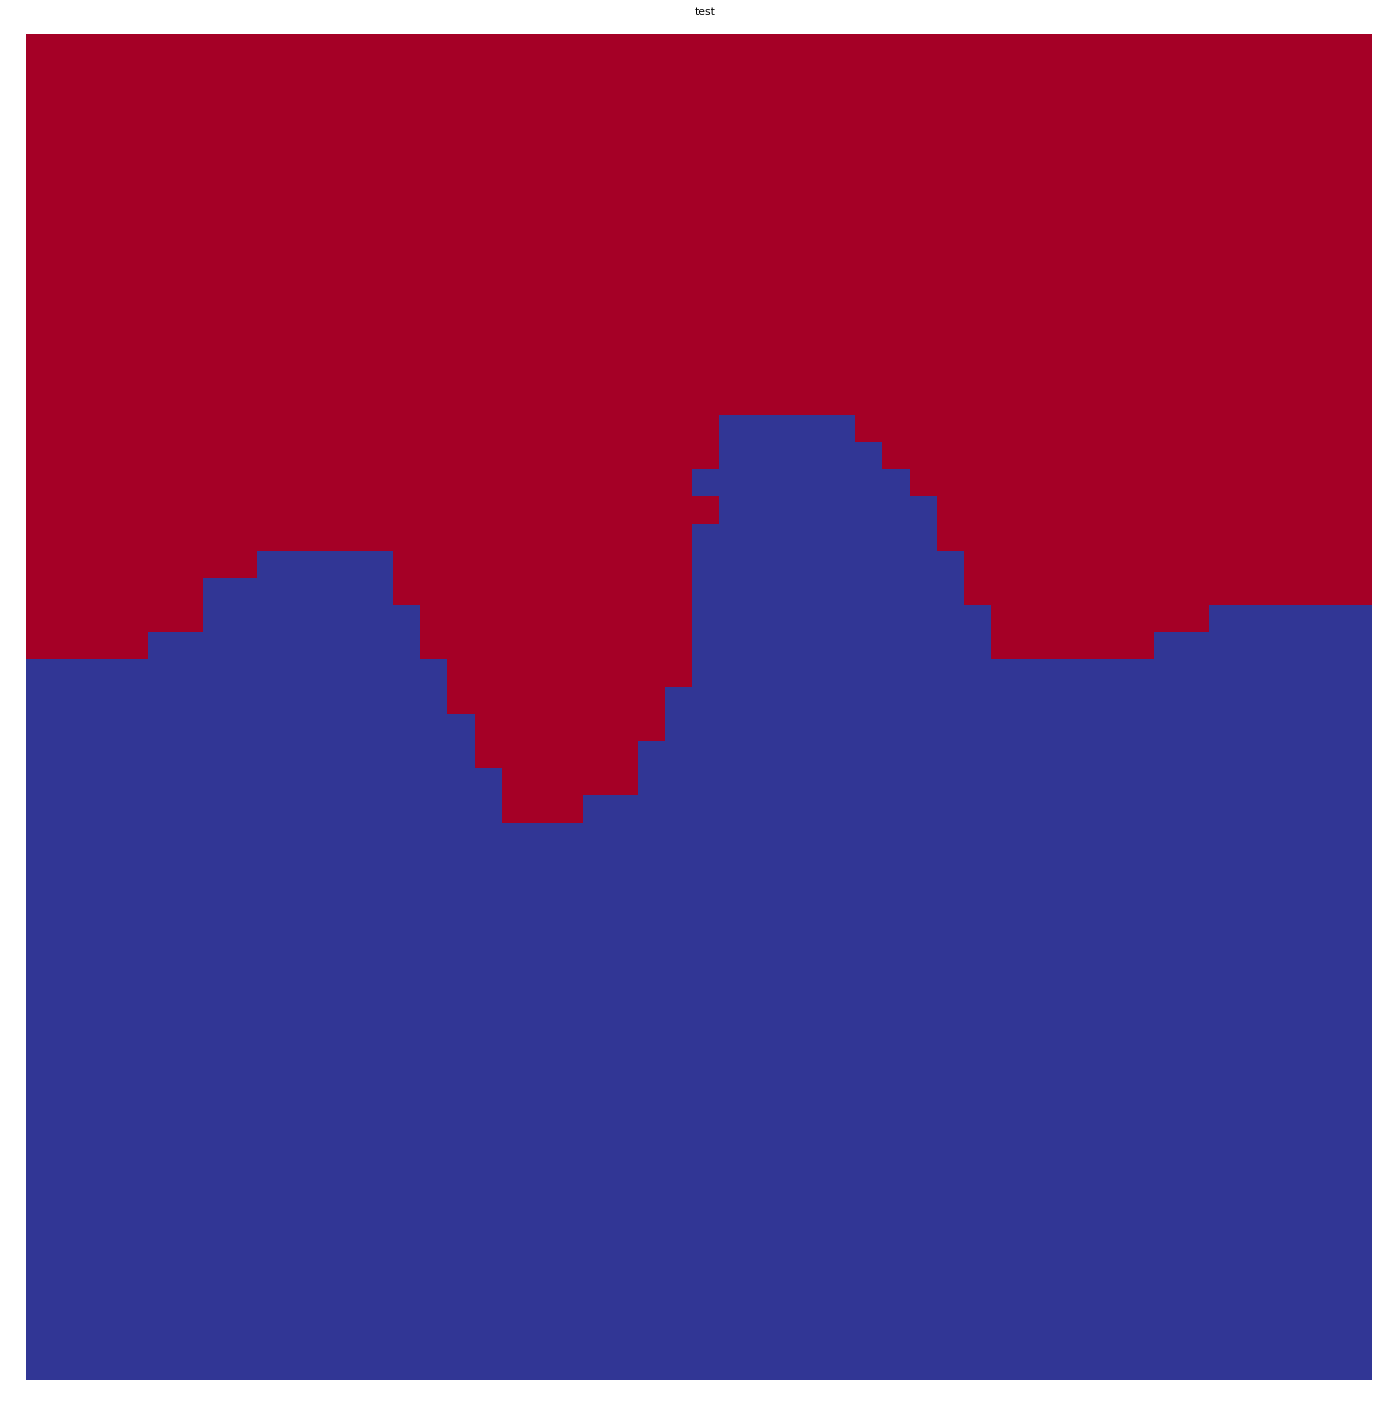

In [96]:
som = sompy.SOMFactory.build(
    group_1_and_3, mapsize, mask=None, mapshape='planar', lattice='hexa', 
    normalization='var', initialization='pca', neighborhood='gaussian', 
    training='batch', name='sompy'
)
som.train(n_job=4, verbose=False, train_finetune_len=100, train_rough_len=2000)

vis = sompy.mapview.View2DPacked(5, 5, 'test',text_size=12)  

kmeans_labels = cluster(som, n_clusters=2)

som.cluster_labels = kmeans_labels.labels_
vis.show(som, what='cluster')

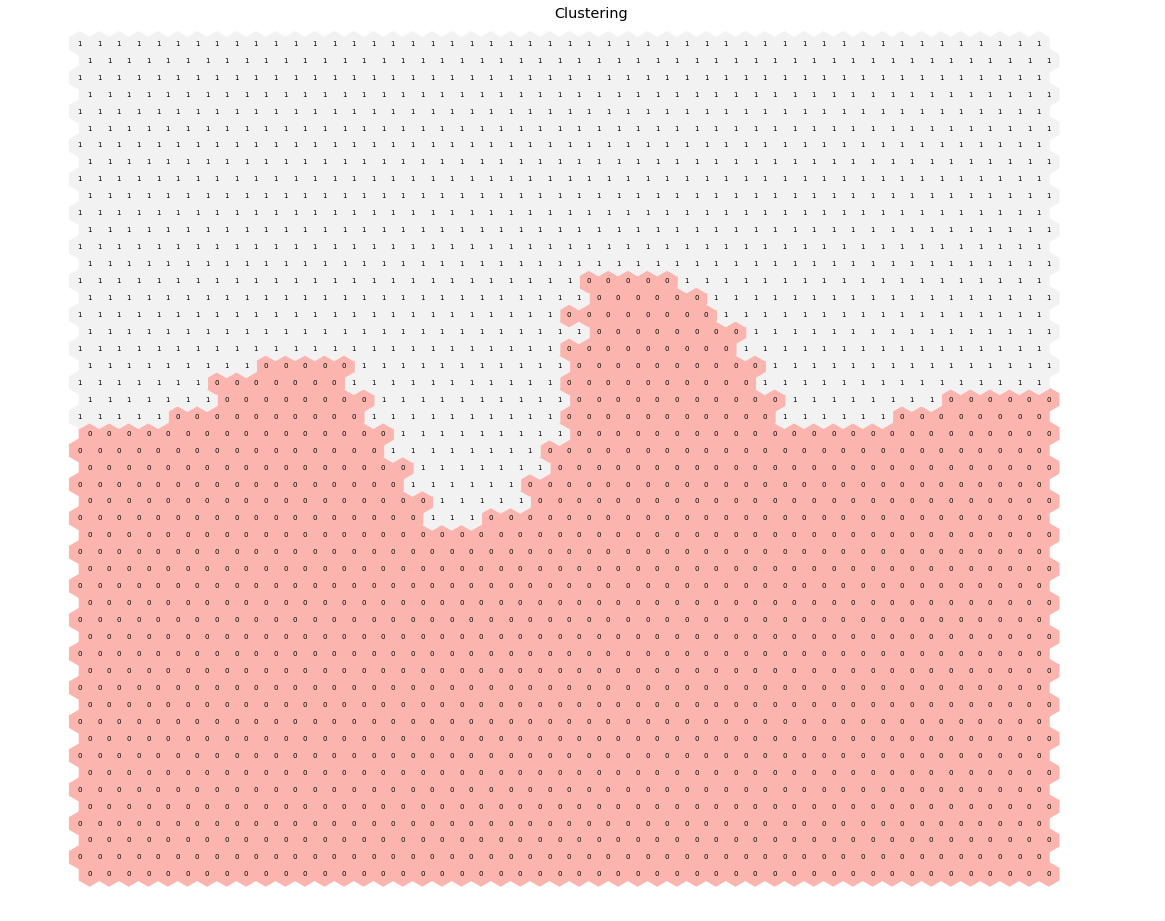

In [97]:
from sompy.visualization.hitmap import HitMapView
hits = HitMapView(20, 20,"Clustering",text_size=10, cmap=plt.cm.jet)
a = hits.show(som, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")
plt.show()

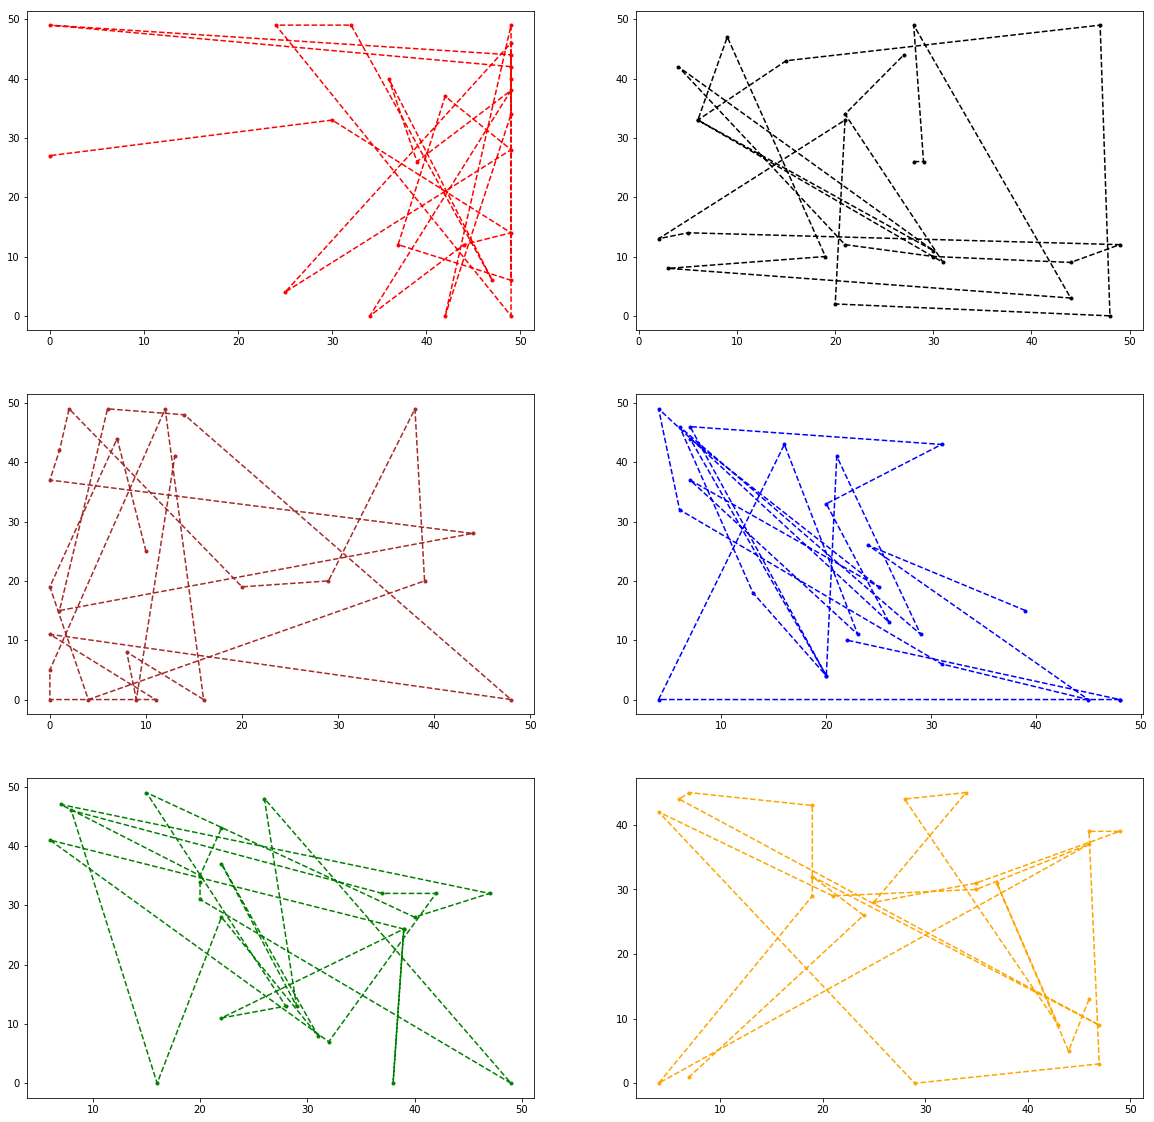

In [98]:
plot_data(som)

### Patterns learned by the neural network which are used to determine de winning neuron of each training instance

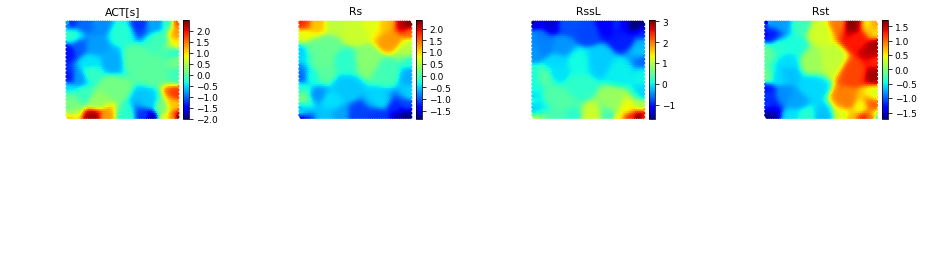

In [99]:
som.component_names = combinations_to_be_analysed
v = sompy.mapview.View2D(10,10,"", text_size=9)  
v.show(som, which_dim='all', cmap='jet', col_sz=4) #which_dim='all' default

Confusion matrix, without normalization
[[12 13]
 [16  9]]


true_positives total: 21
false_positives total: 29
false_negatives total: 29

Precision:  0.41883116883116883
Recal:  0.42
F1-Score:  0.41790445604175025
Accuracy:  0.42
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [2 3]]


true_positives total: 5
false_positives total: 5
false_negatives total: 5

Precision:  0.5
Recal:  0.5
F1-Score:  0.494949494949495
Accuracy:  0.5
-------------------------------------------------------------------------------------------------
Confusion matrix, without normalization
[[16  9]
 [12 13]]


true_positives total: 29
false_positives total: 21
false_negatives total: 21

Precision:  0.5811688311688312
Recal:  0.58
F1-Score:  0.5784825371336814
Accuracy:  0.58
-------------------TEST DATASET EVALUATION----------------------
Confusion matrix, without normalization
[[2 3]
 [2 3]]


true_positives total: 5
false_positives total: 5
fa

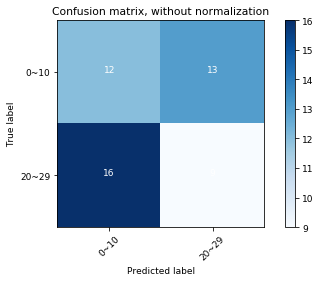

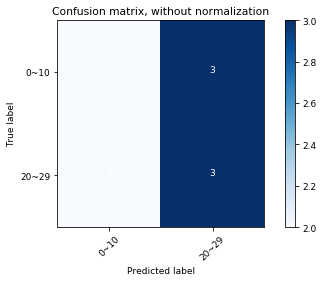

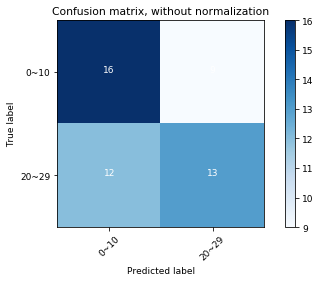

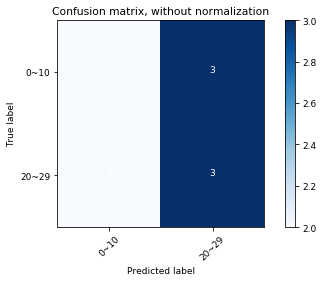

In [100]:
evaluate_group_1_and_3(som, complet_train_data, test_dataframe)

<hr>